In [15]:
import numpy as np
from xrdc import xrdutils as xdu
from xrdc import simulation as sim

from xrdc import simulation
from xrdc import datasets as xd
import matplotlib.pyplot as plt

from siamese_xrd import train, datasets, utils

def sample_peak_intensity():
    return np.random.uniform()

# https://stackoverflow.com/questions/35282456/find-local-maximums-in-numpy-array
import numpy as np
from scipy.signal import argrelextrema


def get_ridges(orig):
    # determine the indices of the local maxima
    max_ind = argrelextrema(orig, np.greater, axis = 1)
#     max_ind_2 = argrelextrema(orig, np.greater, axis = 0)
#     max_ind = np.hstack((max_ind[0], max_ind_2[0])), np.hstack((max_ind[1], max_ind_2[1]))
    
    edges = np.zeros_like(orig)
    edges[max_ind] = 1
    return edges

def shuffle(bin_img, size = 1):
    ret = np.zeros_like(bin_img)
    for s in range(-size, size + 1):
        ret += np.roll(bin_img, s, axis = 0)
        ret += np.roll(bin_img, s, axis = 1)
    return np.sign(ret)

In [2]:
from pymatgen.core.lattice import Lattice
from pymatgen.core.structure import Structure
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [3]:
from scipy.ndimage.filters import gaussian_filter as gf

In [4]:
# FCC Ni definition
lparam_Ni = 3.52
s = Structure.from_spacegroup("Fm-3m", Lattice.cubic(lparam_Ni), ["Ni"],
                                 [[0, 0, 0]])
s

Structure Summary
Lattice
    abc : 3.52 3.52 3.52
 angles : 90.0 90.0 90.0
 volume : 43.614208
      A : 3.52 0.0 0.0
      B : 0.0 3.52 0.0
      C : 0.0 0.0 3.52
PeriodicSite: Ni (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ni (0.0000, 1.7600, 1.7600) [0.0000, 0.5000, 0.5000]
PeriodicSite: Ni (1.7600, 0.0000, 1.7600) [0.5000, 0.0000, 0.5000]
PeriodicSite: Ni (1.7600, 1.7600, 0.0000) [0.5000, 0.5000, 0.0000]

In [5]:
gen = XRDCalculator("CuKa")
# gen = XRDCalculator(1.54)
pat = gen.get_pattern(s)
xdu.to_q(pat.x), pat.y

(array([3.09170346, 3.56999165, 5.04873061]),
 array([100.        ,  46.36686035,  26.67333336]))

Define the same structure directly from lattice vectors and unit cell

In [6]:
lat = Lattice(lparam_Ni * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]))
fcc_basis = np.array(((0, 0, 0), (.5, .5, 0), (.5, 0, .5), (0, .5, .5)))
struct = Structure(lat, ["Ni"] * len(fcc_basis), fcc_basis)

pat = gen.get_pattern(struct)
q, i = xdu.to_q(pat.x), pat.y

In [6]:
# def xrd_from_geo(lattice, basis, species):
#     lat = Lattice(lattice)
#     struct = Structure(lat, species, basis)
    
#     pat = gen.get_pattern(struct)
#     return xdu.to_q(pat.x), pat.y

In [7]:
# def distort_Ni(relative_c, common_scale = 1.):
#     return xrd_from_geo((lparam_Ni * common_scale) * np.array([[1, 0, 0], [0, 1, 0], [0, 0, relative_c]]), fcc_basis, ["Ni"] * 4)

In [8]:
# def Ni_cubic_to_tetra(N, c_start, c_end, sigma = .01):
#     """
#     """
#     cs =  np.linspace(c_start, c_end, N)
#     res = []
#     ordinal = []
#     for c in cs:
#         q, i = distort_Ni(c)
#         qq, ii = xdu.mk_pattern(i, q, sigma, with_grid=True)
#         ordinal.append(np.vstack([q, i]))
#         res.append(ii)
#     return ordinal, np.vstack(res)

# def Ni_cubic_scale(N, s_start, s_end, sigma = .01):
#     """
#     """
#     ss =  np.linspace(s_start, s_end, N)
#     res = []
#     ordinal = []
#     for c in ss:
#         q, i = distort_Ni(1, c)
#         qq, ii = xdu.mk_pattern(i, q, sigma, with_grid=True)
#         ordinal.append(np.vstack([q, i]))
#         res.append(ii)
#     return ordinal, np.vstack(res)

# #TODO refactor

# def Ni_tetra_random(N, cmin, cmax, scalemin, scalemax, sigma = .01):
#     """
#     """
#     cs = cmin + np.random.uniform(size = N) * (cmax - cmin)
#     scales = scalemin + np.random.uniform(size = N) * (scalemax - scalemin)
#     res = []
#     ordinal = []
#     for c, s in zip(cs, scales):
#         q, i = distort_Ni(c, common_scale=s)
#         qq, ii = xdu.mk_pattern(i, q, sigma, with_grid=True)
#         ordinal.append(np.vstack([q, i]))
#         res.append(ii)
#     return ordinal, np.vstack(res)

# def Ni_cubic_random(N, scalemin, scalemax, sigma = .01):
#     """
#     """
#     scales = scalemin + np.random.uniform(size = N) * (scalemax - scalemin)
#     res = []
#     ordinal = []
#     for c in scales:
#         q, i = distort_Ni(1, c)
#         qq, ii = xdu.mk_pattern(i, q, sigma, with_grid=True)
#         ordinal.append(np.vstack([q, i]))
#         res.append(ii)
#     return ordinal, np.vstack(res)

In [8]:
N = 4000

In [11]:
# _, Ni_tetra_rsample = Ni_tetra_random(N, .66, 1.5, .66, 1.5)

# Ni_tetra_rsample_y = np.zeros(N)

_, Ni_tetra_rsample = Ni_tetra_random(N, .9, 1.2, .99, 1.01)

Ni_tetra_rsample_y = np.zeros(N)

In [12]:
# _, Ni_cubic_rsample = Ni_cubic_random(N, .66, 1.5)

# Ni_cubic_rsample_y = np.ones(N)

_, Ni_cubic_rsample = Ni_cubic_random(N, .99, 1.01)

Ni_cubic_rsample_y = np.ones(N)

In [13]:
from sklearn.model_selection import train_test_split

In [866]:
reload(xdu)

<module 'xrdc.xrdutils' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/xrdutils.py'>

In [14]:
#X = np.log(1 + np.vstack((Ni_tetra_rsample, Ni_cubic_rsample)))
X = np.vstack((Ni_tetra_rsample, Ni_cubic_rsample))

Y = np.hstack((Ni_tetra_rsample_y, Ni_cubic_rsample_y))

#XX, YY = xdu.standardize_input(np.log(1 + X), Y)

In [15]:
XX, YY, _ = xdu.mk_simdata(X, 1, .8, 1.2, xdu.q_grid, y = Y, scale_type = 'scale',\
        q_dim = 150, peak_height = True, q_jitter_magnitude = None)

scale type: scale
q jitter: None
peak height variation True


In [468]:
(Y[:, None] == YY).all()

True

In [16]:
XXtrain, XXtest, YYtrain, YYtest = train_test_split(XX, YY, train_size = .8)

In [17]:
prefix = 'cubic_tetra_simulated_.9_1.2_3_peakheight_15'
xdu.write_train_test("data/{}/".format(prefix), XXtrain, YYtrain, XXtest, YYtest)

In [20]:
net, train_loader, test_loader, original_train_loader, original_test_loader, add_prefix, stats_collector =\
    train.run("siamese-constrastive_1d", "XRD", "data/{}/train/".format(prefix), "data/{}/test".format(prefix), name = prefix,
              n_classes = 2, epochs = 400)

  0%|          | 0/80000 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 80000/80000 [16:19<00:00, 81.66it/s, epoch=399, train_loss=0.00384, val_loss=0.00464] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-cubic_tetra_simulated_.9_1.2_3_peakheight_15-*


In [19]:
rm -r ./tmp/siamese-constrastive_1d-XRD-cubic_tetra_simulated_.9_1.2_3_peakheight_15-gif

In [21]:
from xrdc import visualization as vis

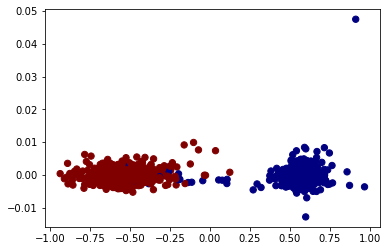

In [22]:
X, ytrue = utils.get_embedding(net, original_test_loader)

pca, Xpca = vis.do_pca(X)
plt.scatter(*(Xpca.T), c = ytrue, s = 40, cmap = 'jet')

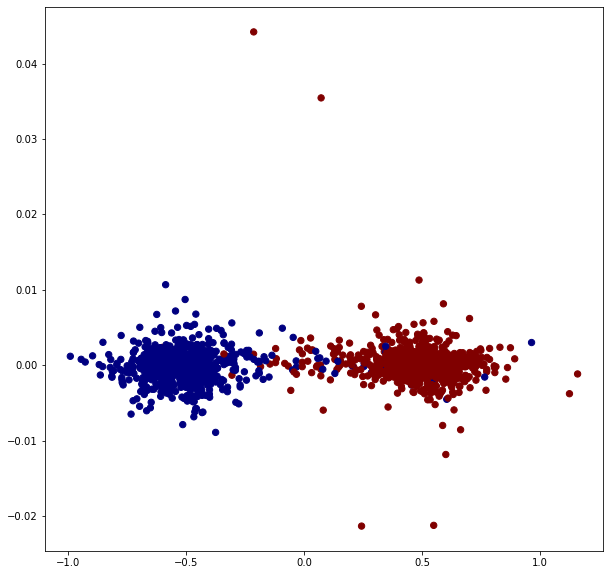

In [483]:
X, ytrue = utils.get_embedding(net, original_test_loader)

pca, Xpca = vis.do_pca(X)
plt.scatter(*(Xpca.T), c = ytrue, s = 40, cmap = 'jet')

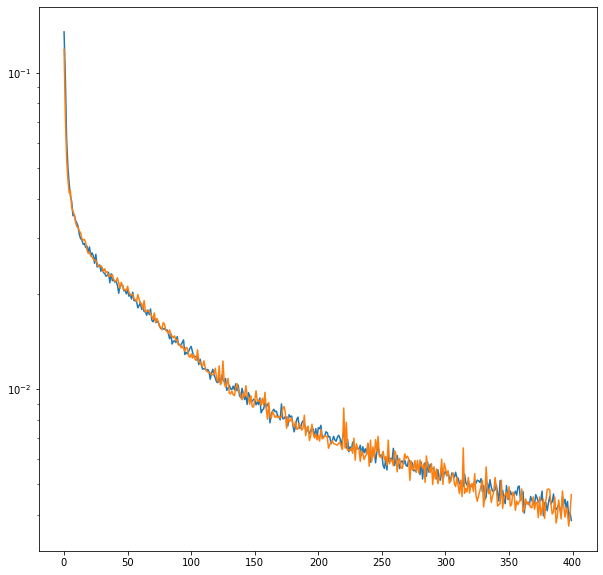

In [86]:
import matplotlib.pyplot as plt
plt.semilogy()
plt.plot(stats_collector['train_loss'])
plt.plot(stats_collector['val_loss'])

In [116]:
qqq = np.repeat(xdu.q_grid, N).reshape(len(xdu.q_grid), N).T

In [120]:
tmp = Ni_cubic_rsample[np.argsort((qqq * Ni_cubic_rsample).sum(axis = 1))]

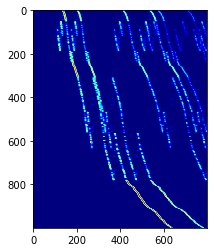

In [123]:
plt.imshow(np.log(1 + tmp), cmap = 'jet')

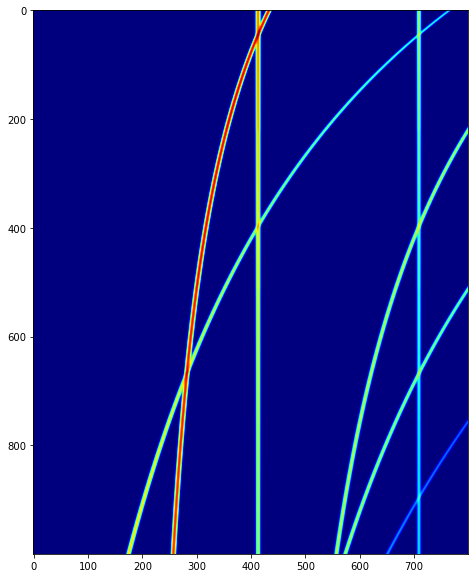

In [9]:
plt.rcParams["figure.figsize"]=(10, 10)

Ni_scan_peaks, Ni_scan = sim.Ni_cubic_to_tetra(1000, .67, 1.5)

plt.imshow(np.log(Ni_scan + 1), cmap = 'jet')

In [170]:
Ni_cub_peaks, Ni_cub_scan = Ni_cubic_scale(1000, .67, 1.5)

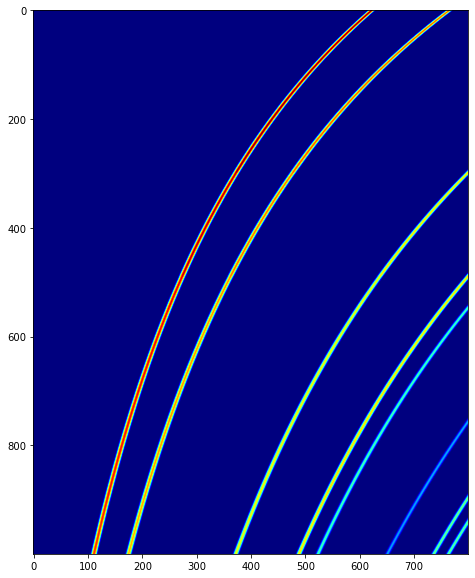

In [173]:
plt.imshow(np.log(Ni_cub_scan + 1), cmap = 'jet')

In [336]:
import numpy as np, cv2
orig = Ni_scan[300:600]
vis = (np.log((1 + orig)) * 40).astype('uint8')
img = gray = cv2.cvtColor(vis, cv2.COLOR_GRAY2BGR)

edges = cv2.Canny(gray,50,150,apertureSize = 3)

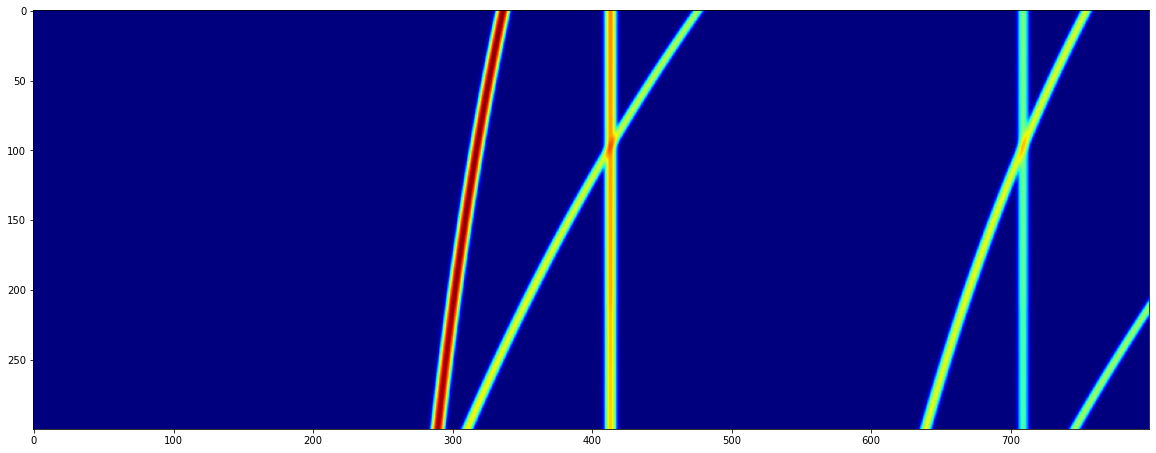

In [337]:
plt.imshow(np.log(1 + orig), cmap = 'jet')
#plt.imshow(np.log(1 + edges))

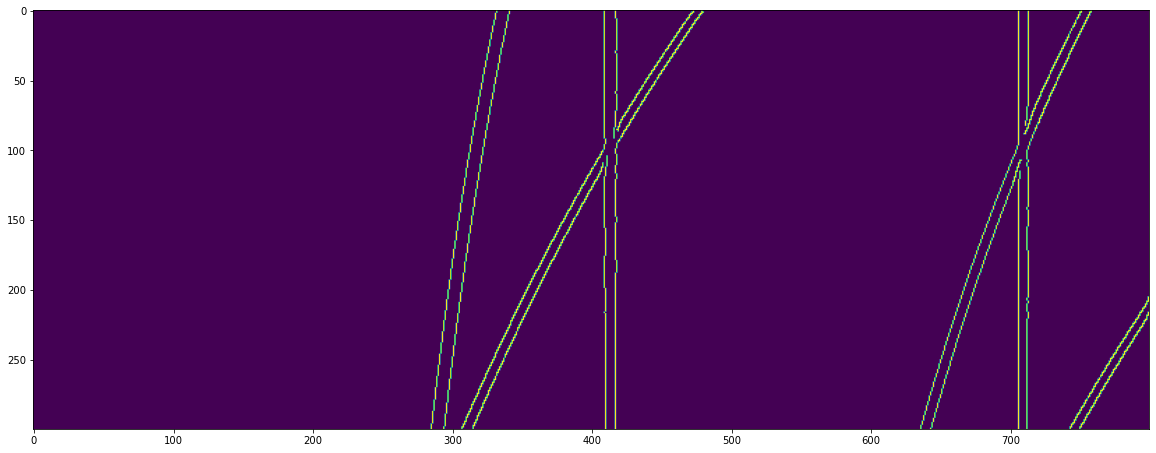

In [338]:
plt.imshow(edges)

In [339]:
lines = cv2.HoughLines(edges,1,np.pi/45,70)
for row in lines:
    for rho,theta in row:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

In [266]:
from xrdc import grid_data

lines_normed = (lines.squeeze() / lines.squeeze().mean(axis = 0))

lgroups = grid_data.group_by_coord(lines_normed, n_cluster=6)

lines_merged = []
for i in np.unique(lgroups):
    lines_merged.append(lines.squeeze()[lgroups == i].mean(axis = 0))
lines_merged = np.vstack(lines_merged)
assert lgroups.max() == 5

In [343]:
import numpy as np

def hough_line(img):
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height = img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height))     # max_dist
    print(diag_len)
    diag_len = int(diag_len)
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
    x_idxs, y_idxs = np.nonzero(img)    # (row, col) indexes to edges

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = int(np.round(x * cos_t[t_idx] + y * sin_t[t_idx])) + diag_len
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos

def hough_line_2(img):
    """
    vectorized implementation
    """
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height = img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height))     # max_dist
    diag_len = int(diag_len)
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
    x_idxs, y_idxs = np.nonzero(img)    # (row, col) indexes to edges


    for t_idx in range(num_thetas):
        # Calculate rho. diag_len is added for a positive index
        t = thetas[t_idx]
        rho = (np.round(x_idxs * cos_t[t_idx] + y_idxs * sin_t[t_idx])).astype(int) + diag_len
        np.add.at(accumulator, (rho, t_idx), 1)

    return accumulator, thetas, rhos

def hough_line_3d(img):
    """
    vectorized implementation
    """
    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    width, height, depth = img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height + depth * depth))     # max_dist
    diag_len = int(diag_len)
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
    x_idxs, y_idxs = np.nonzero(img)    # (row, col) indexes to edges


    for t_idx in range(num_thetas):
        # Calculate rho. diag_len is added for a positive index
        t = thetas[t_idx]
        rho = (np.round(x_idxs * cos_t[t_idx] + y_idxs * sin_t[t_idx])).astype(int) + diag_len
        np.add.at(accumulator, (rho, t_idx), 1)

    return accumulator, thetas, rhos

# def hough_cu(img, a_min = -.02, a_max = .02, b_min = -2., b_max = 2,
#                                       c_min = 0, c_max = 600, NN = 200):
#     # Rho and Theta ranges
#     aa = np.arange(a_min, a_max, (a_max - a_min) / NN)
#     num_a = len(aa)
#     bb = np.arange(b_min, b_max, (b_max - b_min) / NN)
#     num_b = len(bb)
    
#     width, height = img.shape
#     diag_len = np.ceil(np.sqrt(width * width + height * height))     # max_dist

#     cc = np.arange(c_min, c_max)
#     num_c = len(cc)

#     # Hough accumulator array of theta vs rho
#     accumulator = np.zeros((num_a, num_b, num_c), dtype=np.uint64)
#     x_idxs, y_idxs = np.nonzero(img)    # (row, col) indexes to edges

# #     # Vote in the hough accumulator
#     for a_idx in range(num_a):
#         a = aa[a_idx]
#         for b_idx in range(num_b):
#             b = bb[b_idx]
#             c_exact = y_idxs - a * x_idxs**2 - b * x_idxs
#             c_grid_idx = find_closest(cc, c_exact)
            
# #             c_grid_idx = np.round(c_exact - c_min).astype(int)
# #             mask = ((c_grid_idx <= c_max - 1) & (c_grid_idx >= c_min))
# #             c_grid_idx = c_grid_idx[mask] + c_min
            
#             np.add.at(accumulator, (a_idx, b_idx, c_grid_idx), 1)

#             #accumulator[a_idx, b_idx, c_grid_idx] += 1
            
#     I, K, L = accumulator.shape
#     accumulator[0, :, :] = 0
#     accumulator[:, 0, :] = 0
#     accumulator[:, :, 0] = 0
#     accumulator[I - 1, :, :] = 0
#     accumulator[:, K - 1, :] = 0
#     accumulator[:, :, L - 1] = 0
#     return accumulator, aa, bb, cc

In [344]:
def find_closest(A, target):
    #A must be sorted
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A)-1)
    left = A[idx-1]
    right = A[idx]
    idx -= target - left < right - target
    return idx

def hough_curve(img, a_min = -.02, a_max = .02, b_min = -2., b_max = 2,
                                      c_min = 0, c_max = 600, NN = 200):
    # Rho and Theta ranges
    aa = np.arange(a_min, a_max, (a_max - a_min) / NN)
    num_a = len(aa)
    bb = np.arange(b_min, b_max, (b_max - b_min) / NN)
    num_b = len(bb)
    
    width, height = img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height))     # max_dist

    cc = np.arange(c_min, c_max)
    num_c = len(cc)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((num_a, num_b, num_c), dtype=np.uint64)
    x_idxs, y_idxs = np.nonzero(img)    # (row, col) indexes to edges

#     # Vote in the hough accumulator
    for a_idx in range(num_a):
        a = aa[a_idx]
        for b_idx in range(num_b):
            b = bb[b_idx]
            c_exact = y_idxs - a * x_idxs**2 - b * x_idxs
            c_grid_idx = find_closest(cc, c_exact)
            
#             c_grid_idx = np.round(c_exact - c_min).astype(int)
#             mask = ((c_grid_idx <= c_max - 1) & (c_grid_idx >= c_min))
#             c_grid_idx = c_grid_idx[mask] + c_min
            
            np.add.at(accumulator, (a_idx, b_idx, c_grid_idx), 1)

            #accumulator[a_idx, b_idx, c_grid_idx] += 1
            
    I, K, L = accumulator.shape
    accumulator[0, :, :] = 0
    accumulator[:, 0, :] = 0
    accumulator[:, :, 0] = 0
    accumulator[I - 1, :, :] = 0
    accumulator[:, K - 1, :] = 0
    accumulator[:, :, L - 1] = 0
    return accumulator, aa, bb, cc


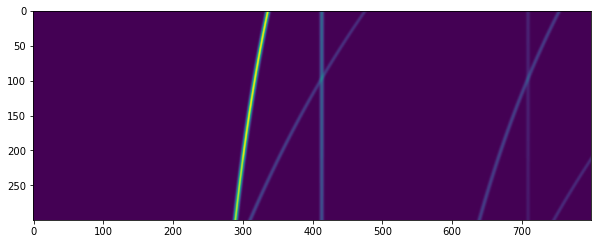

In [194]:
plt.imshow(orig)

In [340]:
one_line = cv2.line(np.zeros_like(img), (x1,y1),(x2,y2),(0,0,255),2).sum(axis = 2)

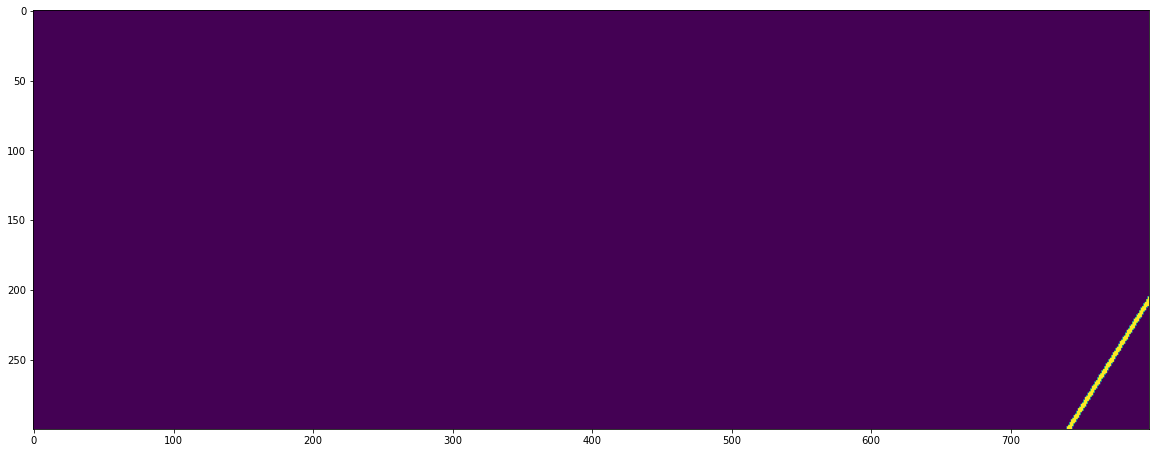

In [341]:
plt.imshow(one_line)

In [345]:
#accumulator, thetas, rhos = hough_line(one_line)
accumulator_l, thetas_l, rhos_l = hough_line(one_line)

accumulator_l2, thetas_l, rhos_l = hough_line_2(one_line)

(accumulator_l == accumulator_l2).all()

855.0


True

In [348]:
%timeit -r 1 -n 1 hough_line_2(one_line)

8.8 ms ± 820 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


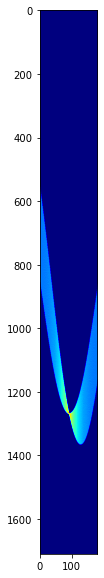

In [403]:
plt.imshow(np.log(1 + accumulator_l), cmap  = 'jet')

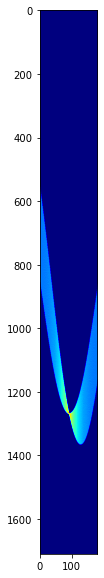

In [404]:
plt.imshow(np.log(1 + accumulator_l2), cmap  = 'jet')

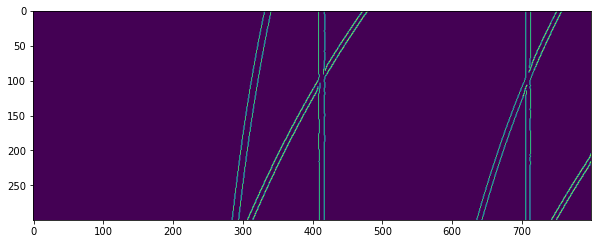

In [512]:
plt.imshow(edges)

855.0


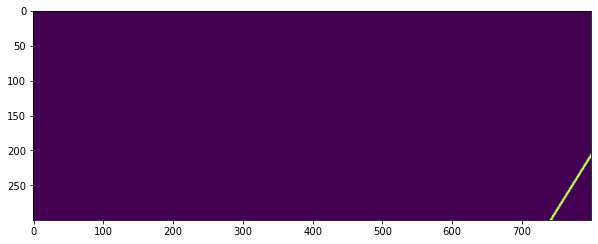

In [437]:
accumulator, aa, bb, cc = hough_curve(one_line)
plt.imshow(one_line)

In [949]:
def draw_parab(a, b, c, img):
    N, M = img.shape
    xx, yy = np.arange(N), np.arange(M)
    y_select = find_closest(yy, a * xx**2 + b * xx + c)
    img[xx, y_select] += 1
    return img

## 3D Hough transform:

(-0.0010000000000001154, -0.09999999999999831, 400)

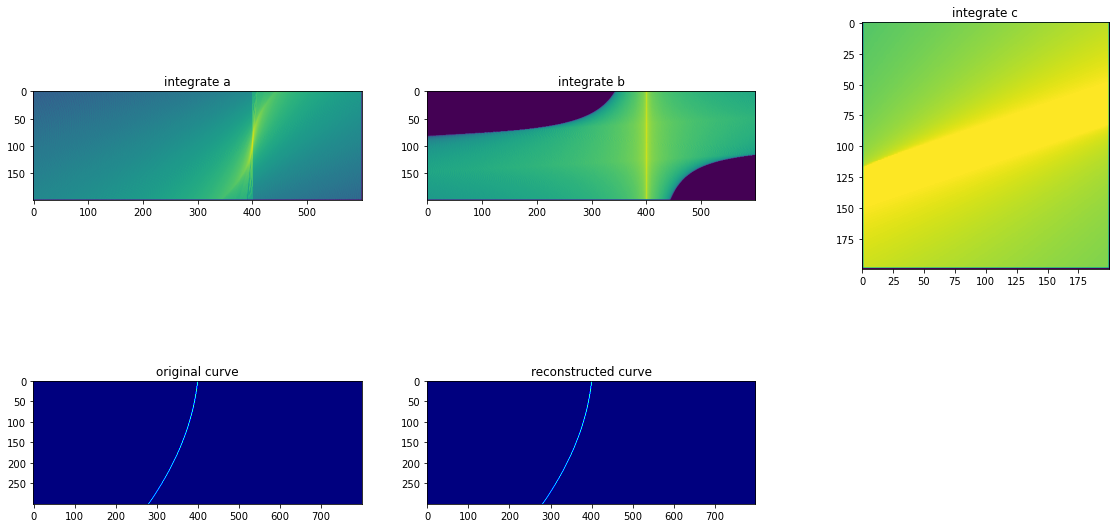

In [1386]:
plt.rcParams["figure.figsize"]=(20, 10)

parab = draw_parab(-.001, -.1, 400, np.zeros_like(orig))
accumulator, aa, bb, cc = hough_curve(parab, a_min = -.02, a_max = .02, b_min = -2., b_max = 2,
                                      c_min = 0, c_max = 600, NN = 200)
# plt.subplot(4, 1, 1)
# plt.imshow(np.log(1 + accumulator.sum(axis = 0)))
# plt.subplot(4, 1, 2)
# plt.imshow(np.log(1 + accumulator.sum(axis = 1)))
# plt.subplot(4, 1, 3)
# plt.imshow(np.log(1 + accumulator.sum(axis = 2)))
# plt.subplot(4, 1, 4)
# plt.imshow(parab)
# accumulator.max()
plt.subplot(2, 3, 1)
plt.title('integrate a')
plt.imshow(np.log(1 + accumulator.sum(axis = 0)))
plt.subplot(2, 3, 2)
plt.title('integrate b')
plt.imshow(np.log(1 + accumulator.sum(axis = 1)))
plt.subplot(2, 3, 3)
plt.title('integrate c')
plt.imshow(np.log(1 + accumulator.sum(axis = 2)))
plt.subplot(2, 3, 4)
plt.title('original curve')
plt.imshow(parab, cmap = 'jet')

# https://stackoverflow.com/questions/5798364/using-numpy-argmax-on-multidimensional-arrays
idx = np.argmax(accumulator)
vxx, vyy, vzz = np.indices(accumulator.shape)
i_a, i_b, i_c = vxx.ravel()[idx], vyy.ravel()[idx], vzz.ravel()[idx]
a, b, c = aa[i_a], bb[i_b], cc[i_c]
assert accumulator.max() == accumulator[i_a, i_b, i_c]
best_fit = draw_parab(a, b, c, np.zeros_like(orig))
plt.subplot(2, 3, 5)
plt.title('reconstructed curve')
plt.imshow(np.log(1 + best_fit), cmap = 'jet')

a, b, c

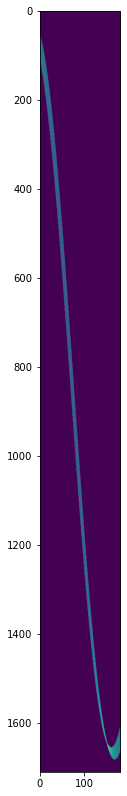

In [1102]:
accumulator_l2, thetas_l, rhos_l = hough_line_2(one_line)
plt.imshow(np.log(1 + accumulator_l2))

(0.0029999999999998604, -0.1999999999999984, 337)

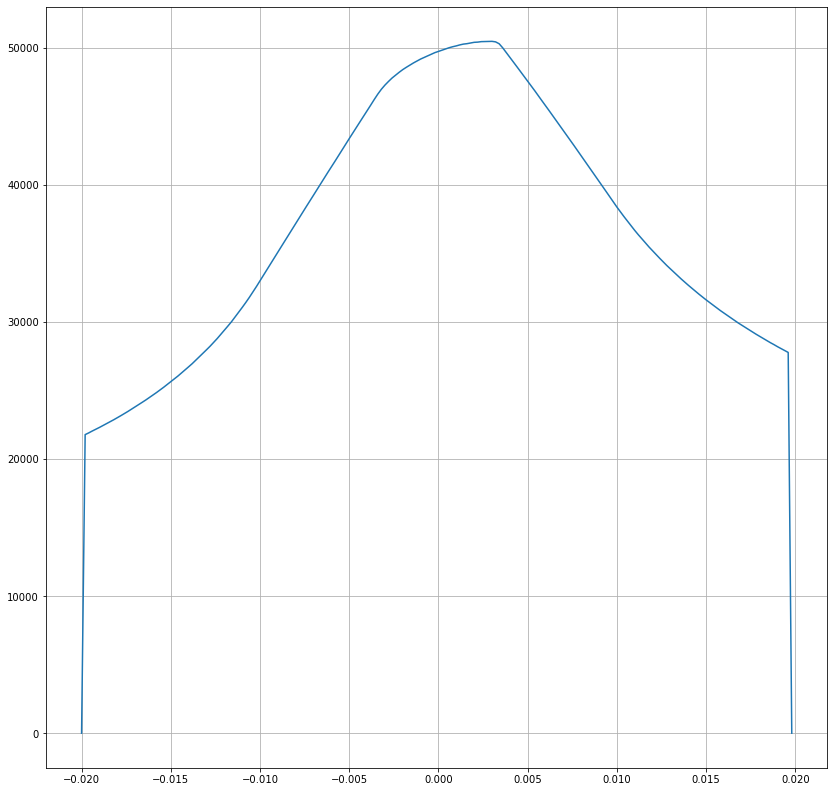

In [1103]:
plt.plot(aa, accumulator.sum(axis = (1, 2)))
plt.grid()
a_center_i = accumulator.sum(axis = (1, 2)).argmax()
from scipy.ndimage.measurements import center_of_mass as cm

b_center_i, c_center_i = np.round(cm(accumulator[a_center_i, :, :])).astype(int)

a, b, c = aa[a_center_i], bb[b_center_i], cc[c_center_i]
a, b, c

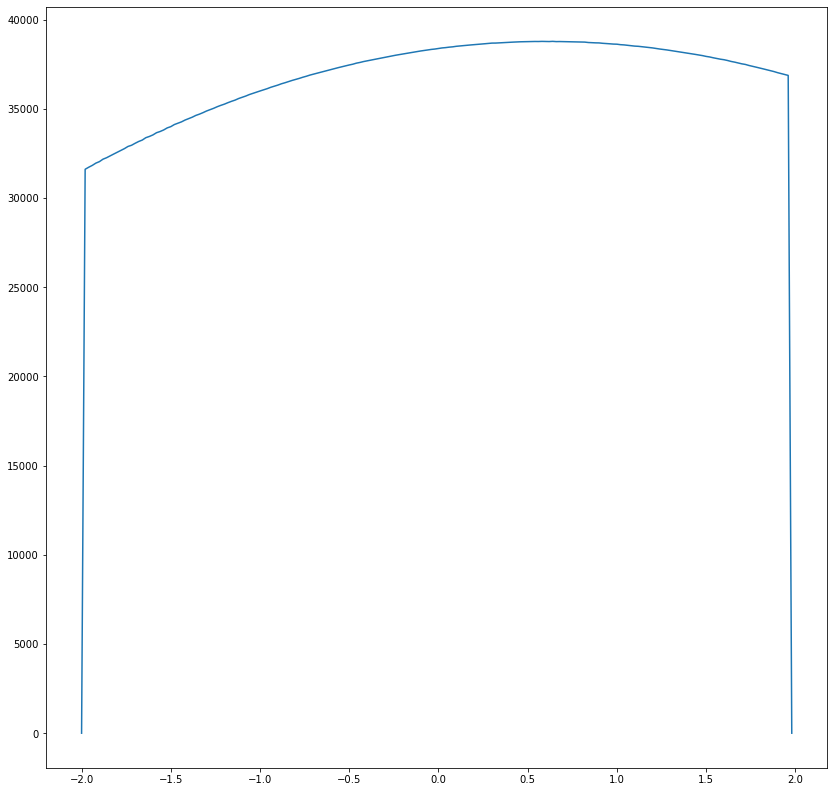

In [1104]:
plt.plot(bb, accumulator.sum(axis = (0, 2)))

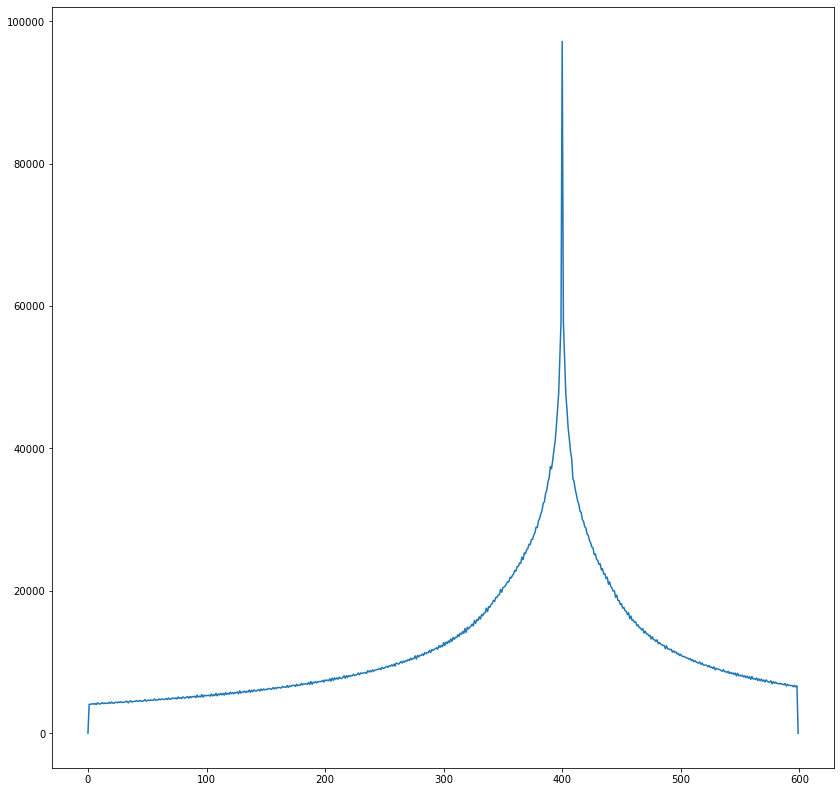

In [1105]:
plt.plot(cc, accumulator.sum(axis = (0, 1)))

In [1160]:
def find_max_indices(accumulator, aa, bb, cc, sum_axis = None):
    if sum_axis is None:
        idx = np.argmax(accumulator)
        dx = np.argmax(accumulator)
        vxx, vyy, vzz = np.indices(accumulator.shape)
        i_a, i_b, i_c = vxx.ravel()[idx], vyy.ravel()[idx], vzz.ravel()[idx]
        return (i_a, i_b, i_c), (aa[i_a], bb[i_b], cc[i_c])
    else:
        accumulator = accumulator.sum(axis = sum_axis)
        dim_dict = {0: [bb, cc], 1: [aa, cc], 2: [aa, bb]}
        dim1, dim2 = dim_dict[sum_axis]
        return fmi_2d(accumulator, dim1, dim2)
    
def fmi_2d(accumulator, val_1, val_2):
    idx = np.argmax(accumulator)
    vxx, vyy = np.indices(accumulator.shape)
    i_a, i_b = vxx.ravel()[idx], vyy.ravel()[idx]
    return (i_a, i_b), (val_1, val_2)

## 3D Hough transform of detected ridges:

(100, 100, 413, -1.214306433183765e-16, 1.7763568394002505e-15, 413)

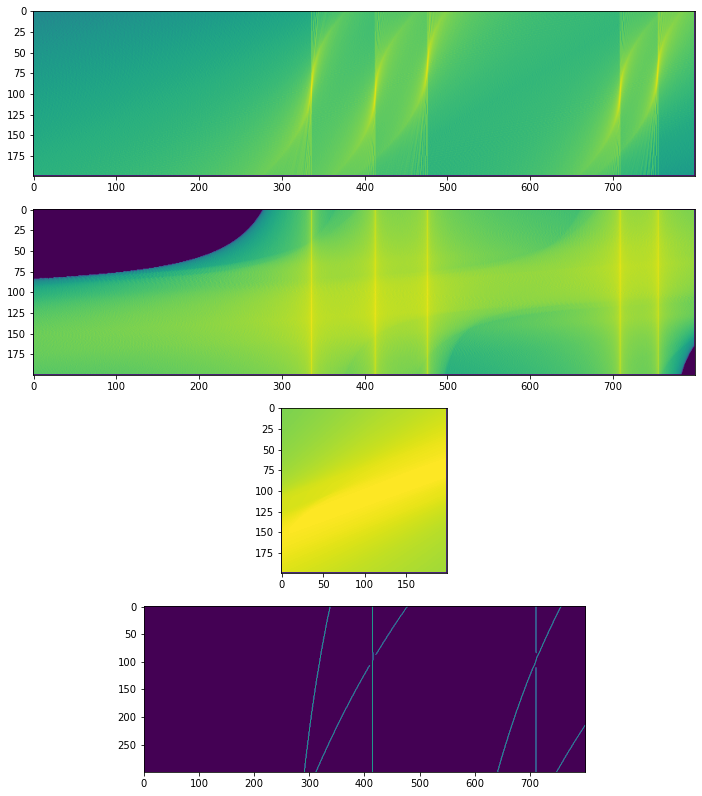

In [1128]:
a, b  = -2.7, 1100
ec = edges.copy()
# N, M = ec.shape
# xx, yy = np.arange(M), np.arange(N)
# vxx, vyy = np.meshgrid(xx, yy)
# mask = vyy < (a * vxx + b)
# ec = mask * ec

accumulator, aa, bb, cc = hough_curve(ec, c_max = 800, NN = 200)

plt.subplot(4, 1, 1)
plt.imshow(np.log(1 + accumulator.sum(axis = 0)))
plt.subplot(4, 1, 2)
plt.imshow(np.log(1 + accumulator.sum(axis = 1)))
plt.subplot(4, 1, 3)
plt.imshow(np.log(1 + accumulator.sum(axis = 2)))
plt.subplot(4, 1, 4)
plt.imshow(ec)

(i_a, i_b, i_c), (a, b, c) = find_max_indices(accumulator, aa, bb, cc)
i_a, i_b, i_c, a, b, c

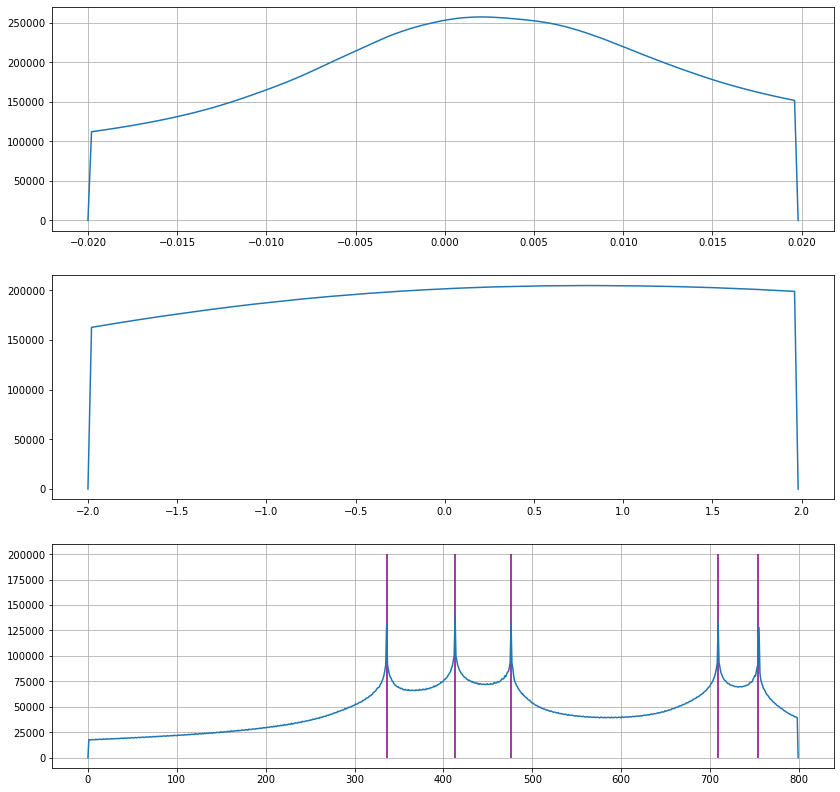

In [1145]:
plt.subplot(3, 1, 1)
plt.plot(aa, accumulator.sum(axis = (1, 2)))
plt.grid()
# a_center_i = accumulator.sum(axis = (1, 2)).argmax()
# from scipy.ndimage.measurements import center_of_mass as cm

# b_center_i, c_center_i = np.round(cm(accumulator[a_center_i, :, :])).astype(int)

# a, b, c = aa[a_center_i], bb[b_center_i], cc[c_center_i]
# a, b, c
plt.subplot(3, 1, 2)
plt.plot(bb, accumulator.sum(axis = (0, 2)))
plt.subplot(3, 1, 3)
curve_c = argrelextrema(gf(accumulator.sum(axis = (0, 1)), 2), np.greater)[0]
plt.vlines(x = curve_c, ymin = 0, ymax = (2e5), 
           colors = 'purple', 
           label = 'vline_multiple - full height') 
curve_c
plt.grid()
plt.plot(cc, accumulator.sum(axis = (0, 1)))

In [1216]:
acurves = accumulator[:, :, curve_c]

c_recon = np.zeros_like(orig)
c_recon = draw_parab(aa[ca], bb[cb], cc[ccc], c_recon)

curves_arrs = []

for i in range(len(curve_c)):
    (ca, cb), (caa, cbb) = fmi_2d(acurves[:, :, i], aa, bb)
    ccc = curve_c[i]
    c_recon = draw_parab(aa[ca], bb[cb], cc[ccc], np.zeros_like(c_recon))
    curves_arrs.append(c_recon)

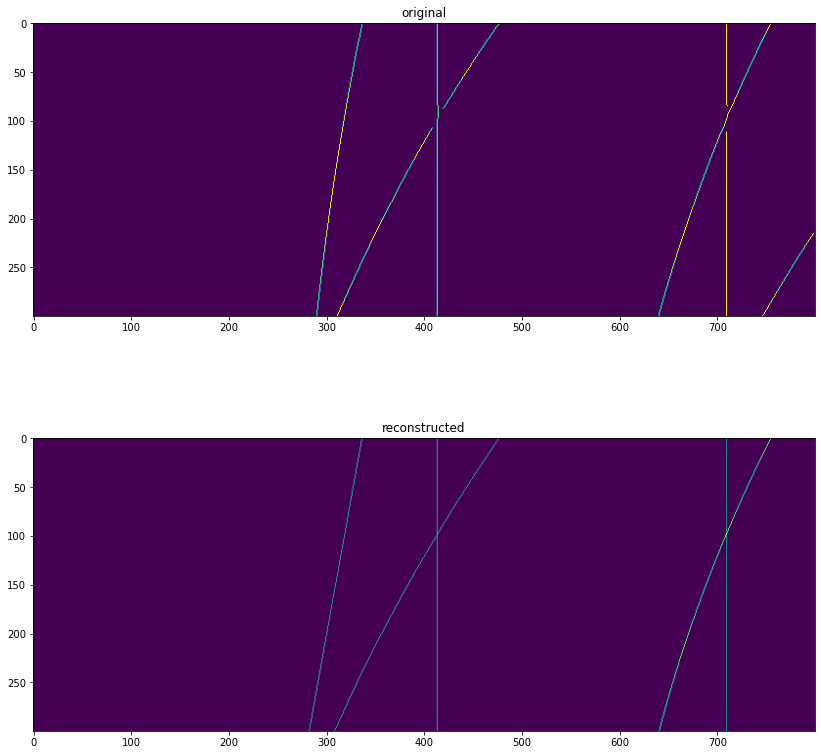

In [1192]:
plt.subplot(2, 1, 1)
plt.title("original")
plt.imshow(np.log(1 + edges))

plt.subplot(2, 1, 2)
plt.title("reconstructed")
plt.imshow(np.log(1 + c_recon))

In [1206]:
# curves_arrs = [acurves[:, :, i] for i in range(len(curve_c))]

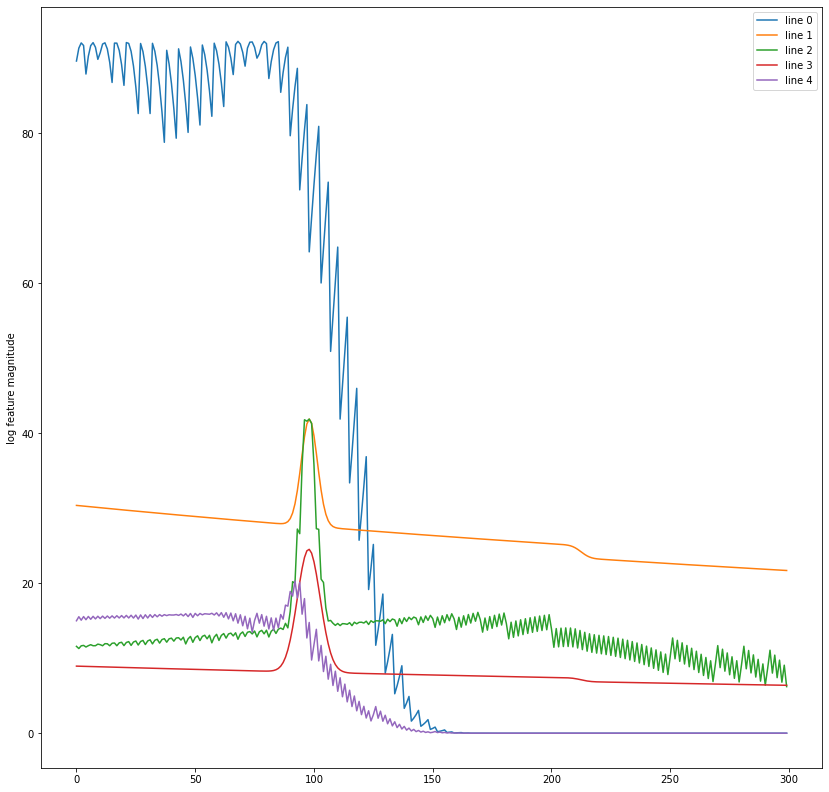

In [1219]:
def row_dp(row, i, refimage):
    return np.dot(refimage[i], row)

def feats_imatch(imatch):
    #print(curves_arrs[0].shape, orig.shape)
    return np.array([row_dp(orig[imatch], imatch, curves_arrs[i]) for i in range(len(curve_c))])

line_feats = np.array([feats_imatch(i) for i in range(len(orig))])
#[plt.plot(np.log(1 + row), label = 'line {}'.format(i)) for (i, row) in enumerate(line_feats.T)]
[plt.plot(row, label = 'line {}'.format(i)) for (i, row) in enumerate(line_feats.T)]

plt.ylabel('log feature magnitude')
plt.legend()

In [10]:
import pandas as pd

In [12]:
%matplotlib inline

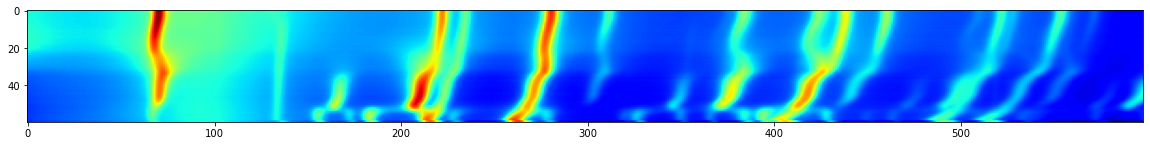

In [18]:
plt.imshow(np.log(1 + patterns), cmap = 'jet')

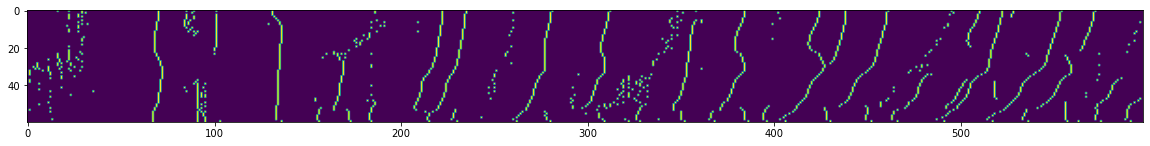

In [19]:
plt.imshow(get_ridges(patterns))

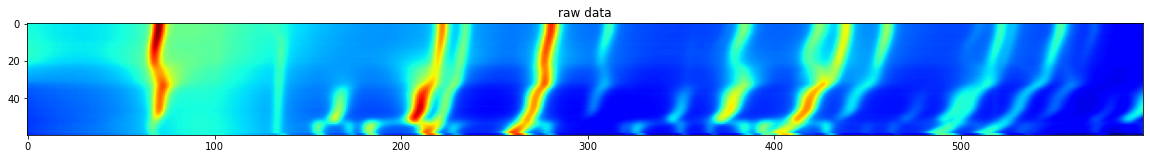

In [17]:
plt.rcParams["figure.figsize"]=(20, 8)
a, b = 3, 1

smooth = 2.

bg = gf(patterns,60)
p = patterns.copy()

threshold = np.percentile(patterns, 60)
p[p < threshold] = 0

#p = np.log(1 + p)
smoothed = gf(p, smooth)
bgsub = (patterns - bg)

plt.subplot(a, b, 1)
plt.title('raw data')
plt.imshow(np.log(1 + patterns), cmap = 'jet')

# plt.subplot(a, b, 2)
# plt.imshow(np.log((1000 - bgsub.min()) + bgsub), cmap = 'jet')
# plt.title('bgsubbed')

(69, 104, 279, -0.006200000000000084, 0.08000000000000185, 279)

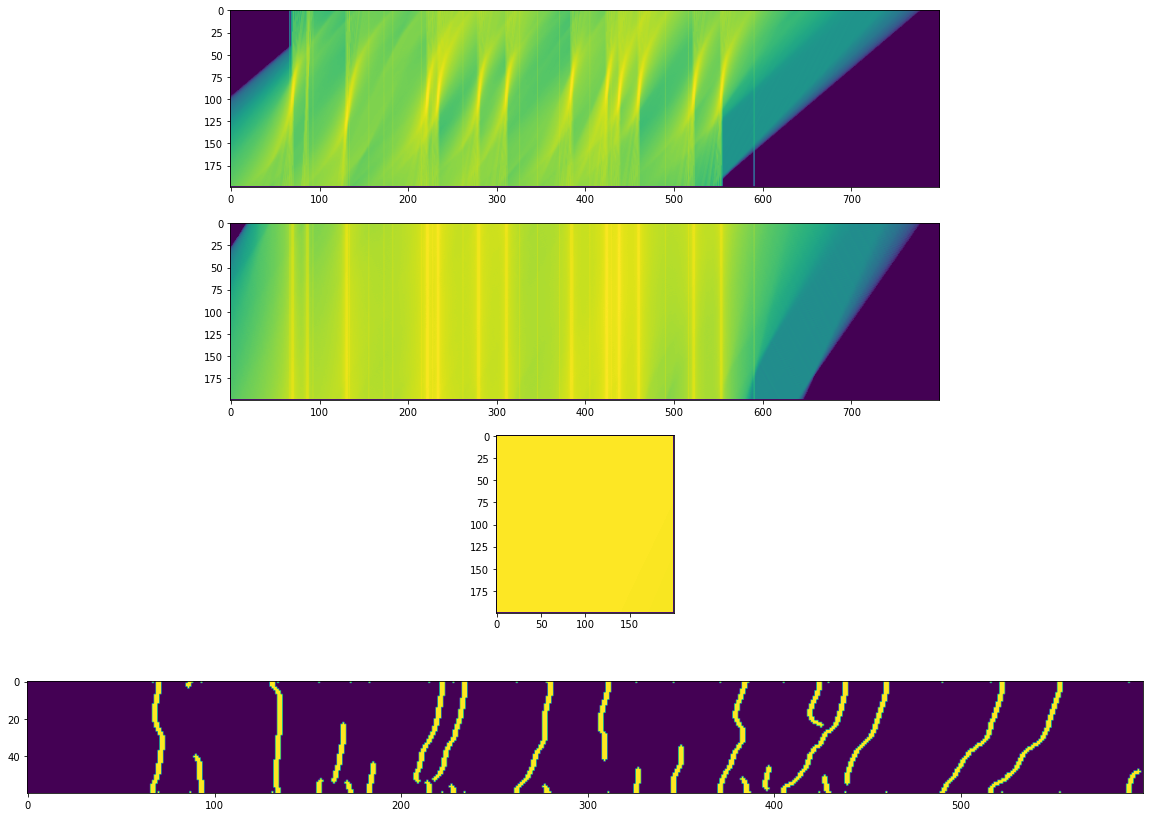

In [1817]:
plt.rcParams["figure.figsize"]=(20, 15)

ec = arr.copy()

accumulator, aa, bb, cc = hough_curve(ec, c_max = 800, NN = 200)

plt.subplot(4, 1, 1)
plt.imshow(np.log(1 + accumulator.sum(axis = 0)))
plt.subplot(4, 1, 2)
plt.imshow(np.log(1 + accumulator.sum(axis = 1)))
plt.subplot(4, 1, 3)
plt.imshow(np.log(1 + accumulator.sum(axis = 2)))
plt.subplot(4, 1, 4)
plt.imshow(ec)

(i_a, i_b, i_c), (a, b, c) = find_max_indices(accumulator, aa, bb, cc)
i_a, i_b, i_c, a, b, c

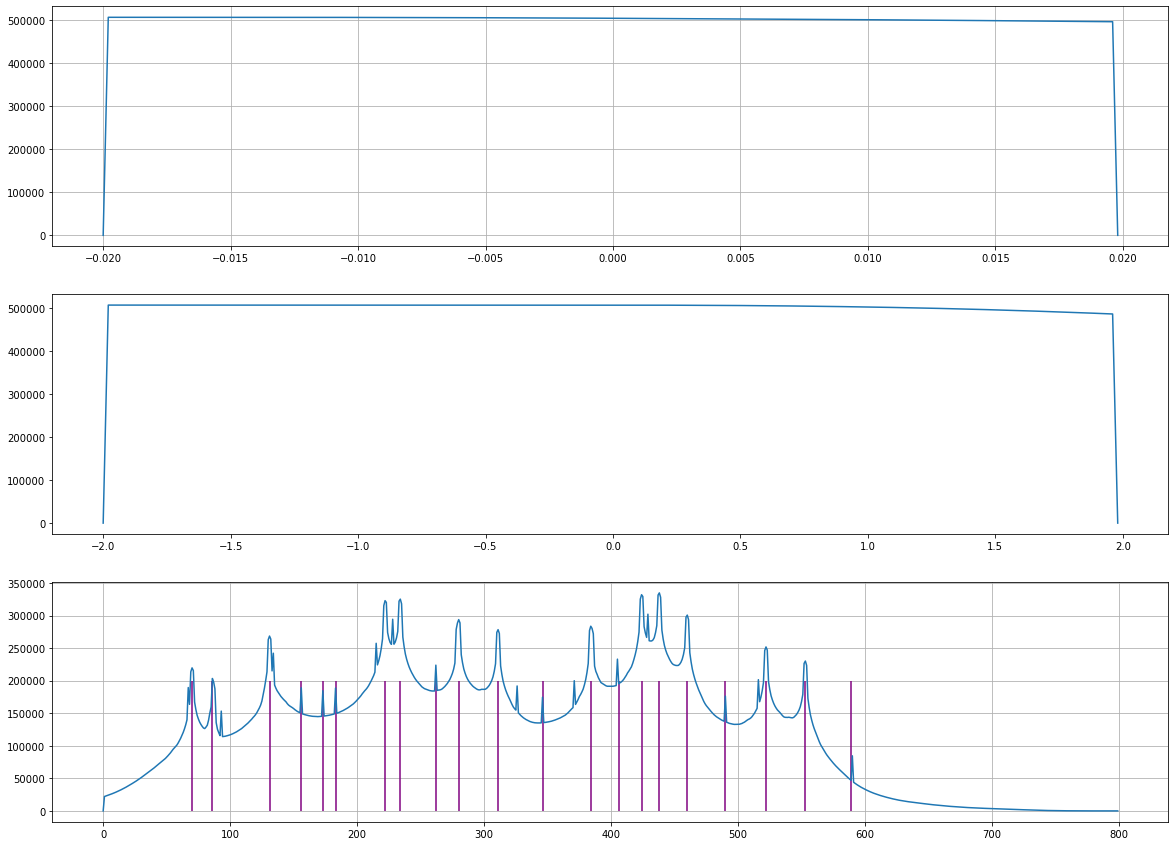

In [1818]:
plt.subplot(3, 1, 1)
plt.plot(aa, accumulator.sum(axis = (1, 2)))
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(bb, accumulator.sum(axis = (0, 2)))
plt.subplot(3, 1, 3)
curve_c = argrelextrema(gf(accumulator.sum(axis = (0, 1)), 2), np.greater)[0]
plt.vlines(x = curve_c, ymin = 0, ymax = (2e5), 
           colors = 'purple', 
           label = 'vline_multiple - full height') 
curve_c
plt.grid()
plt.plot(cc, accumulator.sum(axis = (0, 1)))

In [807]:
indices.shape

(2, 60, 598)

In [808]:
def get_features_spans(labeled, i):
    indices = np.indices(labeled.shape)#.T[:,:,[1, 0]]
    vi, hi = indices[:, labeled == i]
    vspan = vi.max() - vi.min()
    hspan = hi.max() - hi.min()
    return vspan, hspan

def get_feature_vspan(labeled, i):
    return get_features_spans(labeled, i)[0]

def get_size(labeled, i, mode = 'count'):
    if mode == 'count':
        return (labeled == i).sum()
    elif mode == 'vertical':
        return get_feature_vspan(labeled, i)
    raise Exception
    
def norm(arr, axis = 0, log_scale = False):
    """
    Log scale: scale the standard deviation along each feature dimension to the
    mean value of that feature
    
    For axis == 1, we scale features to mean and std, but only consider non-zero values.
    """
    # TODO do correct normalization for axis == 0
    if axis == 0:
        return ((arr - arr.mean(axis = axis)) / arr.std(axis = axis))
    elif axis == 1:
        xi, yi = np.nonzero(arr)
        xxi, yyi = lambda i: xi[xi == i], lambda i: yi[xi == i]
        means, stds = np.array([(arr[xxi(i), yyi(i)].mean(), arr[xxi(i), yyi(i)].std() )
                                for i in range(arr.shape[0])]).T
        if log_scale:
            stds *= np.log(means)
        return ((arr - means[:, None]) / stds[:, None])
    raise Exception
    
def csim_pairs(composition):
    norm = np.linalg.norm(composition, axis = 1)
    similarity = np.dot(composition, composition.T) / np.outer(norm, norm)
    return similarity

def l2_pairs(a):
    b = a.reshape((a.shape[0], 1, a.shape[1]))
    dist_l2 = np.sqrt(np.einsum("ijk, ijk->ij", a - b, a - b))
    return dist_l2

def l2_sim(a):
    return -l2_pairs(a)
    
from scipy.ndimage.measurements import label
from sklearn.cluster import KMeans

In [640]:
a = np.array([[1,0,1,0],
         [1,1,0,0],
         [1,0,1,0],
         [0,0,1,1]])

b = a.reshape(a.shape[0], 1, a.shape[1])

np.sqrt(np.einsum('ijk, ijk->ij', a-b, a-b)).shape


(4, 4)

In [852]:
def get_ridge_features(patterns, smooth = 1.7, threshold_percentile = 60, thicken = True, size_thresh = 5,
                      bgsub = False, bg_smooth = 80, log_scale_features = False, logscale_heatmap = True,
                      a = 5, b = 1):
    plt.rcParams["figure.figsize"]=(20, 13)
    plt.subplot(a, b, 1)
    plt.title('ridges')
    plt.imshow(get_ridges(patterns), cmap = 'jet')

    bg = gf(patterns,bg_smooth)
    p = patterns.copy()
    if bgsub:
        p = p - bg

    threshold = np.percentile(patterns, threshold_percentile)
    p[p < threshold] = 0

    #p = np.log(1 + p)
    smoothed = gf(p, smooth)

    arr = get_ridges(smoothed)
    plt.subplot(a, b, 2)
    plt.title('ridges (smoothed)')
    plt.imshow(arr, cmap = 'jet')

    if thicken:
        arr = shuffle(arr)
    else:
        arr = np.sign(arr)

    plt.subplot(a, b, 3)
    plt.title('ridged(smoothed and expanded)')
    plt.imshow(arr, cmap = 'jet')

    structure = np.ones((3, 3), dtype=int)  # this defines the connection filter
    labeled, ncomponents = label(arr, structure)
    indices = np.indices(arr.shape)#.T[:,:,[1, 0]]
    xx, yy = indices

    j = 1
    new_labeled = np.zeros_like(labeled)
    # TODO: thickening and size threshold should be linked
    for i in range(1, ncomponents + 1):
        n_i = get_size(labeled, i, 'vertical')
        if n_i >= size_thresh:
            new_labeled[labeled == i] = j
            j += 1

    labeled = new_labeled

    plt.subplot(a, b, 4)
    plt.title('final feature masks')
    plt.imshow(labeled, cmap = 'jet')

    plt.subplot(a, b, 5)
    plt.title('final feature masks (overlayed)')
    if logscale_heatmap:
        plt.imshow(np.log(1 + patterns), cmap = 'jet')
    else:
        plt.imshow(patterns, cmap = 'jet')
    plt.imshow(np.sign(labeled), cmap='Greys', alpha = .5)
    feature_masks = np.array([labeled == i for i in range(1, labeled.max() + 1)])
    print(len(feature_masks))

    activations = (feature_masks * patterns).sum(axis = 2)
    activations_n0 = norm(activations, 0, log_scale = log_scale_features)
    activations_n1 = norm(activations, 1, log_scale = log_scale_features)
    return labeled, feature_masks, activations, activations_n0, activations_n1

def do_clust(activations, n_clust, ctype = 'agglom'):
    X = activations.T
    
    if ctype == 'kmeans':
        # X = activations_n1.T
        kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(X)
        clust = kmeans.labels_
    elif ctype == 'agglom':
        clustering = AgglomerativeClustering(n_clusters=n_clust).fit(X)
        clust = clustering.labels_
    else:
        raise Exception

    clust_cms = np.zeros_like(clust).astype(float)
    ci = np.indices(patterns.shape)[0]
    for i in range(clust.max() + 1):
        val = (ci[clust == i].astype('float').mean())
        #print(val)
        clust_cms[clust == i] = val

    sorter = np.argsort([j * 10000 + i for (i, j) in enumerate(clust_cms)])
    return clust, sorter, clust_cms

def get_boundaries(activations, n_clust = 7, ctype = 'agglom'):
    clust, sorter, clust_cms = do_clust(activations, n_clust, ctype = ctype)
    boundaries = np.hstack(((np.diff(clust_cms[sorter]) > 0), [0])).astype(bool)
    return sorter, boundaries, clust_cms

def cluster_draw_boundaries(activations, n_clust = 7, ctype = 'agglom', logscale = True):
    sorter, boundaries, _ = get_boundaries(activations, n_clust = n_clust, ctype = ctype)
    p3 = patterns.copy()
    p3[boundaries] = p3.min()
    #p3[:, 550:] = (p3.min() + (p3.max() - p3.min()) * (clust / (clust.max() - clust.min())))[:, None]
    plt.title('{} clusters feat (N = {})'.format(ctype, n_clust))
    if logscale:
        plt.imshow(np.log(1 + p3[sorter]), cmap = 'jet')
    else:
        plt.imshow(p3[sorter], cmap = 'jet')

    return boundaries
    
    
def plot_pca_explained_variance(X):
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    sc.fit(X)
    X_train_std = sc.transform(X)
    #X_test_std = sc.transform(X_test)
    #
    # Instantiate PCA
    #
    pca = PCA()
    #
    # Determine transformed features
    #
    X_train_pca = pca.fit_transform(X_train_std)
    #
    # Determine explained variance using explained_variance_ration_ attribute
    #
    exp_var_pca = pca.explained_variance_ratio_
    #
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    #
    # Create the visualization plot
    #
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return cum_sum_eigenvalues

27


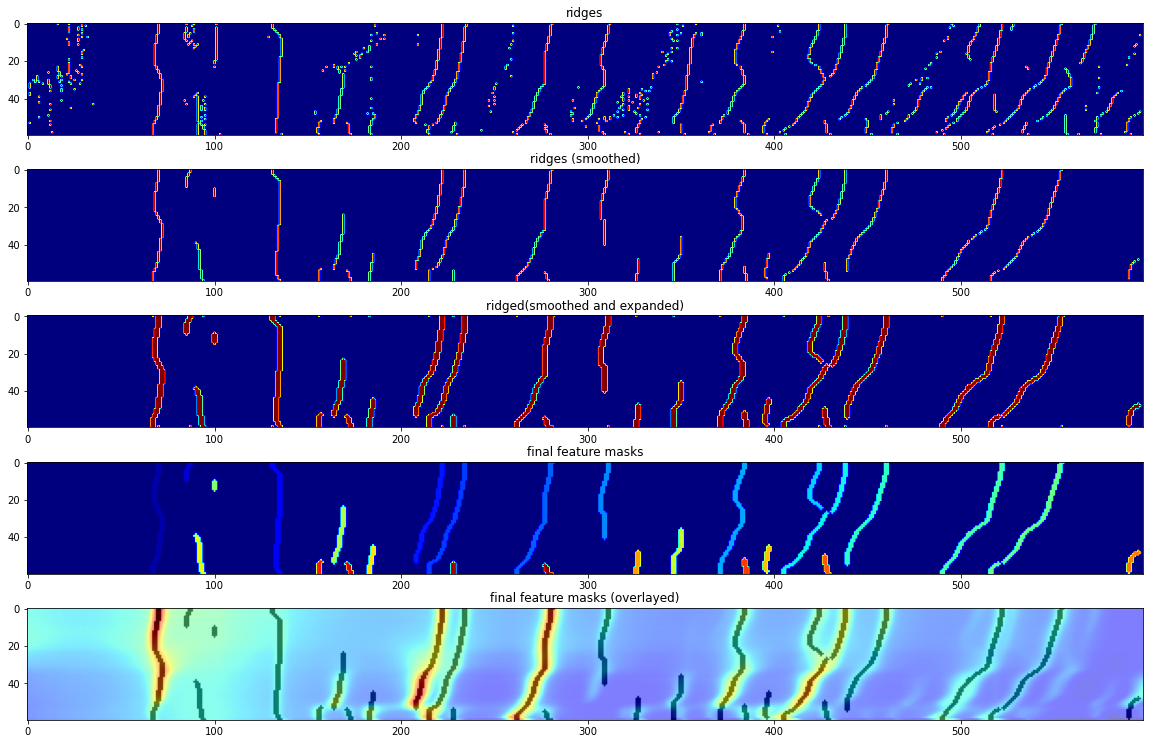

In [837]:
df = pd.read_csv("YijinXRD.dat", sep = '\t')
qq = df.iloc[:, 0]

patterns = df.iloc[:, 2:]
patterns = patterns.values.T
for i in range(len(patterns)):
    patterns[i] = patterns[i] - i * 1000

# for i in range(len(patterns)):
#     plt.plot(patterns[i])

labeled, feature_masks, activations, activations_n0, activations_n1 = get_ridge_features(patterns,
   smooth = 1.7, threshold_percentile = 60, thicken = True, size_thresh = 5, bgsub=False)
# _, _, _, _, activations_n1_ls = get_ridge_features(
#    smooth = 1.7, threshold_percentile = 60, thicken = True, size_thresh = 5, bgsub=False)

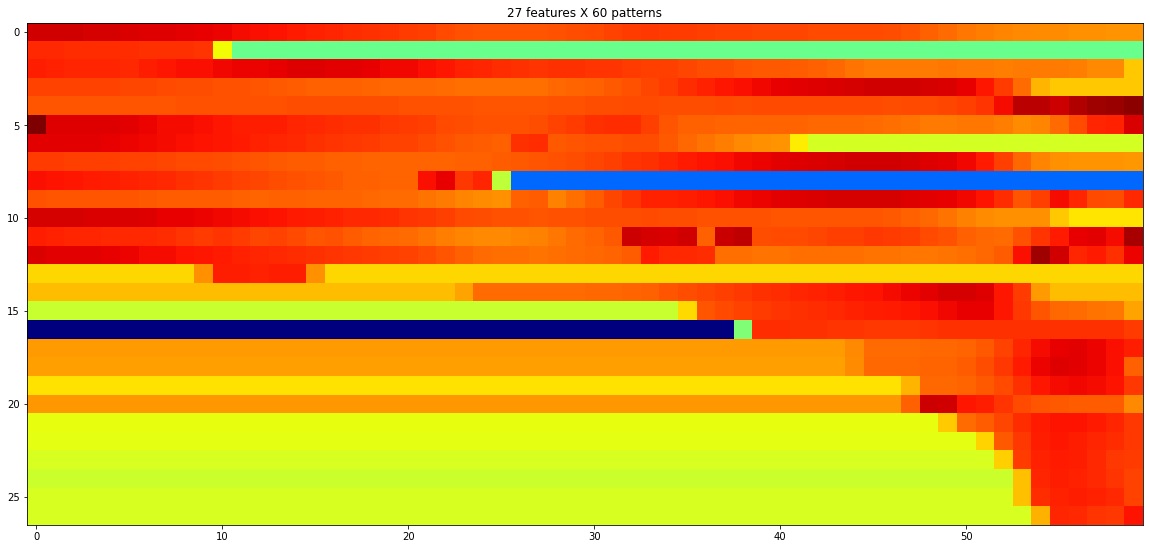

In [320]:
plt.title("{} features X 60 patterns".format(len(feature_masks)))
plt.imshow(np.log(1 - activations_n1.min() + activations_n1), cmap = 'jet')

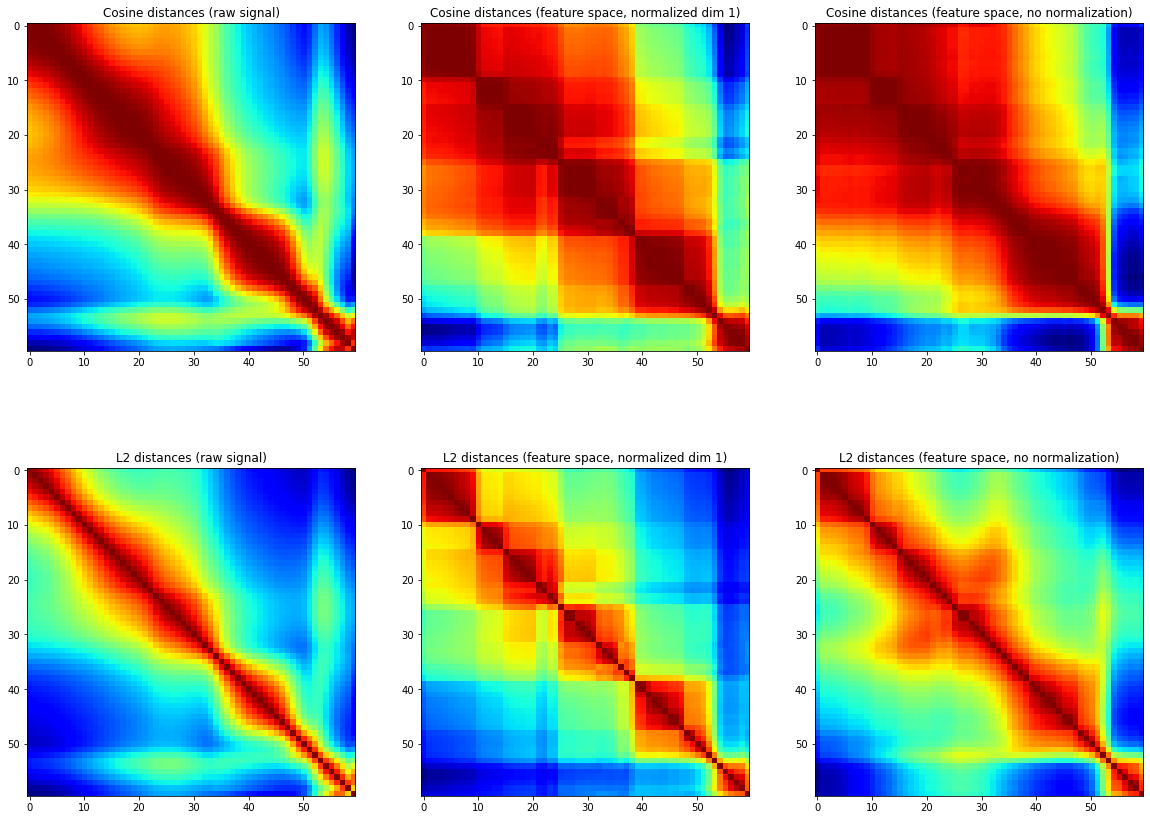

In [830]:
a, b = 2, 3
plt.rcParams["figure.figsize"]=(20, 15)

def similarity_plot_row(fn, label, patterns, activations, activations_n1, offset = 0):
    plt.subplot(a, b, 1 + offset)
    raw_csims = fn(patterns)
    plt.title("{} distances (raw signal)".format(label))
    plt.imshow(raw_csims, interpolation = 'none', cmap = 'jet')
    #plt.colorbar()

    plt.subplot(a, b, 2 + offset)
    feature_csims1 = fn(activations_n1.T)
    plt.title("{} distances (feature space, normalized dim 1)".format(label))
    plt.imshow(feature_csims1, interpolation = 'none', cmap = 'jet')

    plt.subplot(a, b, 3 + offset)
    feature_csims = fn(activations.T)
    plt.title("{} distances (feature space, no normalization)".format(label))
    plt.imshow(feature_csims, interpolation = 'none', cmap = 'jet')
    
similarity_plot_row(csim_pairs, 'Cosine', patterns, activations, activations_n1)
similarity_plot_row(lambda arr: -l2_pairs(arr), 'L2', patterns, activations, activations_n1, 3)


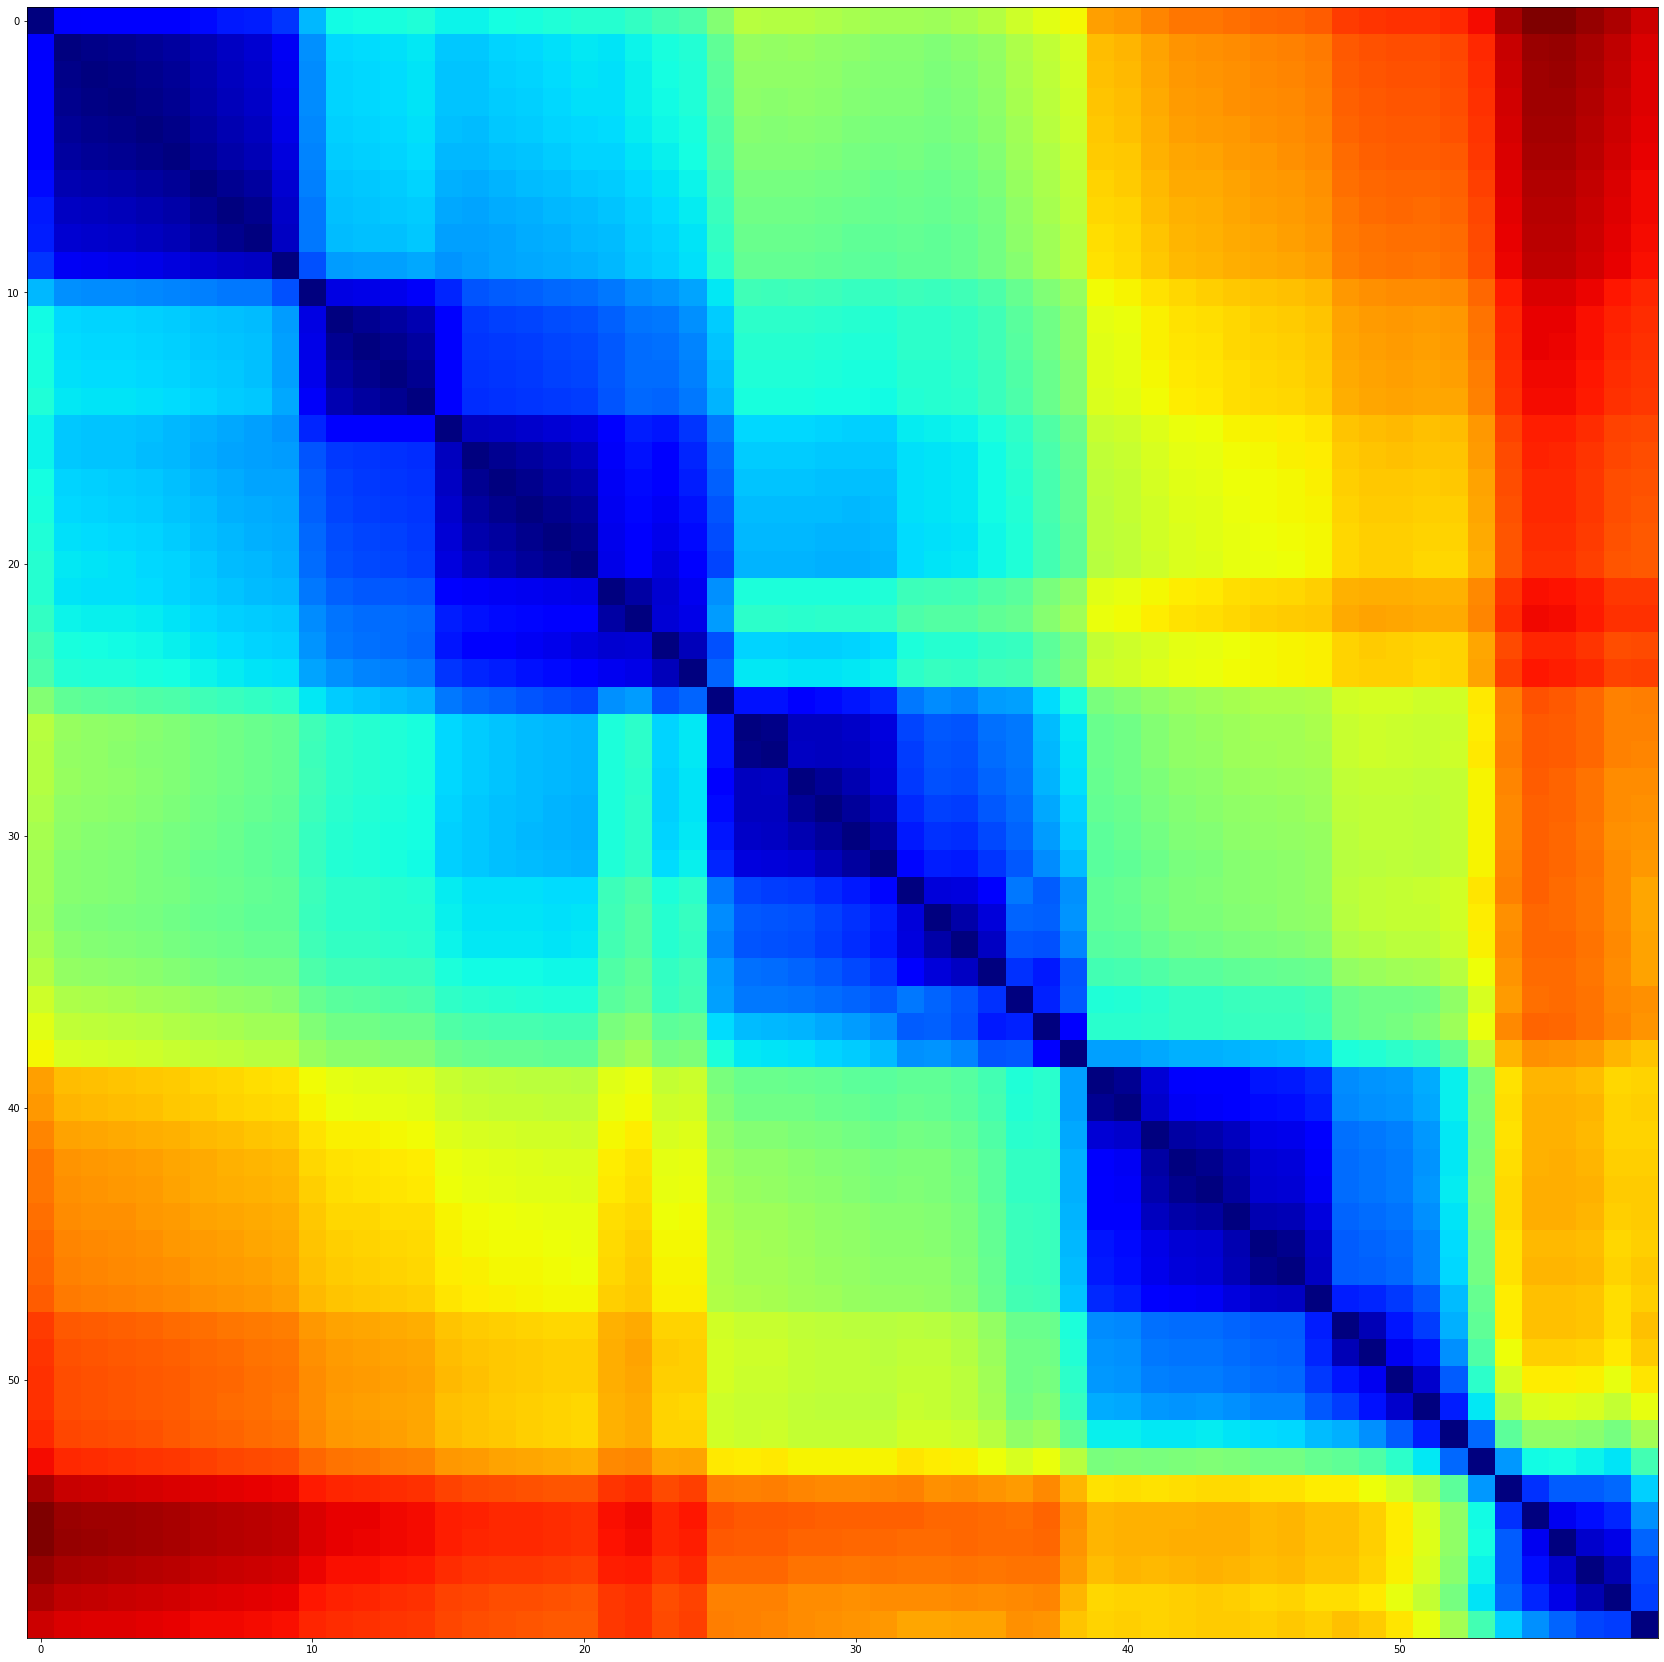

In [718]:
a = activations_n1.T
dist_l2 = l2_pairs(a)

plt.imshow(dist_l2, cmap = 'jet')

In [770]:
def ordered_cuts(activations, n):
    X = activations.T
    # calculate order of agglomerative clustering boundaries up to n
    aggloms = [AgglomerativeClustering(n_clusters=i).fit(X).labels_ for i in range(2, n + 1)]
    aggloms = [np.zeros_like(aggloms[0])] + aggloms
    cuts = set()
    for i, (cp, cn) in enumerate(zip(aggloms, aggloms[1:])):
        diff_prev = (np.diff(cp) != 0)
        diff_next = (np.diff(cn) != 0)
        for cut_i in np.where((diff_prev ^ diff_next))[0]:
            if cut_i not in cuts:
                cuts.add((i, cut_i))
                cuts.add(cut_i)
    cuts = sorted(list(filter(lambda elt: type(elt) == tuple, cuts)))
    cuts = [elt[1] for elt in cuts]
    return cuts

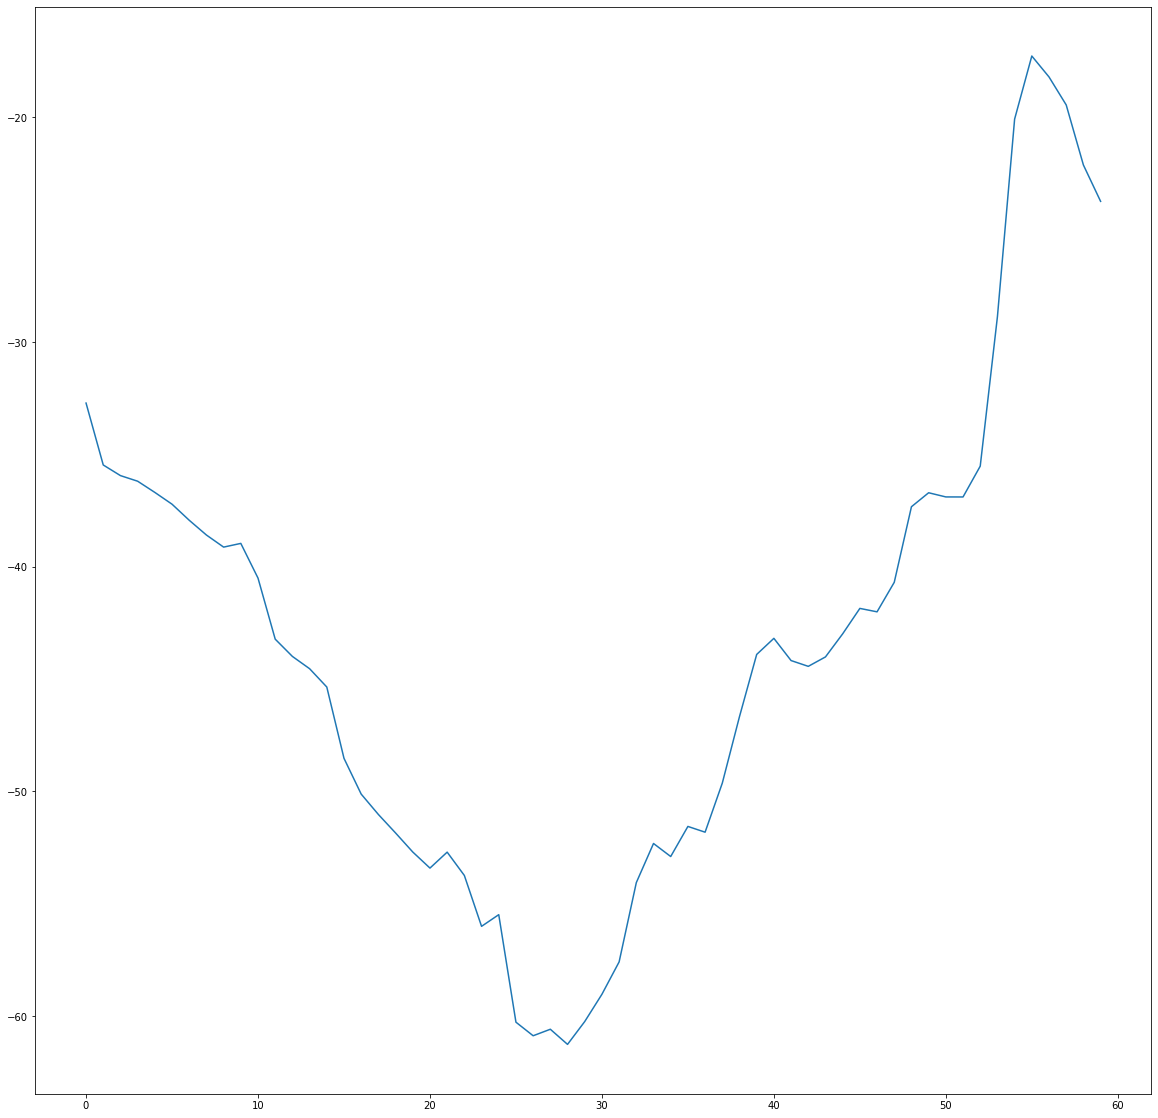

In [179]:
plt.plot(activations_n1.sum(axis = 0))

In [176]:
# ^
visual_boundaries = np.array([53, 39, 25, 10])

In [798]:
%matplotlib inline

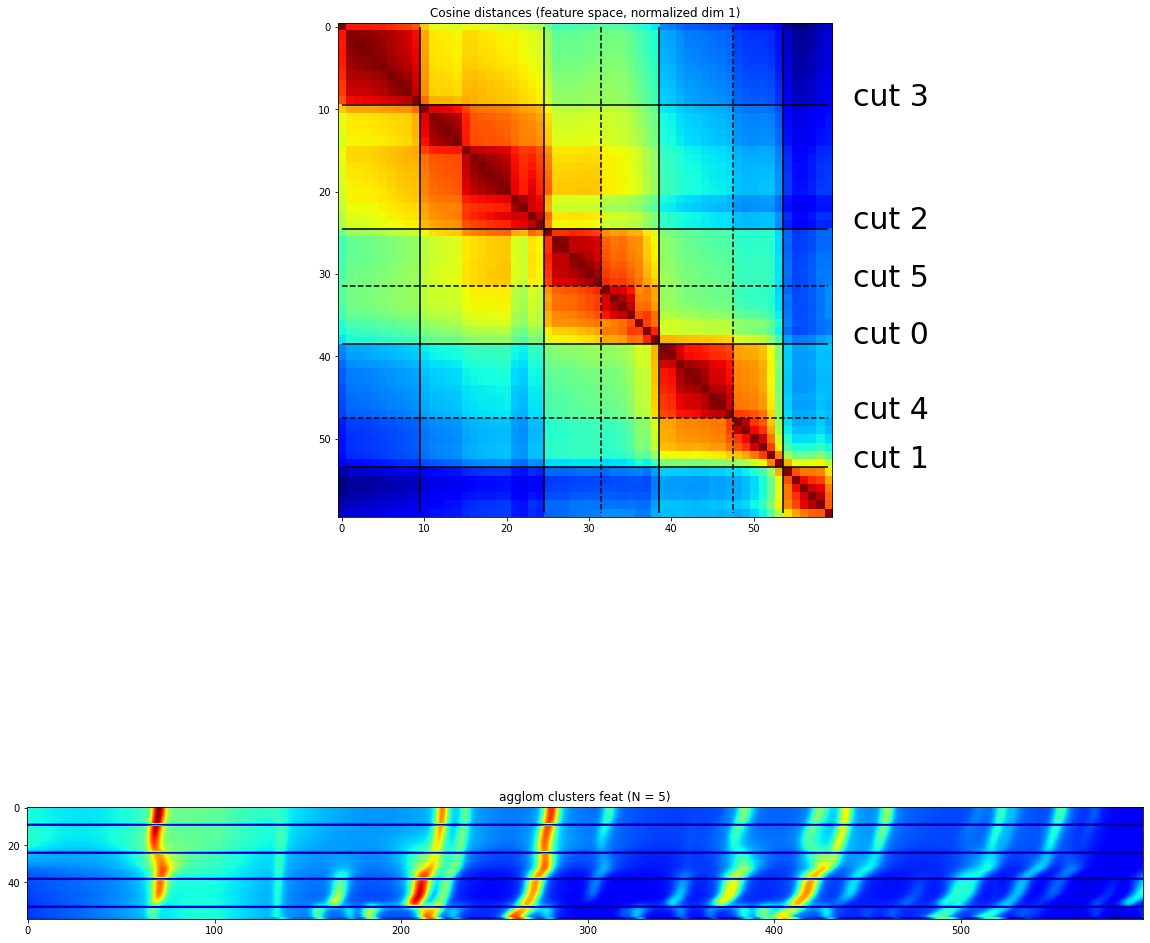

In [797]:
a, b = 2, 1
n = 5

plt.rcParams["figure.figsize"]=(20, 20)

feature_csims1 = l2_sim(activations_n1.T)

plt.subplot(a, b, 1)

_, boundaries, clust_cms = get_boundaries(activations_n1, n)
o_cuts = ordered_cuts(activations_n1, 7)

N, M = patterns.shape

# feature_csims1 = csim_pairs(activations_n1.T)
plt.title("Cosine distances (feature space, normalized dim 1)")
plt.imshow(feature_csims1, interpolation = 'none', cmap = 'jet')
for i, v in enumerate(o_cuts):
    if v:
        if i > 3:
            sty = 'dashed'
        else:
            sty = 'solid'
        plt.hlines(v + .5, 0, N - 1, color = 'k', linestyles=sty)
        plt.vlines(v + .5, 0, N - 1, color = 'k', linestyles=sty)
        plt.text(62, v + .5, "cut {}".format(i), fontsize=30)
        
plt.subplot(a, b, 2)
cluster_draw_boundaries(activations_n1, n);

In [601]:
clust_cms

array([ 4.5,  4.5,  4.5,  4.5,  4.5,  4.5,  4.5,  4.5,  4.5,  4.5, 17. ,
       17. , 17. , 17. , 17. , 17. , 17. , 17. , 17. , 17. , 17. , 17. ,
       17. , 17. , 17. , 31.5, 31.5, 31.5, 31.5, 31.5, 31.5, 31.5, 31.5,
       31.5, 31.5, 31.5, 31.5, 31.5, 31.5, 46. , 46. , 46. , 46. , 46. ,
       46. , 46. , 46. , 46. , 46. , 46. , 46. , 46. , 46. , 46. , 56.5,
       56.5, 56.5, 56.5, 56.5, 56.5])

In [25]:
from xrdc import geometry as geo

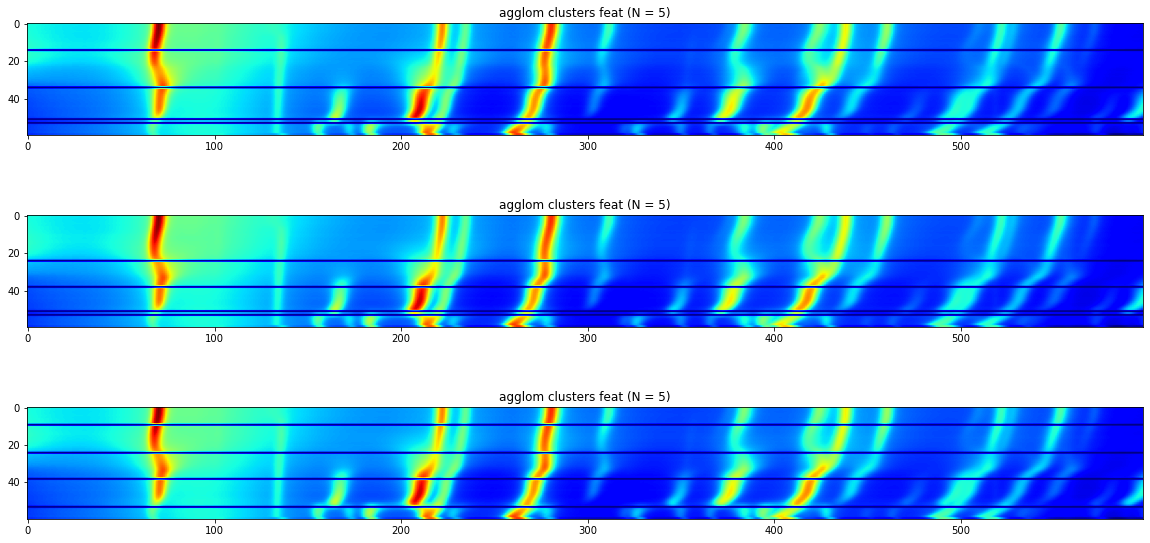

In [80]:
plt.rcParams["figure.figsize"]=(20, 10)


n_clust = 5
a, b = 3, 1

plt.subplot(a, b, 1)
cluster_draw_boundaries(activations, n_clust)
plt.subplot(a, b, 2)
cluster_draw_boundaries(activations_n0, n_clust)
plt.subplot(a, b, 3)
cluster_draw_boundaries(activations_n1, n_clust)

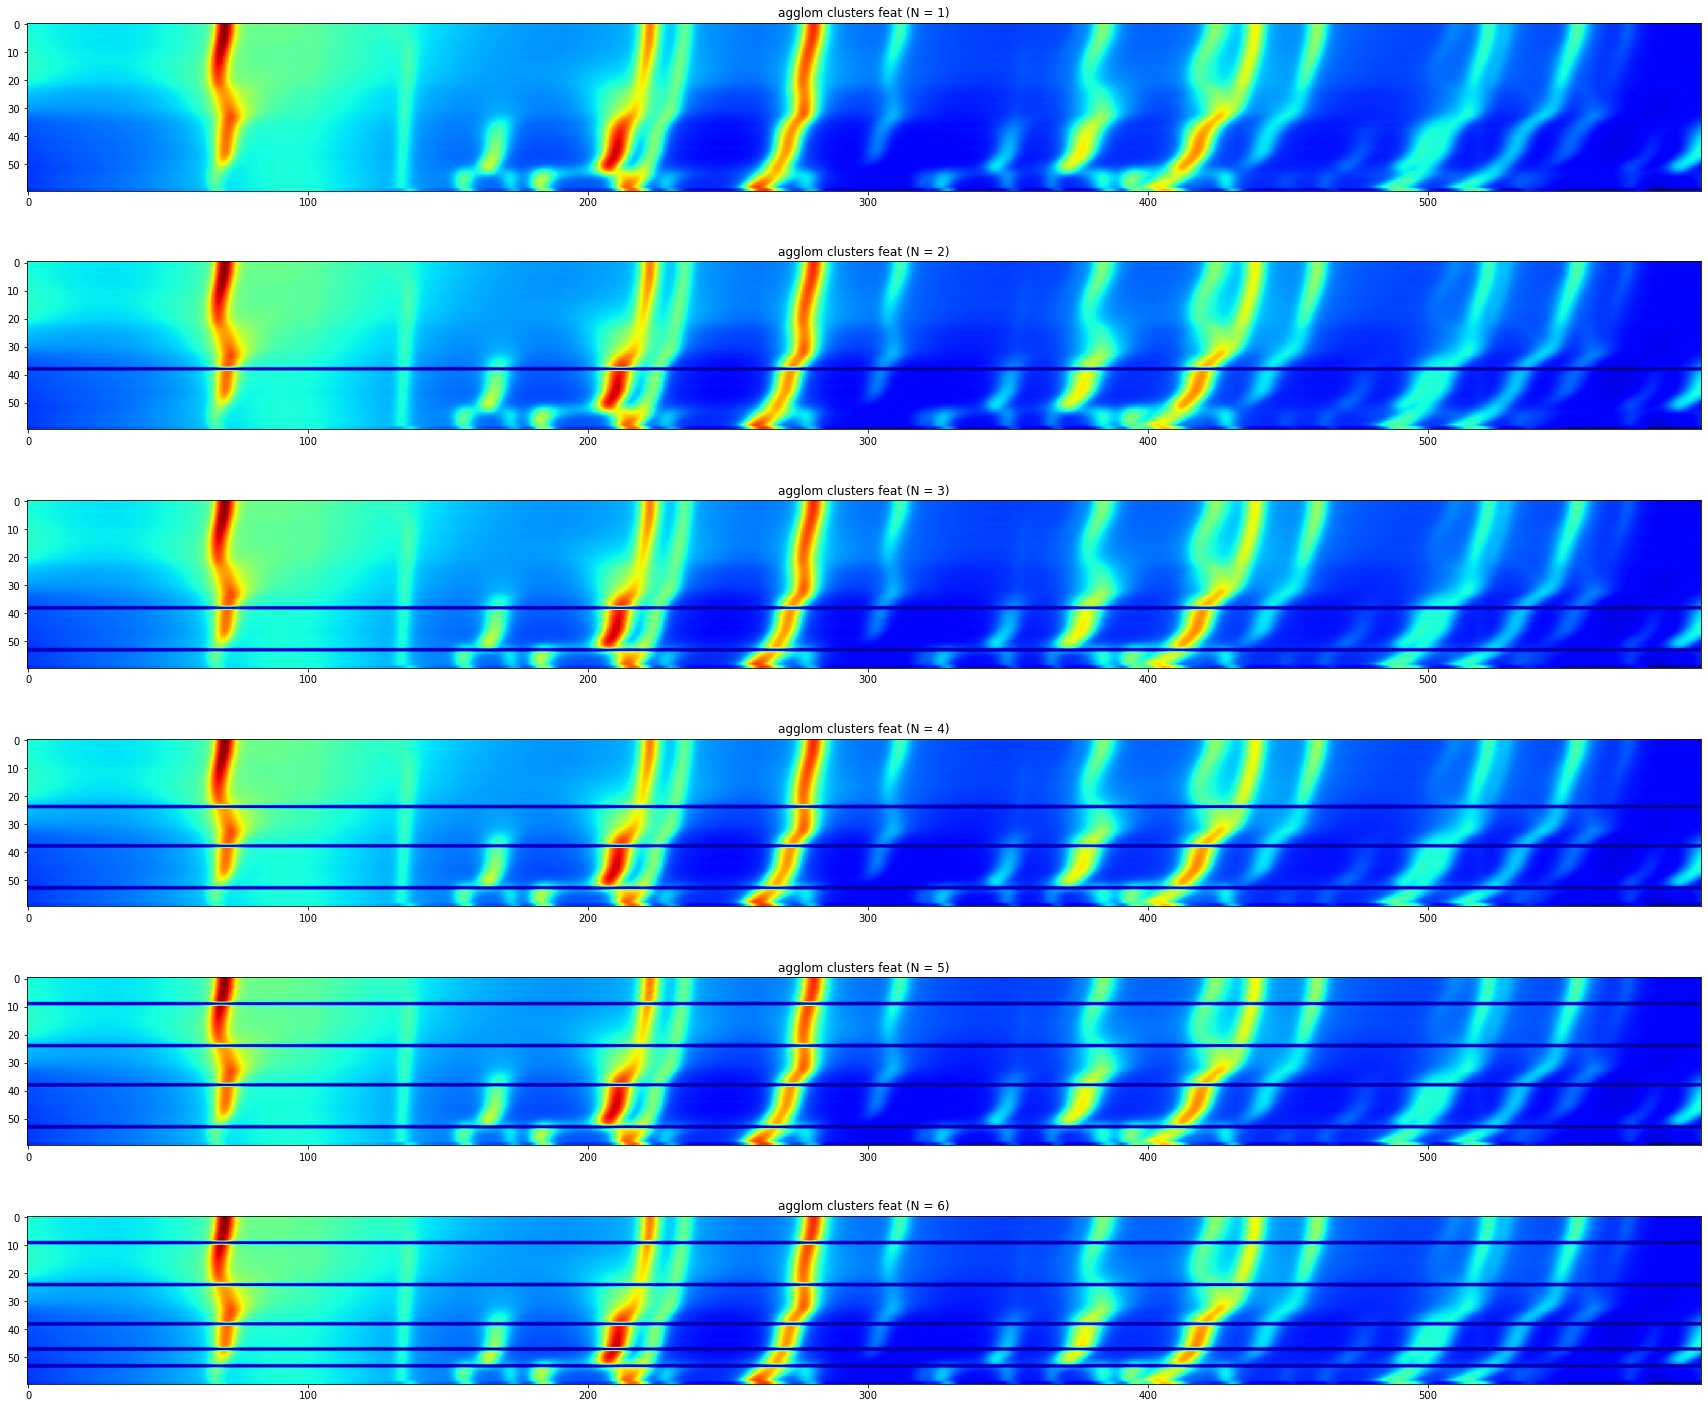

In [799]:
plt.rcParams["figure.figsize"]=(30, 30)

a, b = 7, 1

for n in range(1, 7):
    plt.subplot(a, b, n)
    cluster_draw_boundaries(activations_n1, n)

In [197]:
ks = np.arange(2, 20)
ks

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

In [198]:
from sklearn.metrics import silhouette_score

In [216]:
X = activations_n1.T
#X = patterns

clust_ks_kmeans = [silhouette_score(X, do_clust(X.T, k, ctype = 'kmeans')[0]) for k in ks]
clust_ks_agglom = [silhouette_score(X, do_clust(X.T, k, ctype = 'agglom')[0]) for k in ks]

In [219]:
X = activations_n1.T
clust_featurized = [silhouette_score(X, do_clust(X.T, k, ctype = 'kmeans')[0]) for k in ks]

X = patterns
clust_raw = [silhouette_score(X, do_clust(X.T, k, ctype = 'kmeans')[0]) for k in ks]

In [ ]:
clust_ks_kmeans2 = [silhouette_score(X, do_clust(, k, ctype = 'kmeans')[0]) for k in ks]


In [ ]:
plt.plot(ks, clust_ks_kmeans)
plt.plot(ks, clust_ks_kmeans)


Text(0.5, 0, 'K (number of clusters)')

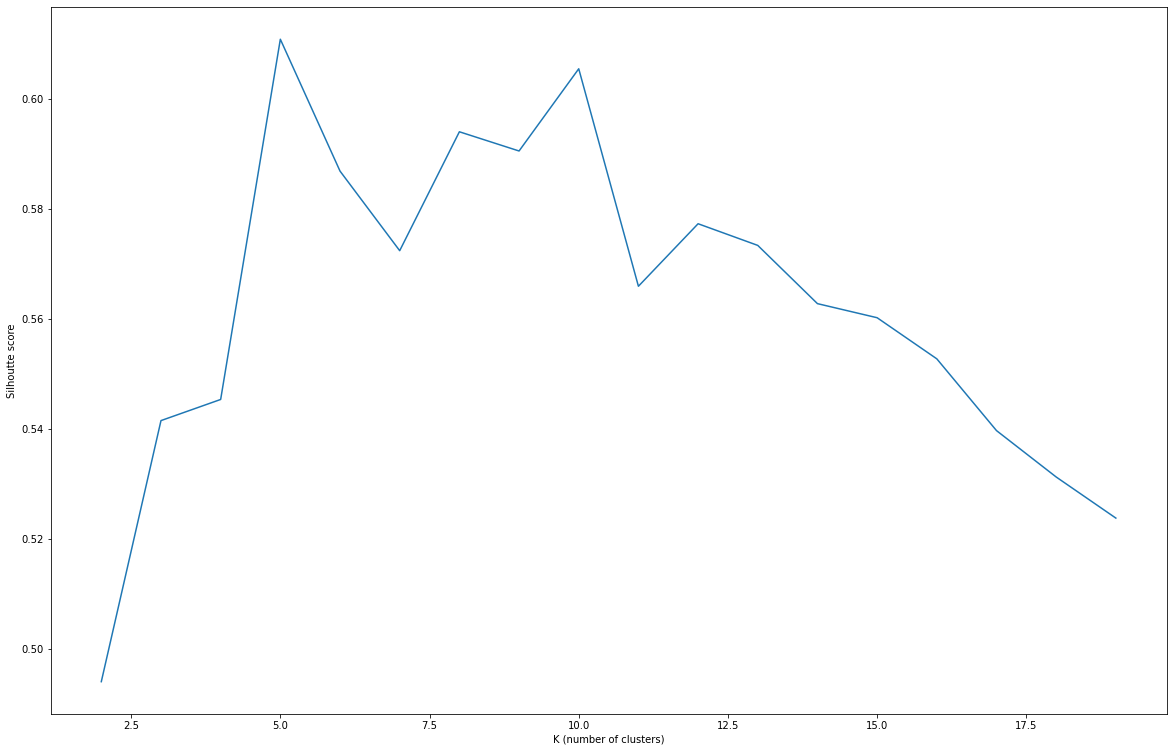

In [269]:
plt.plot(ks, clust_ks_kmeans)
plt.ylabel("Silhoutte score")
plt.xlabel("K (number of clusters)")
#plt.plot(ks, clust_ks_agglom)

In [289]:
X.shape

(60, 27)

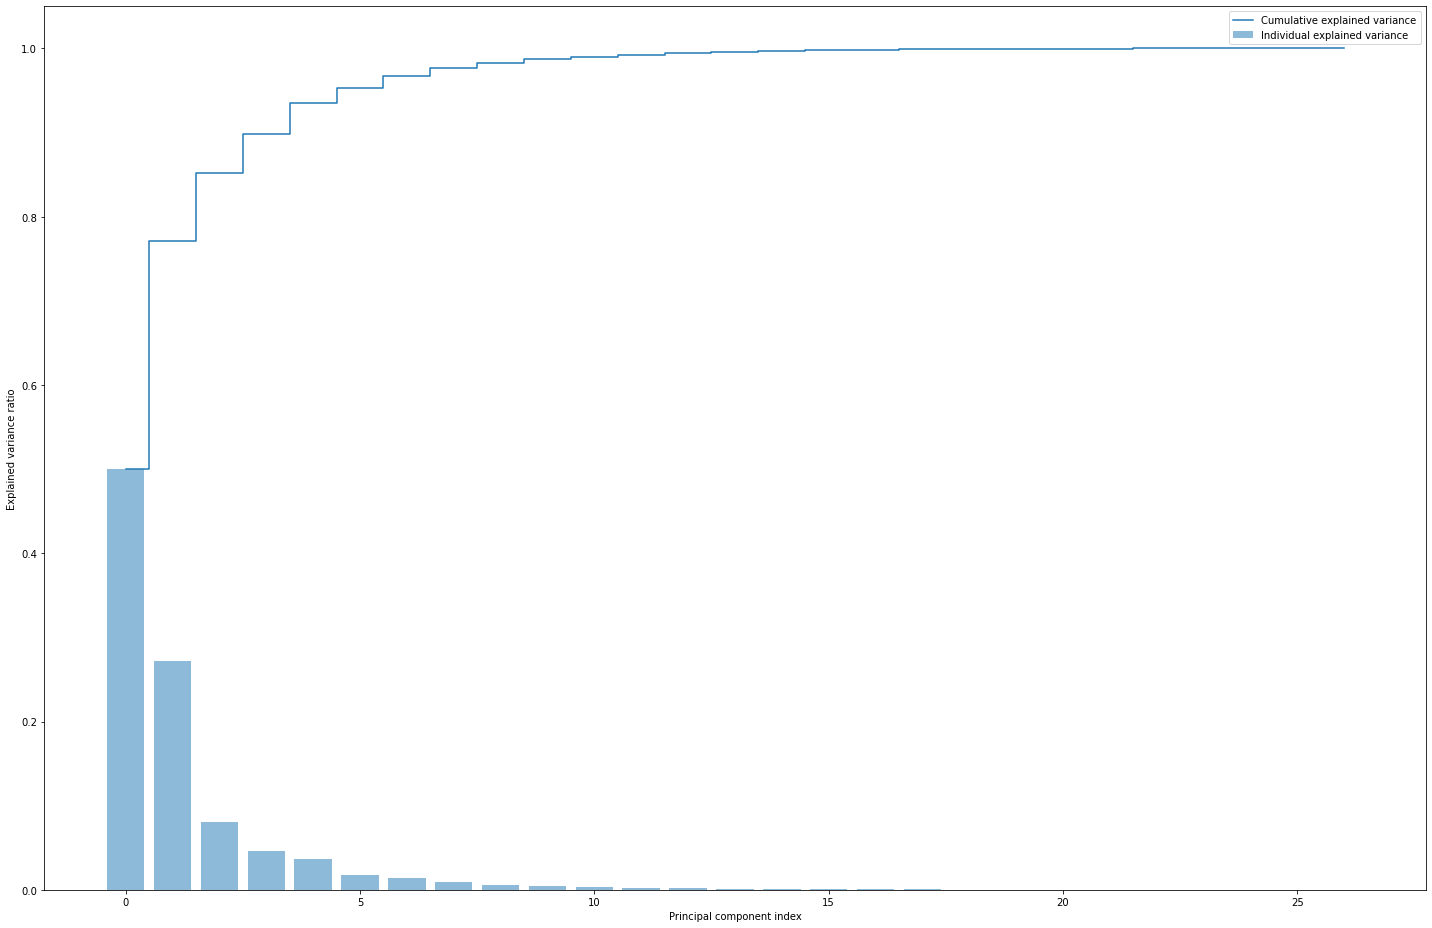

In [294]:
csum_eigen_feats = plot_pca_explained_variance(activations_n1.T)

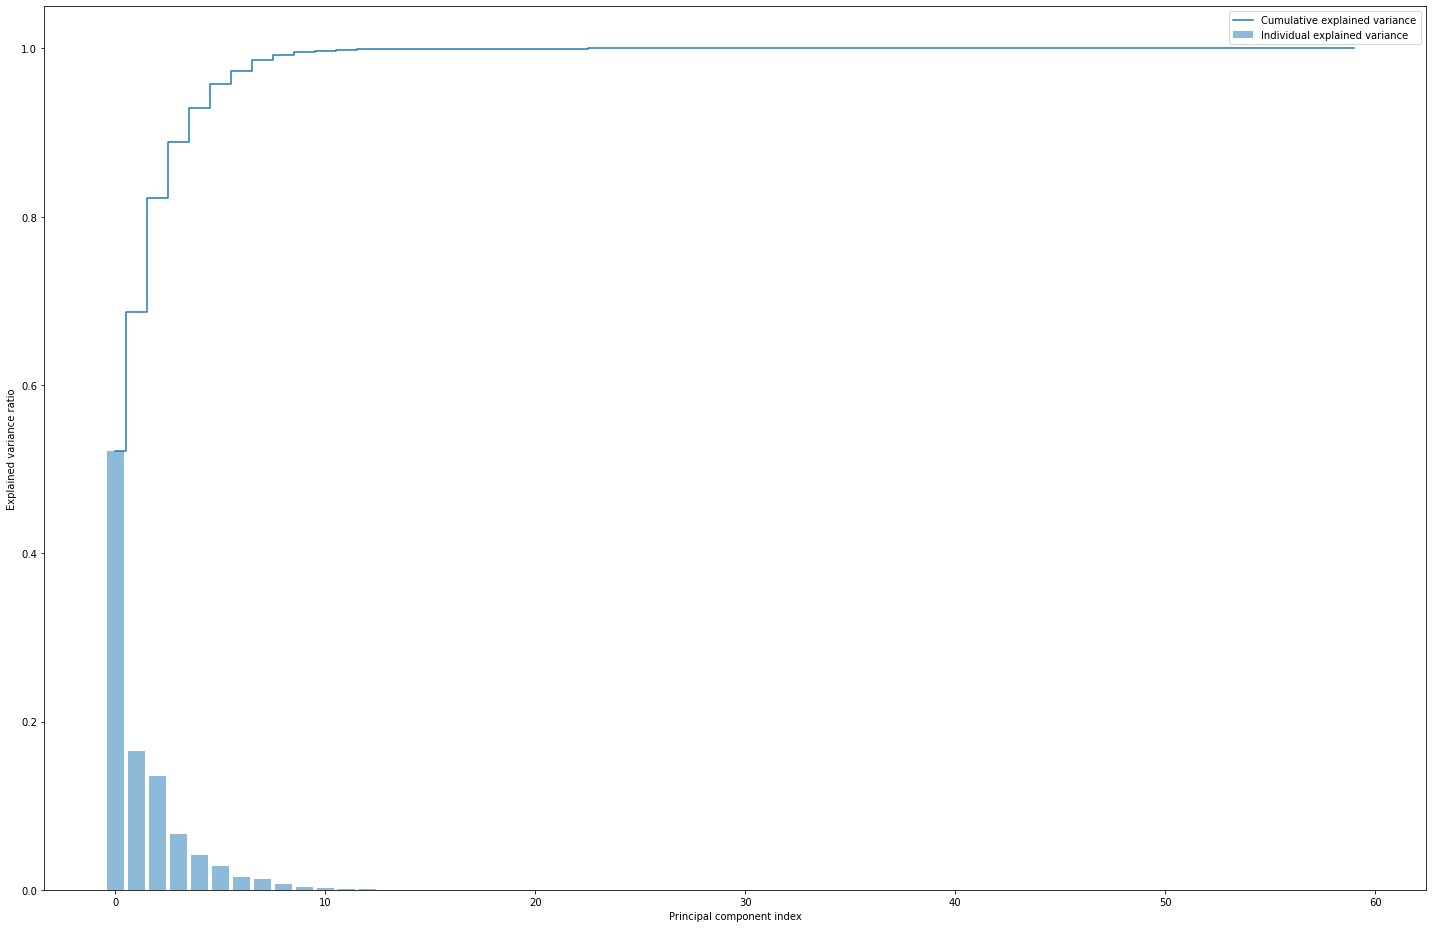

In [295]:
csum_eigen_raw = plot_pca_explained_variance(patterns)

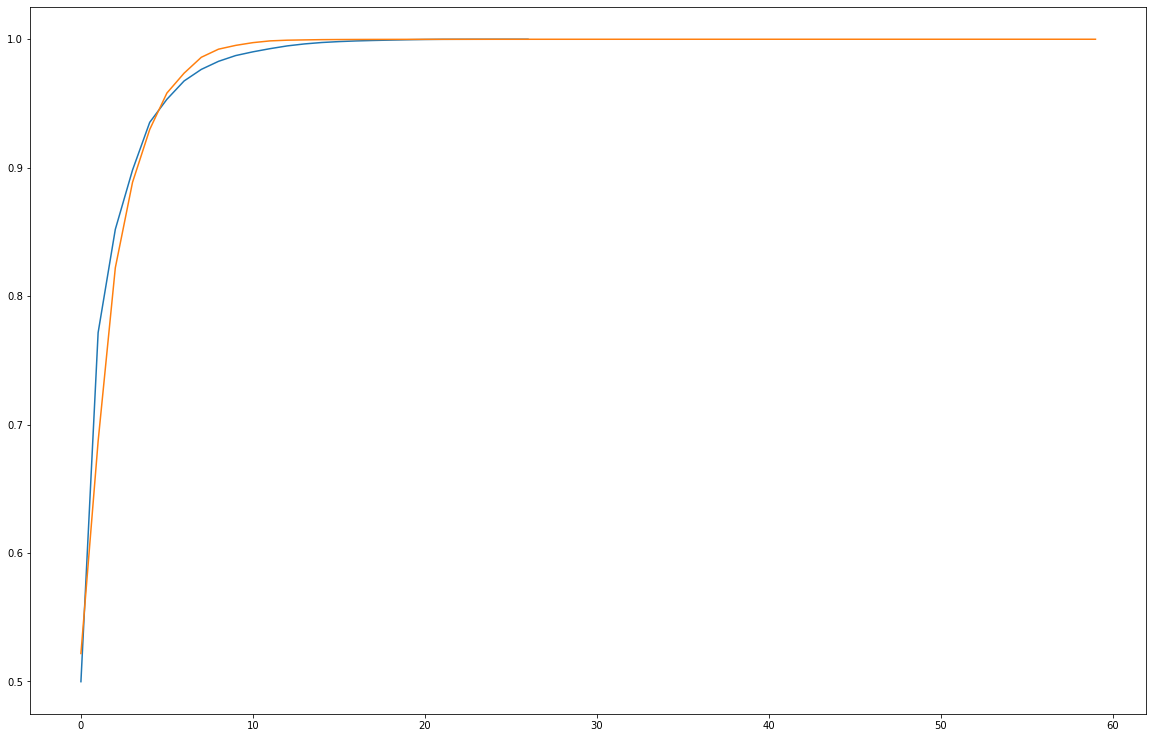

In [296]:
plt.plot(csum_eigen_feats)
plt.plot(csum_eigen_raw)

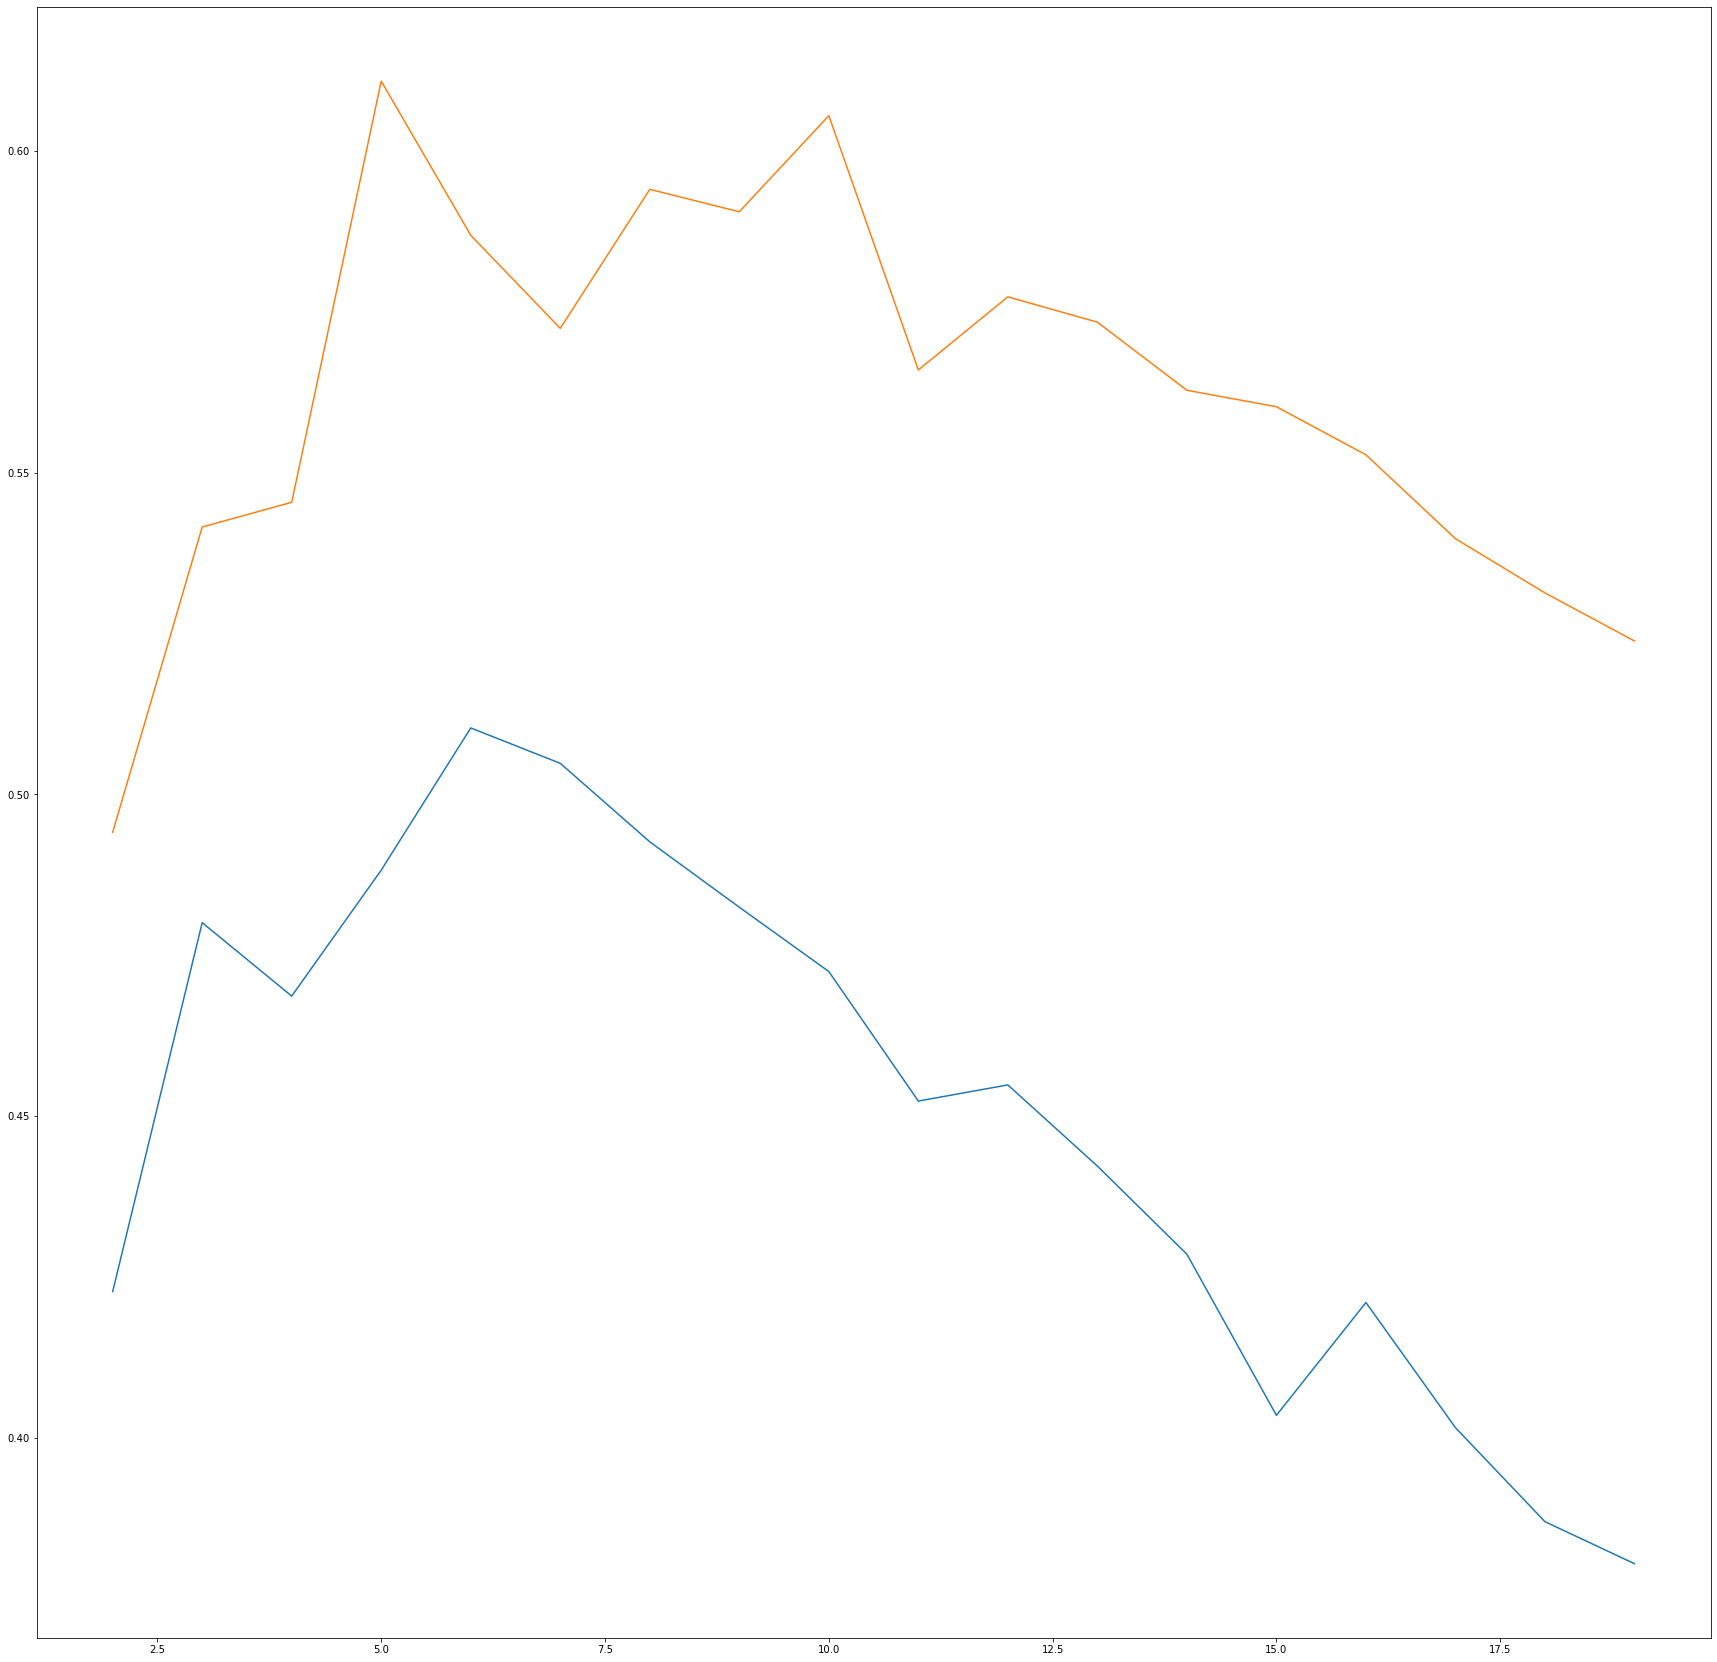

In [220]:
plt.plot(ks, clust_raw)
plt.plot(ks, clust_featurized)

In [331]:
X = activations_n1.T
n = 2

from sklearn.decomposition import PCA
pca = PCA(n_components=n)
pca.fit(X)

PCA(n_components=2)

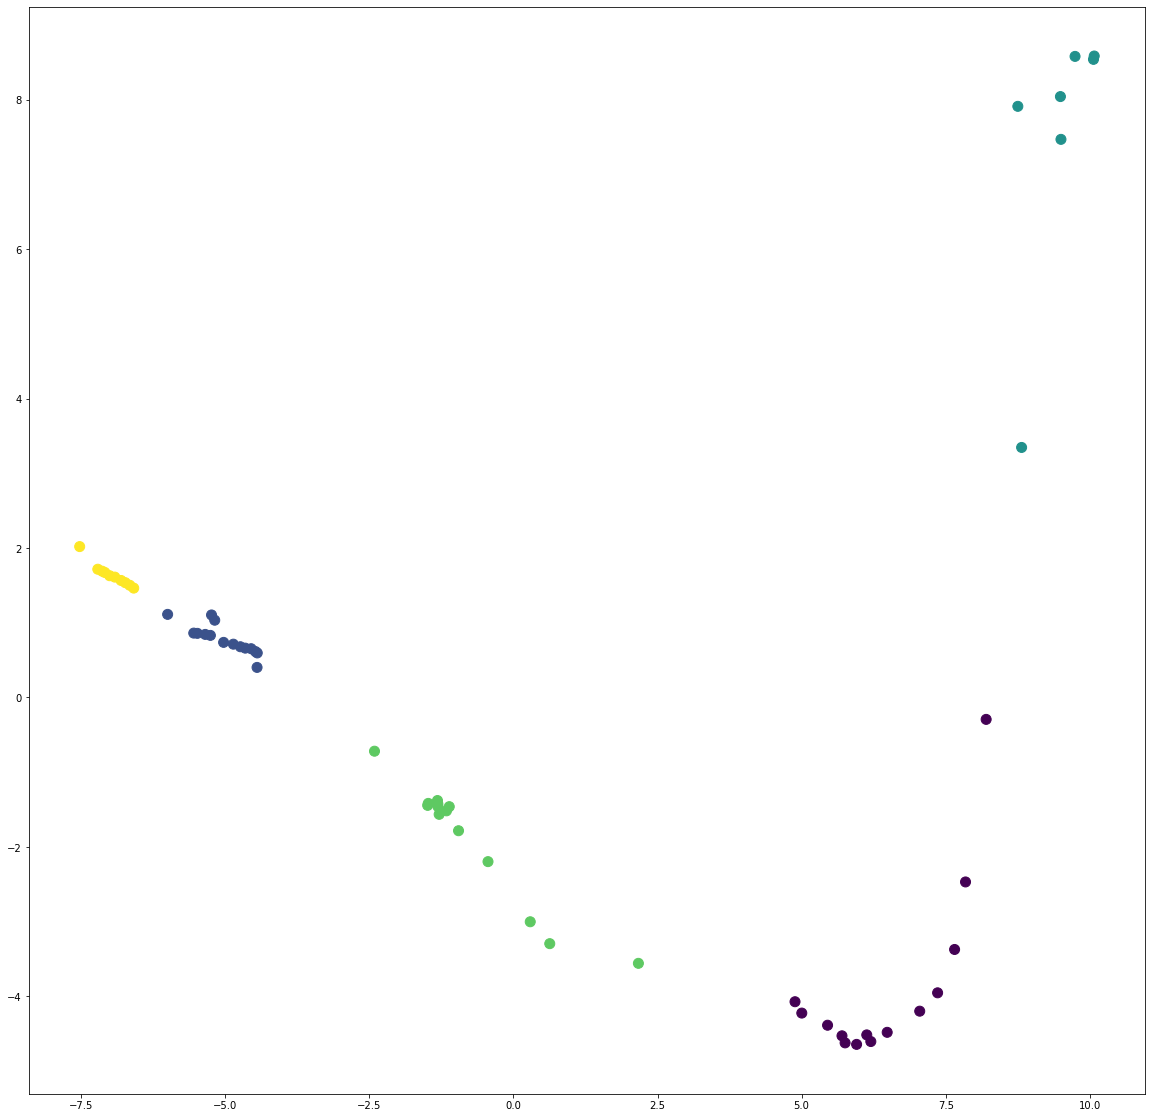

In [333]:
plt.scatter(*(pca.transform(X)).T, c = do_clust(X.T, 5, ctype = 'kmeans')[0], s = 100)

In [324]:
path = "../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/"

from data_grid import DataGrid

dgrid = DataGrid(path, """TiNiSn_500C_Y20190218_14x14_t60_(?P<num>.*?)_bkgdSub_1D.csv""",range=None)

q =dgrid.data[1][:,0]

X = dgrid.get_data_array()

# truth_labels=np.array(list([4,4,4,4,4])+list([4,4,4,4,4,4,4,3,3])+list([4,4,4,4,4,4,4,3,3,3,3])+list([4,4,4,11,4,4,4,4,3,3,3,2,2])+list([4,4,4,11,11,4,4,4,3,3,2,2,1])+list([5,5,4,11,11,11,4,4,5,5,2,2,1,1,1])+list([6,5,5,11,11,11,4,5,5,2,2,1,1,1,1])+list([7,6,5,5,11,11,5,5,2,2,1,1,1,1,1])+list([7,7,6,5,5,5,5,10,10,2,1,1,1,1,1])+list([7,7,6,6,10,10,10,10,10,9,1,1,1,1,1])+list([8,8,6,6,6,6,9,9,9,1,1,1,1])+list([8,8,8,6,9,9,9,9,9,1,1,1,1])+list([8,8,6,9,9,9,9,1,1,1,1])+list([8,6,9,9,9,9,1,1,1])+list([9,9,9,1,1]))
# #This part of the code is a savior
# new_truth_labels=[None]*177
# for ii in range(0,177):
#     x,y=dgrid.coord(ii+1)
#     new_grid=dgrid.grid_num(16-x,y)
#     new_truth_labels[new_grid-1]=truth_labels[ii]
# y=np.array(new_truth_labels)

coords = np.array([dgrid.coord(ii + 1) for ii in range(177)])
coordi = coords - 1

dim = coordi.max() + 1

m3d = np.zeros((dim, dim, X.shape[1]))

for k, (i, j) in enumerate(coordi):
    m3d[i, j, :] = X[k]

Loading Data from: ../../TiNiSn_500C-20190604T152446Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)


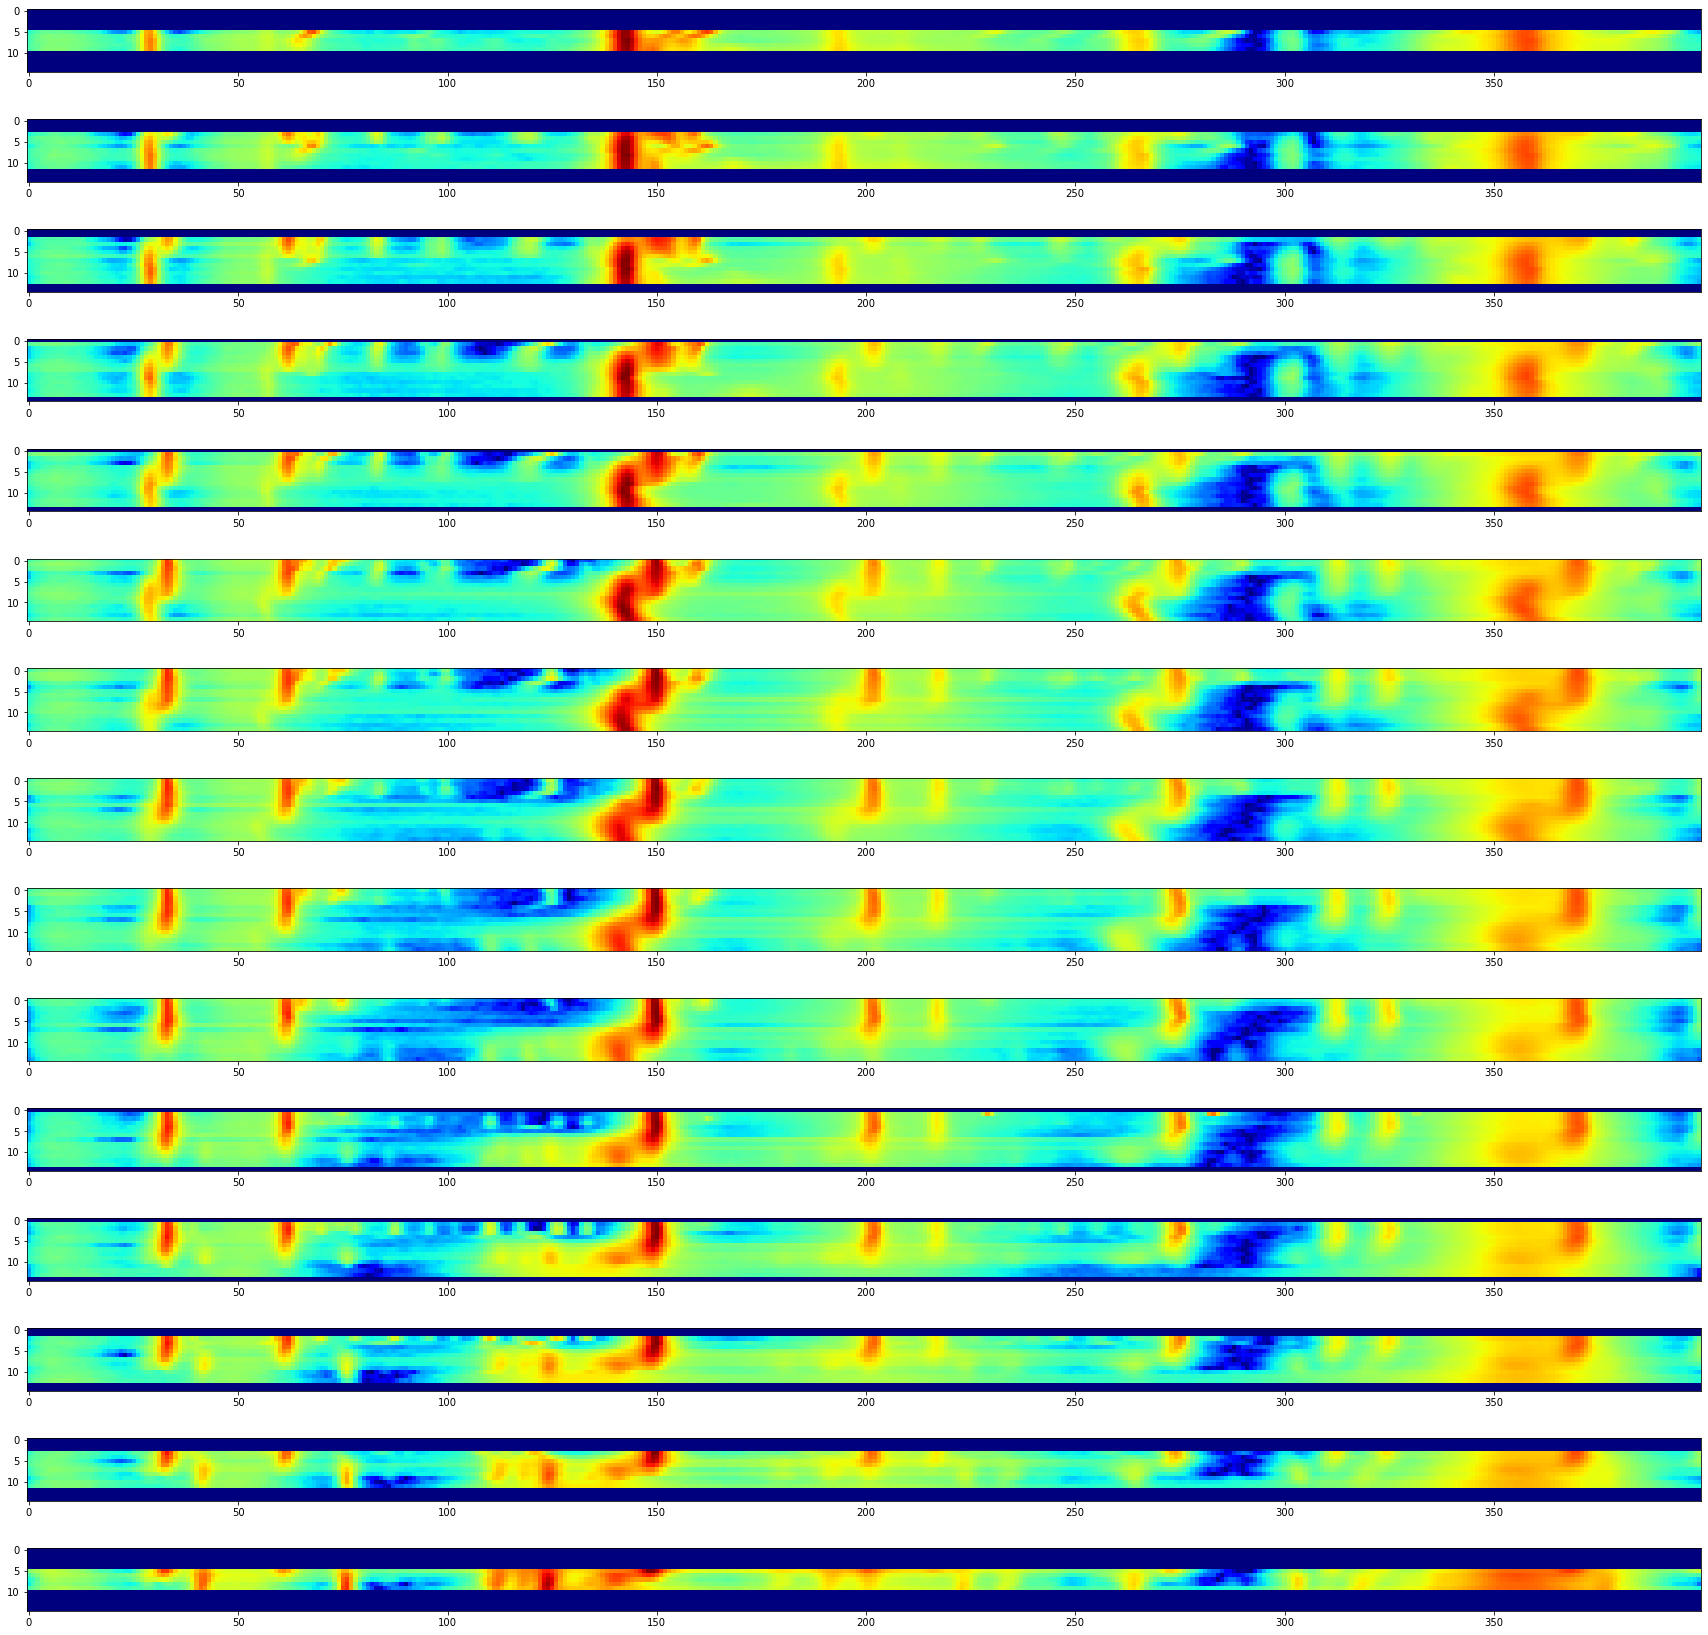

In [382]:
plt.rcParams["figure.figsize"]=(30, 30)

a, b = 15, 1
m3d_agglom = m3d.reshape(15, 15, -1, 2).sum(axis = 3)

for i in range(15):
    plt.subplot(a, b, i + 1)
    plt.imshow(np.log(1 + m3d_agglom[i, :]), cmap = 'jet')

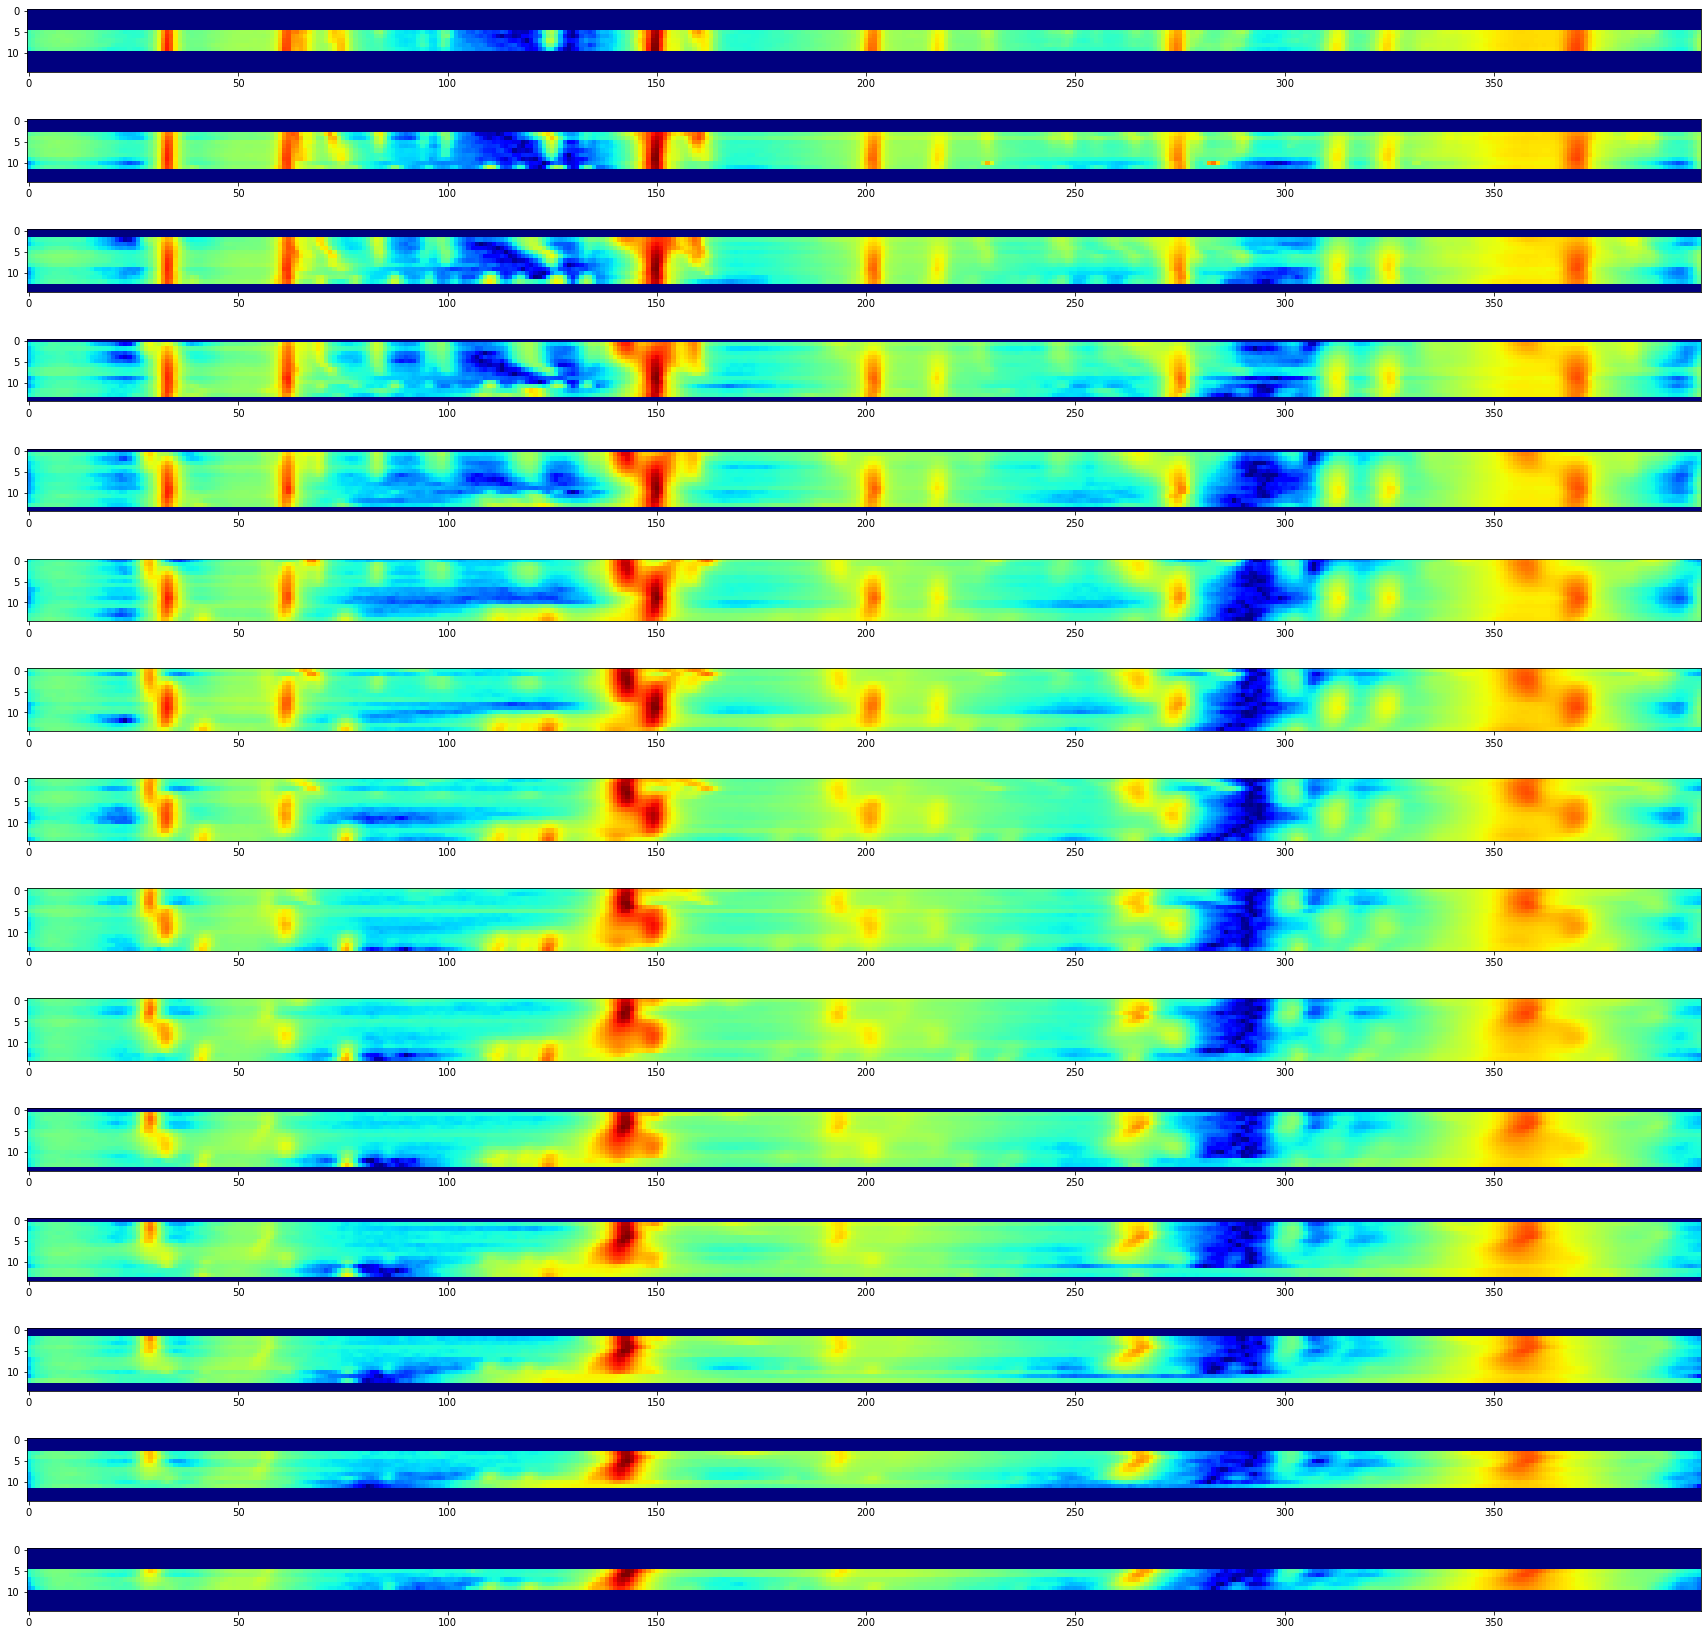

In [380]:
for i in range(15):
    plt.subplot(a, b, i + 1)
    plt.imshow(np.log(1 + m3d_agglom[:, i]), cmap = 'jet', interpolation = 'none')

In [397]:
from PIL import Image
import matplotlib
import matplotlib.cm as cm
import scipy.cluster.vq as scv

In [514]:
arr=plt.imread('/Users/ollie/Downloads/Outlook-xrjjtowh (1).jpg') / 255

alpha = np.ones(arr.shape[:2] + (1,))

arr = np.dstack((arr, alpha))

In [517]:
def colormap2arr(arr,cmap):    
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    gradient=cmap(np.linspace(0.0,1.0,1000))

    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    # Scale the values so they are from 0 to 1.
    values=code.astype('float')/gradient.shape[0]

    # Reshape values back to (240,240)
    values=values.reshape(arr.shape[0],arr.shape[1])
    values=values[::-1]
    return values


values=colormap2arr(arr,cm.nipy_spectral)    
# Proof that it works:

In [518]:
values.shape

(681, 678)

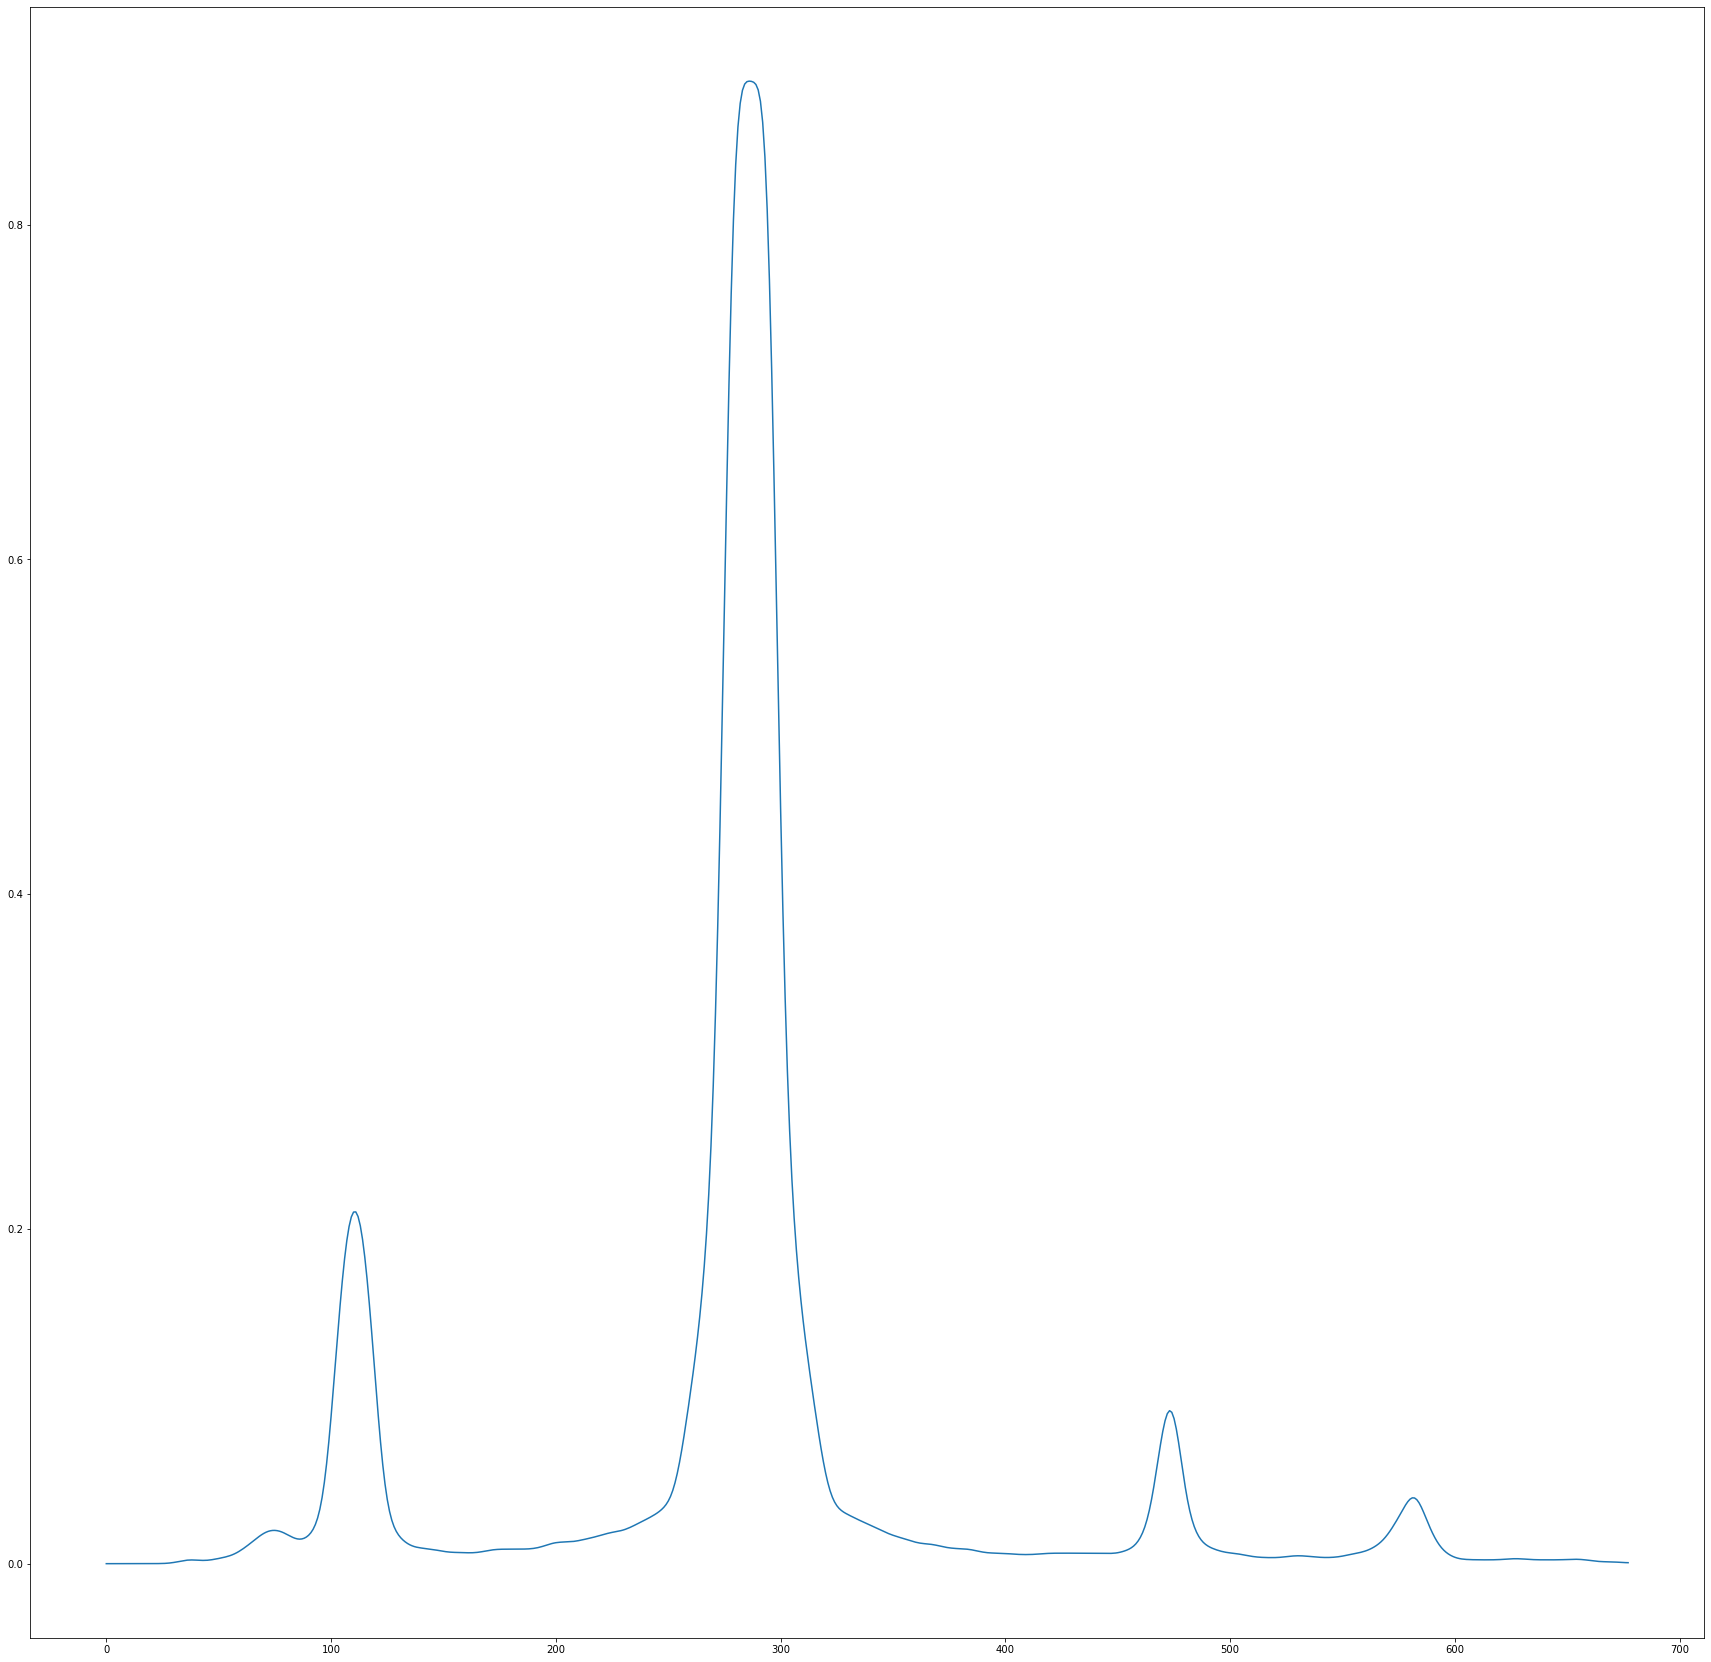

In [550]:
plt.plot(gf(values, 3.5)[0])

In [854]:
patterns.min()

0.0

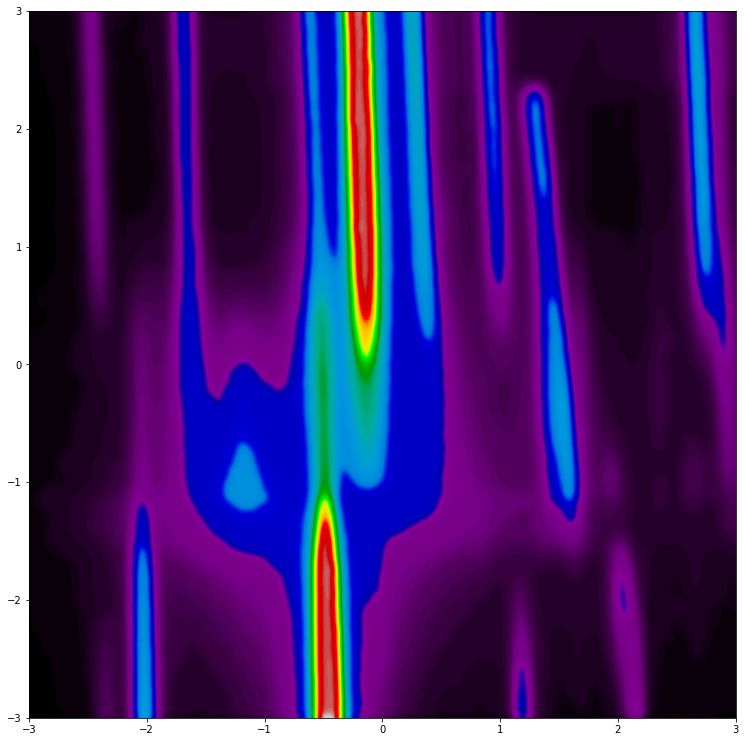

In [855]:
patterns = gf(values, 3.5)
plt.imshow(np.log(1 + patterns),interpolation='bilinear', cmap=cm.nipy_spectral,
           origin='lower', extent=[-3,3,-3,3])

In [823]:
%matplotlib inline

12


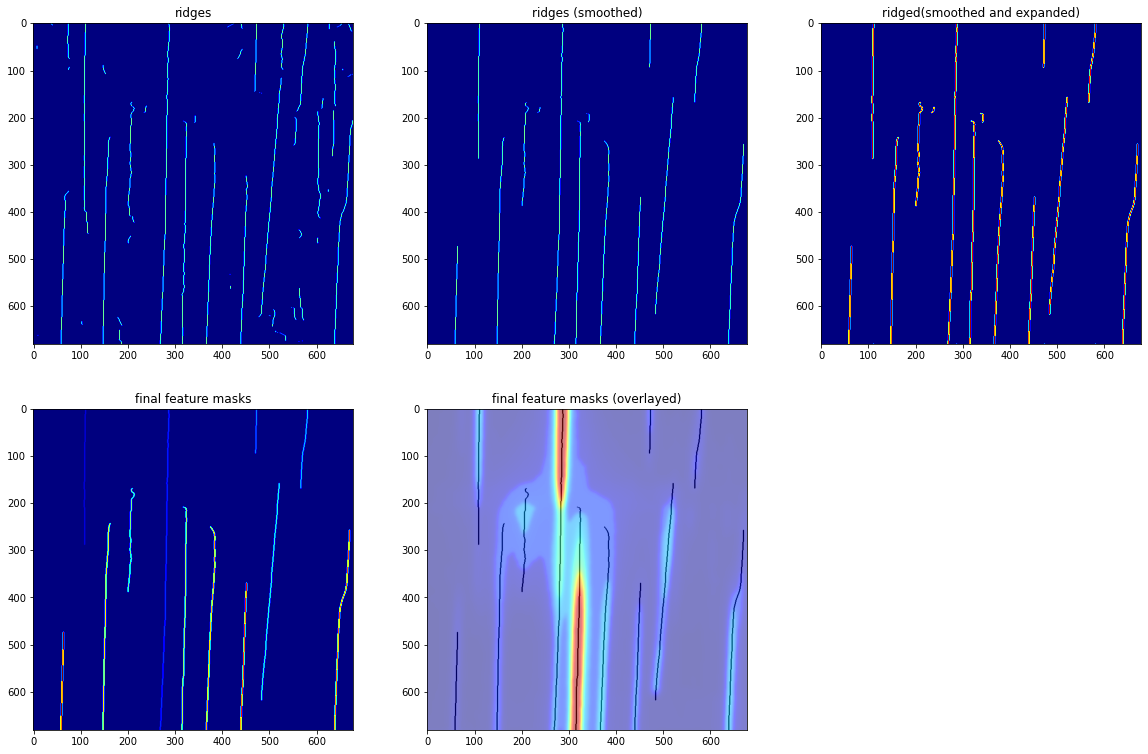

In [853]:
labeled, feature_masks, activations, activations_n0, activations_n1 =\
    get_ridge_features(reconstructed, smooth = 1.7, threshold_percentile = 60, thicken = True,
                   size_thresh = 30, bgsub=False, a = 2, b = 3);

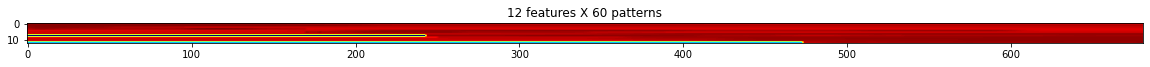

In [834]:
plt.title("{} features X 60 patterns".format(len(feature_masks)))
plt.imshow(np.log(1 - activations_n1.min() + activations_n1), cmap = 'jet')


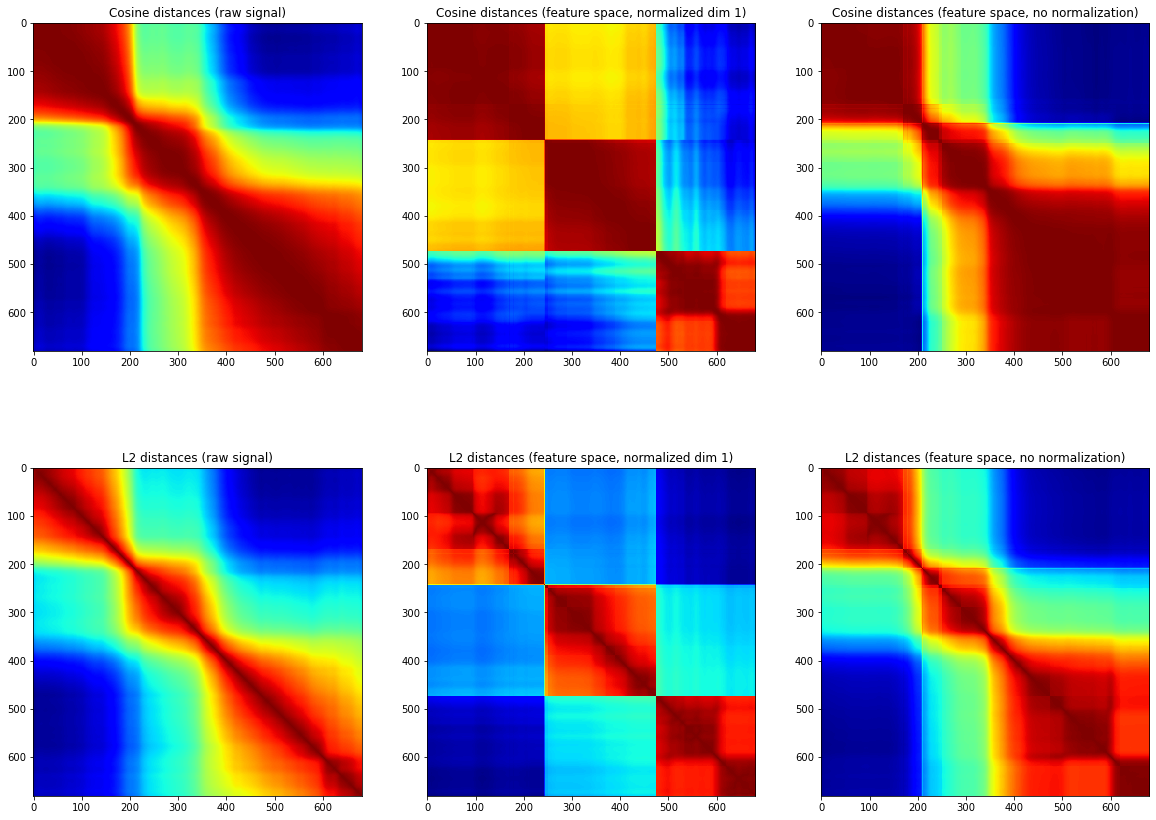

In [835]:
a, b = 2, 3
plt.rcParams["figure.figsize"]=(20, 15)
    
similarity_plot_row(csim_pairs, 'Cosine', patterns, activations, activations_n1)
similarity_plot_row(lambda arr: -l2_pairs(arr), 'L2', patterns, activations, activations_n1, 3)


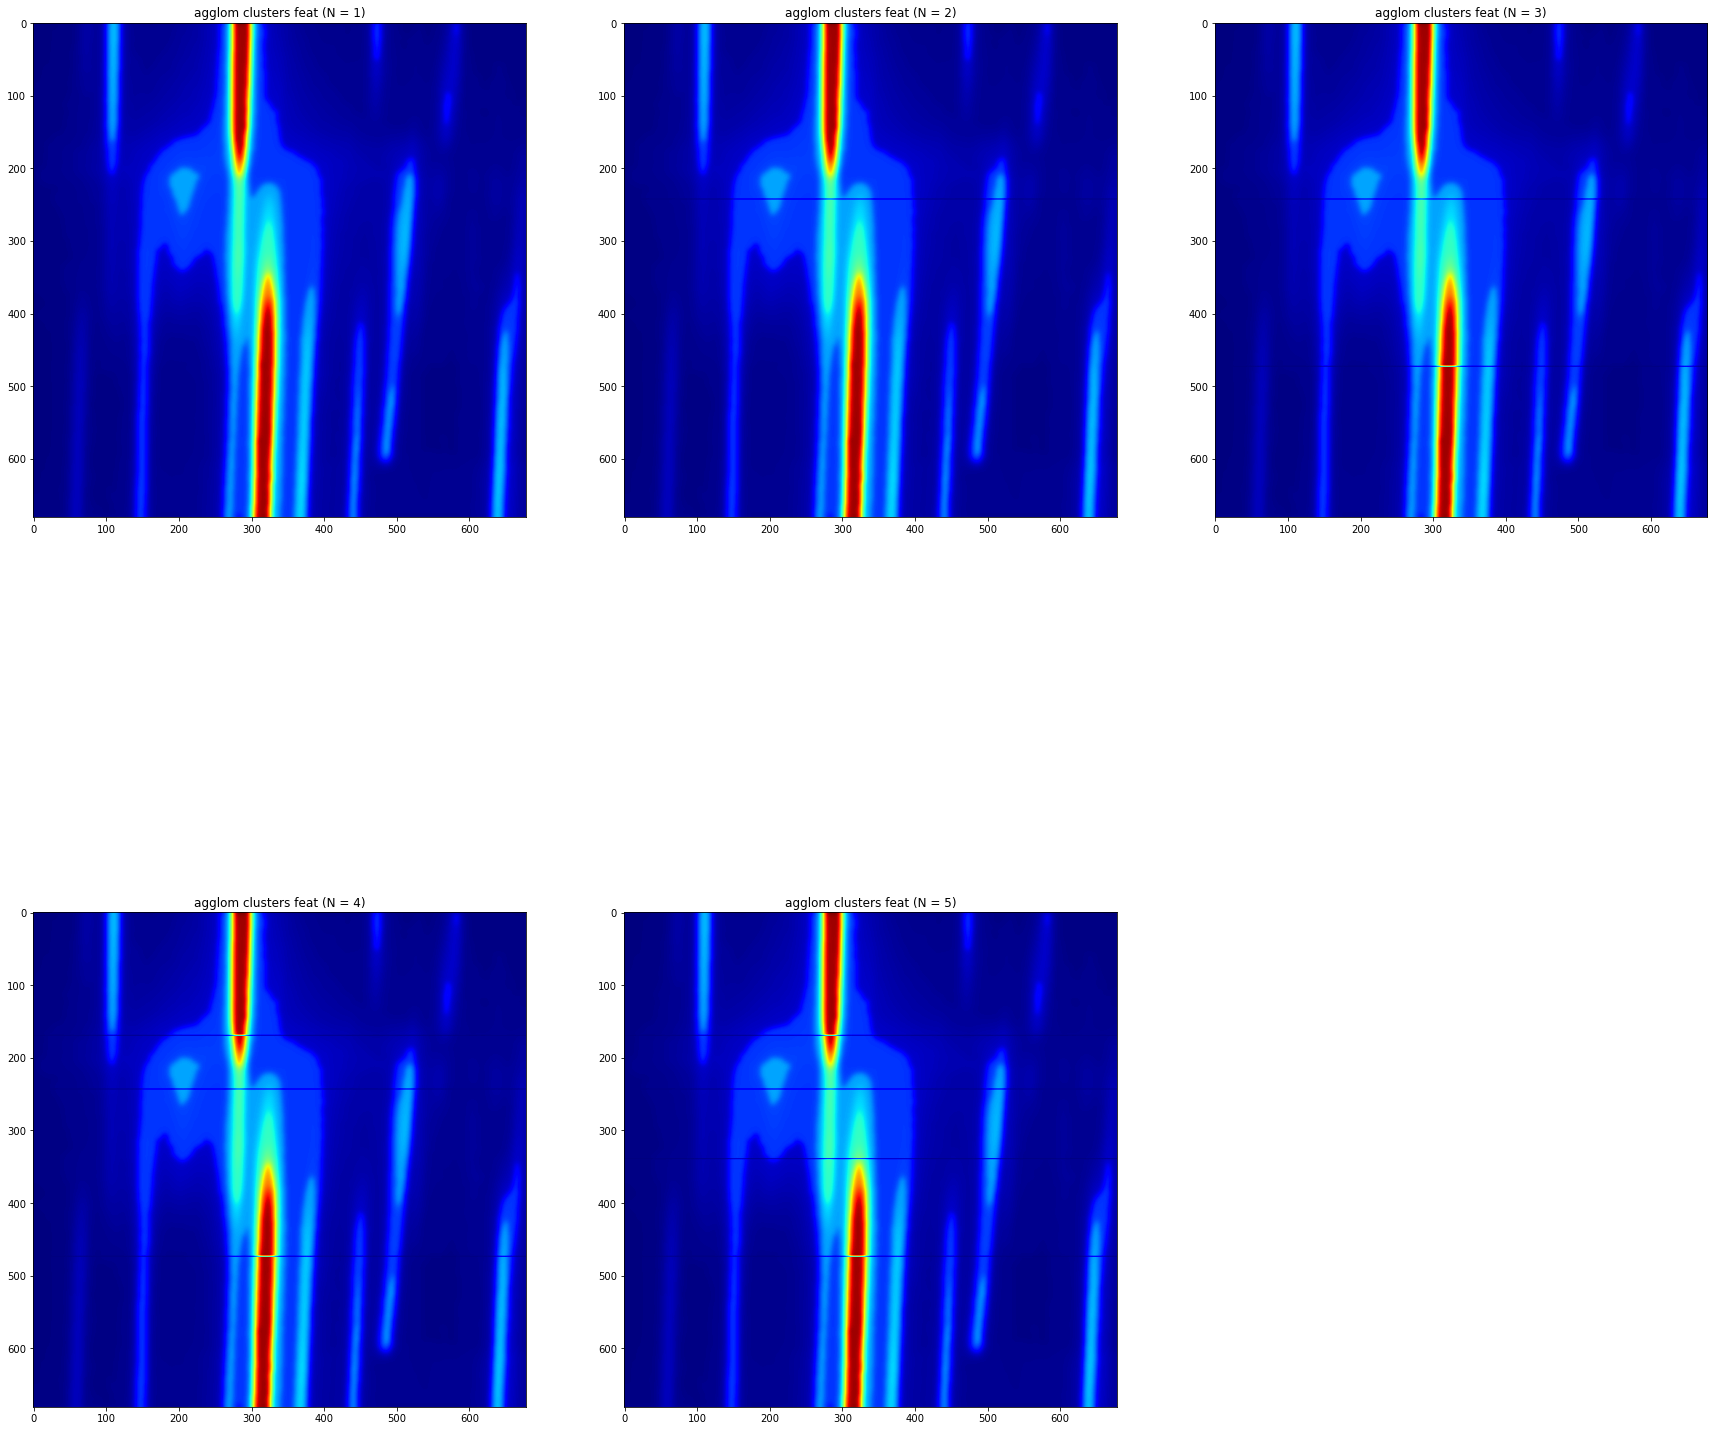

In [849]:
plt.rcParams["figure.figsize"]=(30, 30)

a, b = 2, 3

for n in range(1, 6):
    plt.subplot(a, b, n)
    cluster_draw_boundaries(activations_n1, n)

In [248]:
(pca.components_[0][:, None, None] * feature_masks).sum(axis = 0).min()

-0.4508193079206692

In [272]:
def get_component(component):
    img = (component[:, None, None] * feature_masks).sum(axis = 0)   
    return img
    #plt.imshow(img, cmap = 'jet')

In [275]:
imgs = np.vstack([get_component(c) for c in pca.components_])

vmin, vmax = imgs.min(), imgs.max()

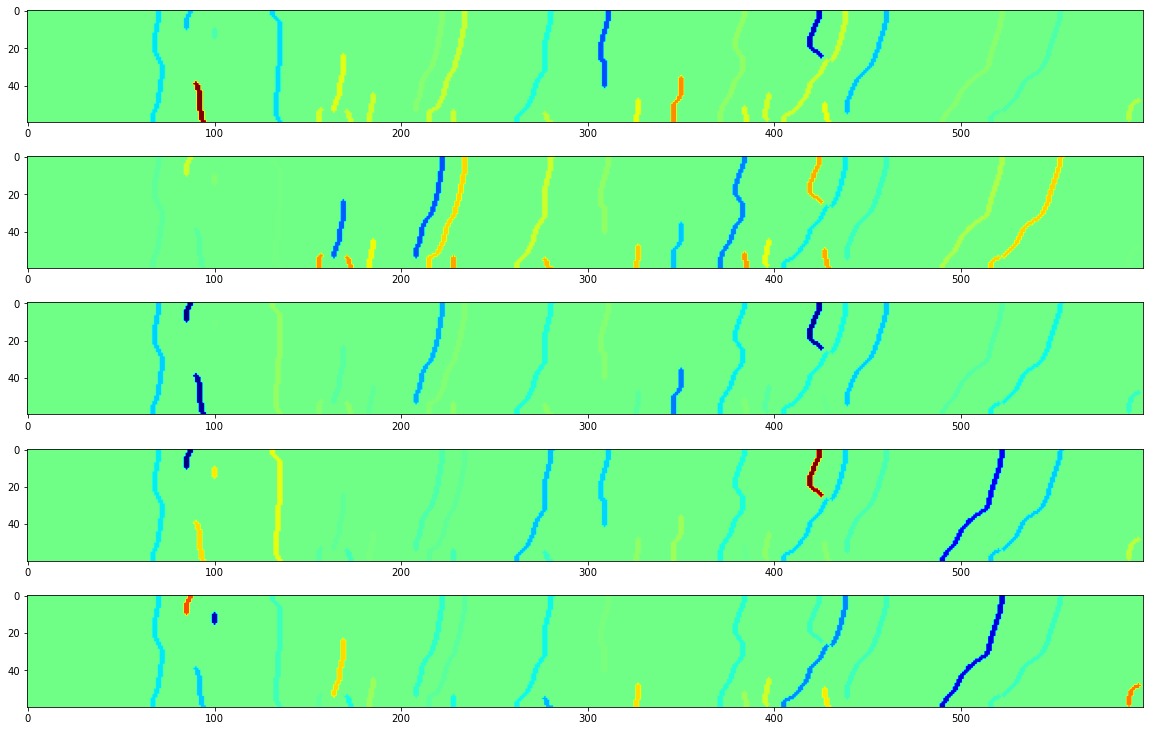

In [282]:
a, b = 5, 1
for i in range(a):
    plt.subplot(a, b, i + 1)
    plt.imshow(get_component(pca.components_[i]), vmin = vmin, vmax = vmax, cmap = 'jet')
    #plot_component(pca.components_[i])

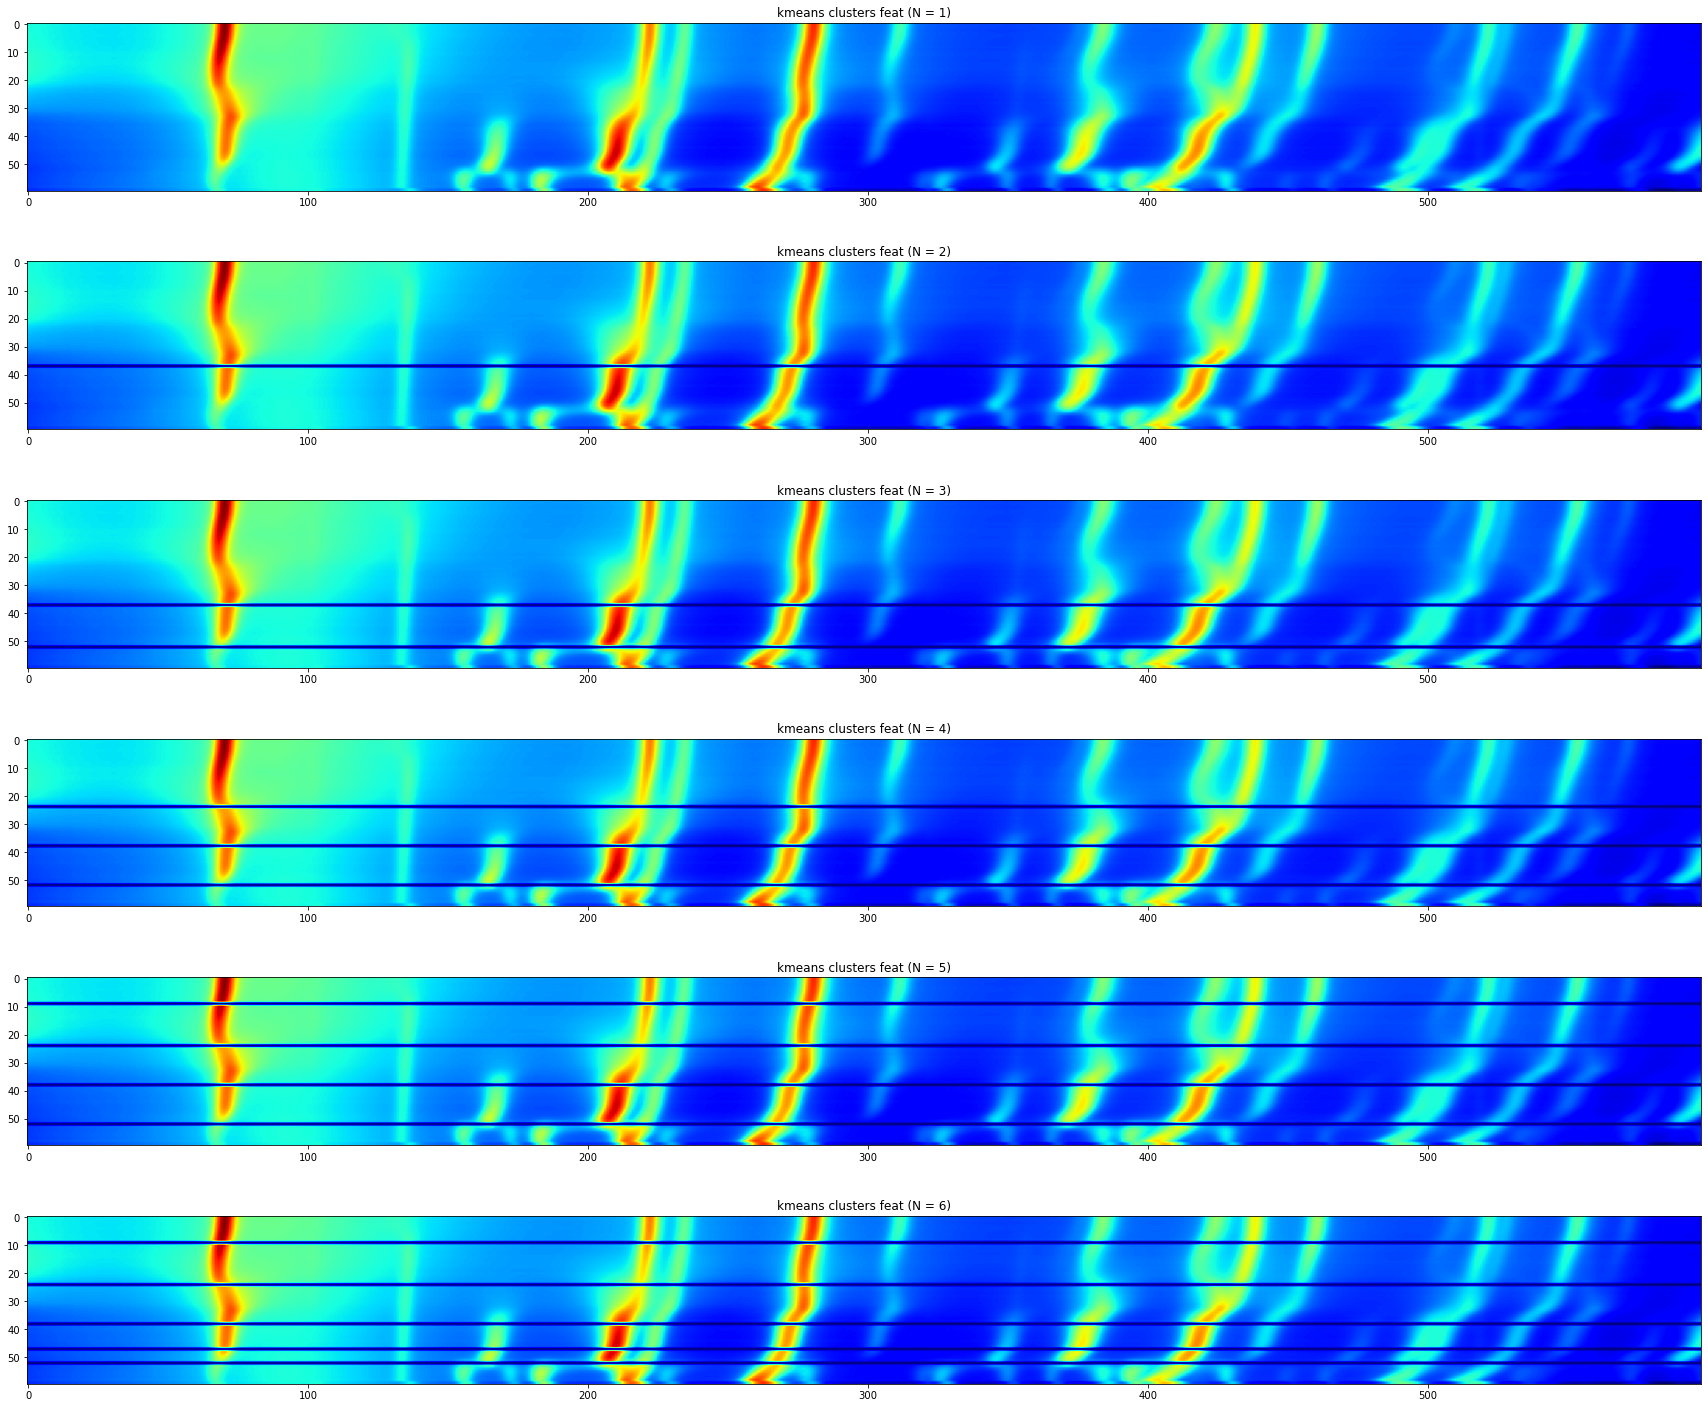

In [81]:
plt.rcParams["figure.figsize"]=(30, 30)

a, b = 7, 1

for n in range(1, 7):
    plt.subplot(a, b, n)
    cluster_draw_boundaries(activations_n1, n, 'kmeans')

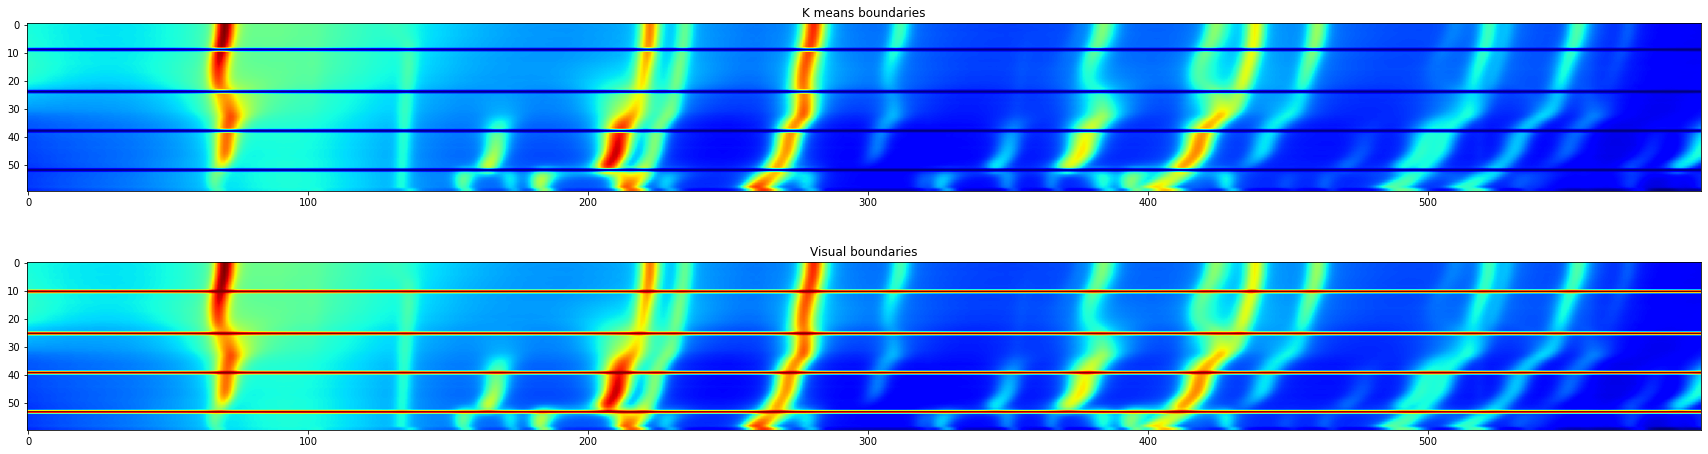

In [173]:
plt.rcParams["figure.figsize"]=(30, 30)
a, b = 7, 1
n = 5

plt.subplot(a, b, 1)
cluster_draw_boundaries(activations_n1, n, 'kmeans')
plt.title('K means boundaries')

plt.subplot(a, b, 2)
p3 = patterns.copy()
p3[visual_boundaries, :] = p3.max()
plt.title('Visual boundaries')
plt.imshow(np.log(1 + p3), cmap = 'jet')

Text(0.5, 1.0, 'featurized')

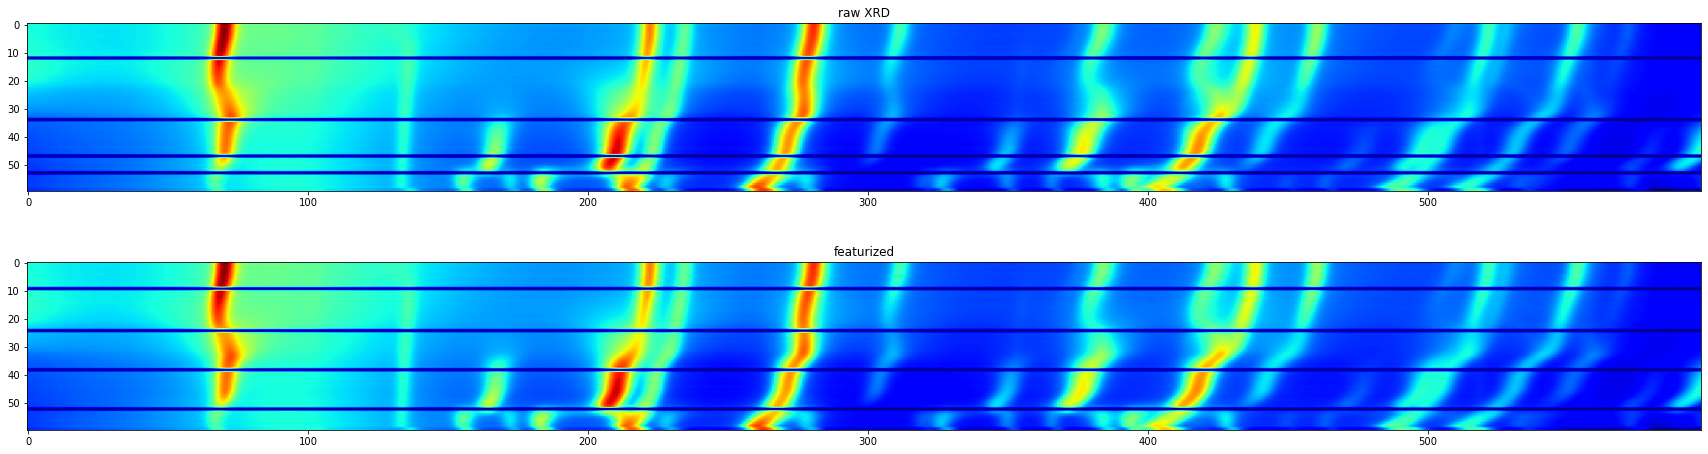

In [159]:
plt.rcParams["figure.figsize"]=(30, 30)

a, b = 7, 1
n = 5

plt.subplot(a, b, 1)
cluster_draw_boundaries(patterns.T, n, 'kmeans')
plt.title('raw XRD')
plt.subplot(a, b, 2)
cluster_draw_boundaries(activations_n1, n, 'kmeans')
plt.title('featurized')

# activations_log = (feature_masks * np.log(1 + patterns)).sum(axis = 2)
# activations_log_n1 = norm(activations_log, 1)

# plt.subplot(a, b, 3)
# cluster_draw_boundaries(activations_log_n1, 4, 'kmeans')
# plt.title('featurized')
    
# for n in range(1, 7):
#     plt.subplot(a, b, n)
#     cluster_draw_boundaries(patterns.T, n, 'kmeans')

In [2116]:
activations.shape

(27, 60)

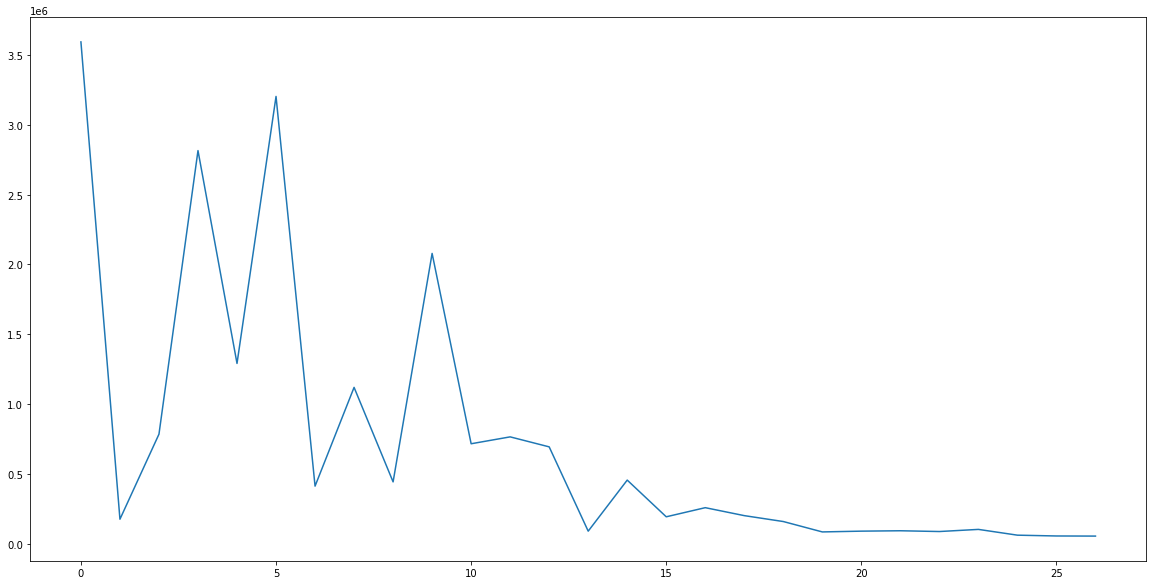

In [2098]:
plt.plot(activations.sum(axis = 1))

In [56]:
from sklearn.cluster import AgglomerativeClustering
X = activations_n1.T
def aclust(n):
    clustering = AgglomerativeClustering(n_clusters=n).fit(X)
    #clustering = AgglomerativeClustering(distance_threshold=0, n_clusters = None).fit(X)
    return clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [690]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def get_linkage(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    return linkage_matrix


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix

In [51]:
clustering.children_

array([[  2,   3],
       [ 26,  27],
       [  4,   5],
       [ 19,  20],
       [ 45,  46],
       [  1,  60],
       [  7,   8],
       [ 42,  43],
       [ 17,  18],
       [ 12,  13],
       [ 39,  40],
       [ 28,  29],
       [ 11,  69],
       [  6,  66],
       [ 16,  68],
       [ 62,  65],
       [ 30,  31],
       [ 21,  22],
       [ 33,  34],
       [ 14,  72],
       [ 44,  67],
       [ 57,  58],
       [ 48,  49],
       [ 41,  80],
       [ 63,  74],
       [ 23,  24],
       [ 50,  51],
       [ 71,  76],
       [ 47,  64],
       [  9,  73],
       [ 35,  78],
       [ 15,  84],
       [ 56,  81],
       [ 61,  87],
       [ 32,  90],
       [ 77,  85],
       [ 75,  89],
       [ 10,  79],
       [ 37,  38],
       [ 83,  88],
       [ 55,  92],
       [  0,  96],
       [ 25,  93],
       [ 82,  86],
       [ 36,  98],
       [ 70,  99],
       [ 52,  53],
       [ 91,  95],
       [ 54, 100],
       [ 59, 108],
       [ 94, 104],
       [ 97, 107],
       [103,

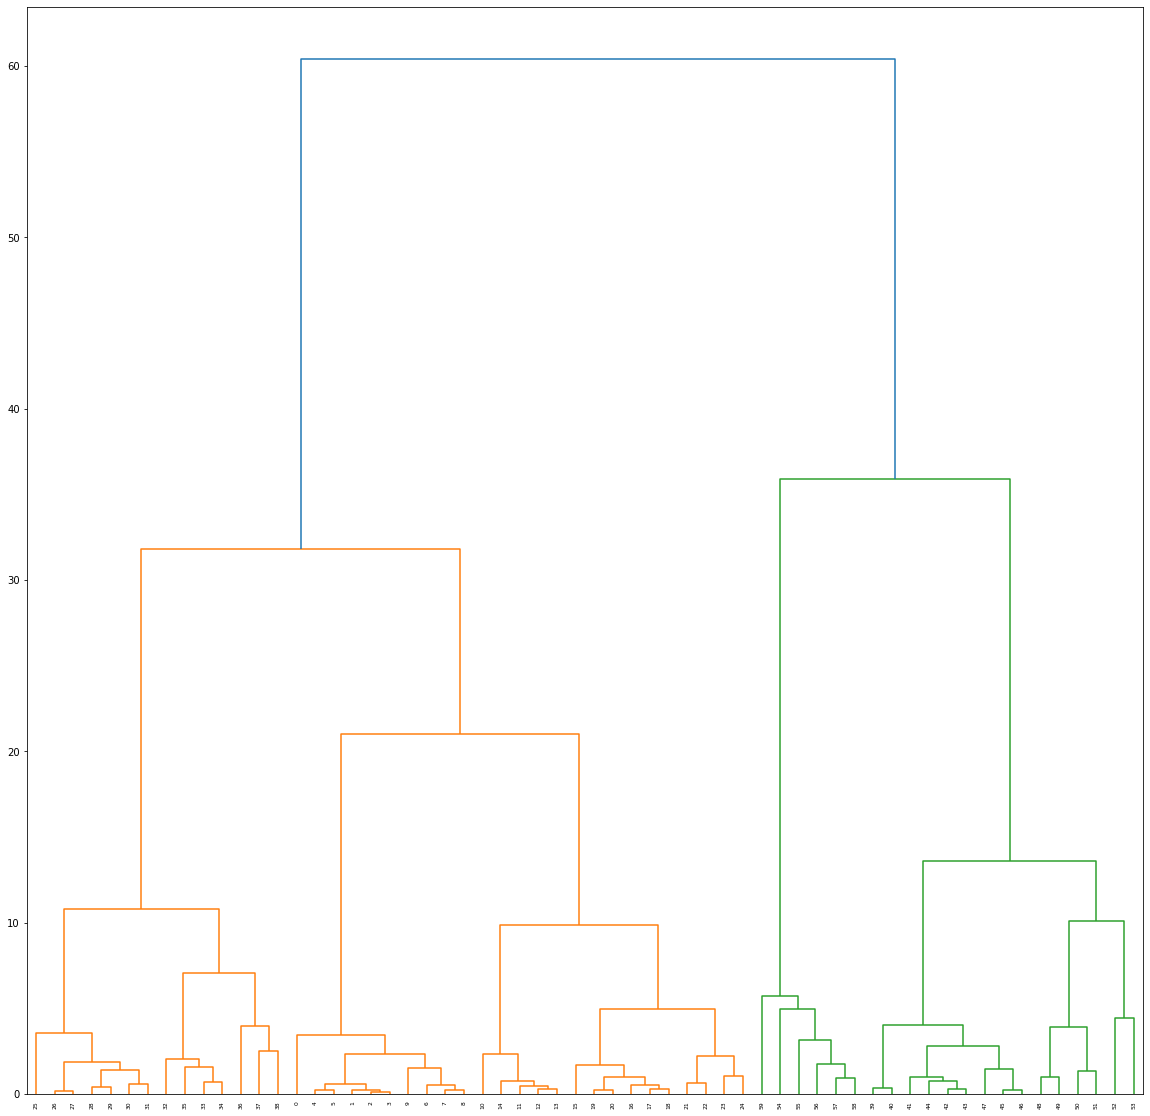

In [45]:
lmat = plot_dendrogram(clustering)

In [50]:
lmat.shape

(59, 4)

In [33]:
xdu.q_grid.shape

(800,)

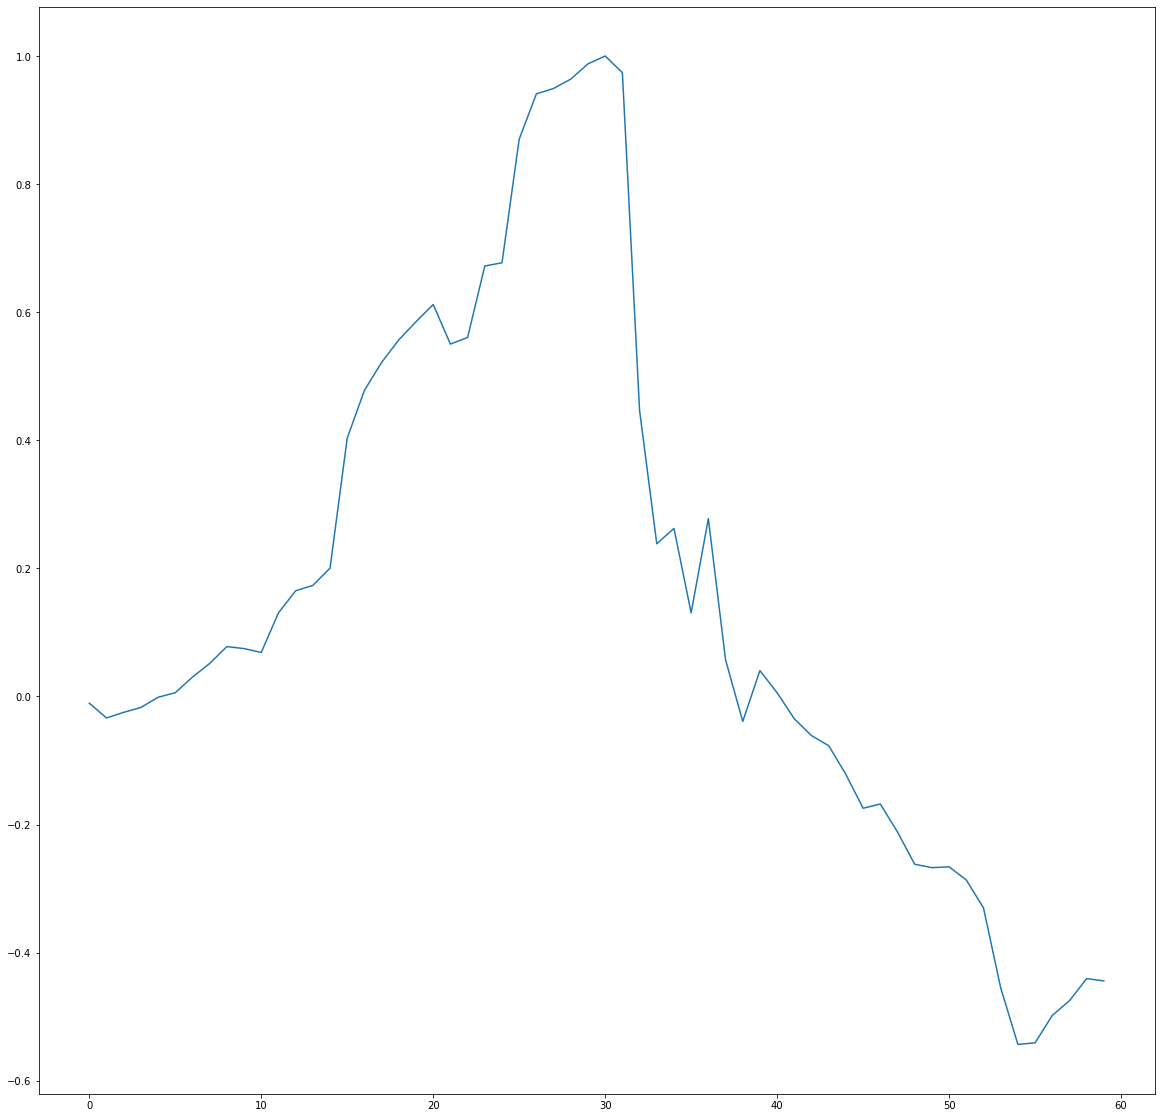

In [2018]:
plt.plot(feature_csims1[30])

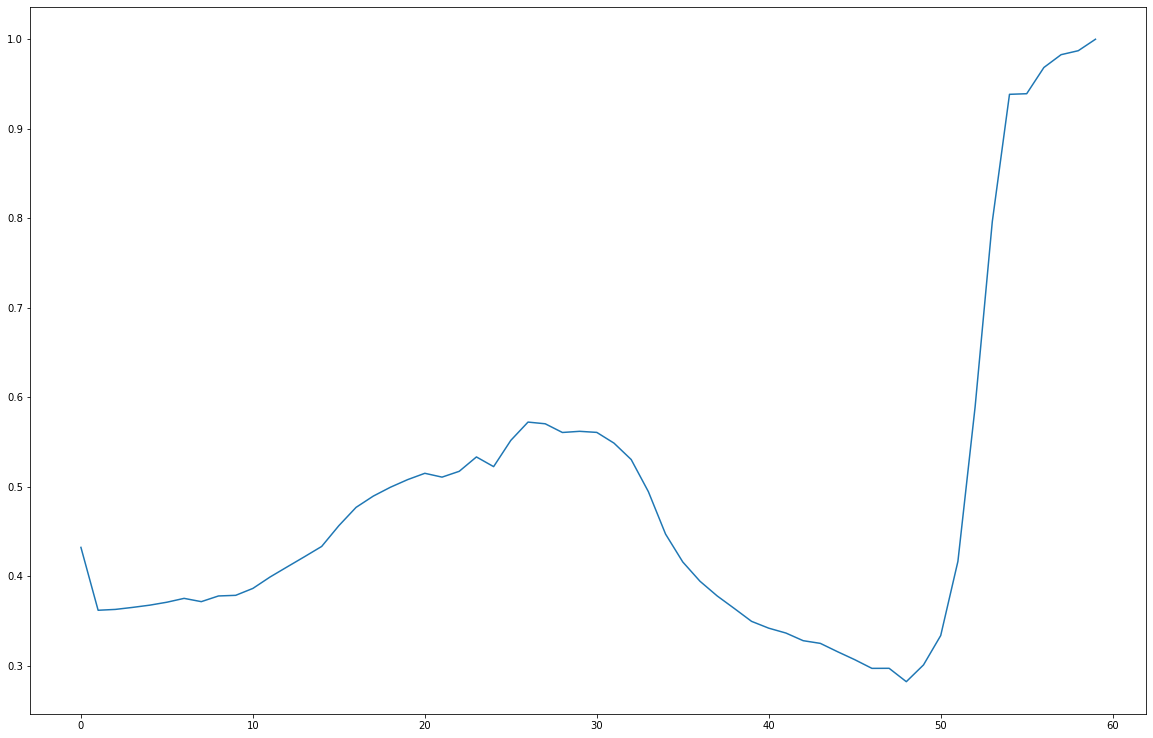

In [1974]:
plt.plot(feature_csims[-1])

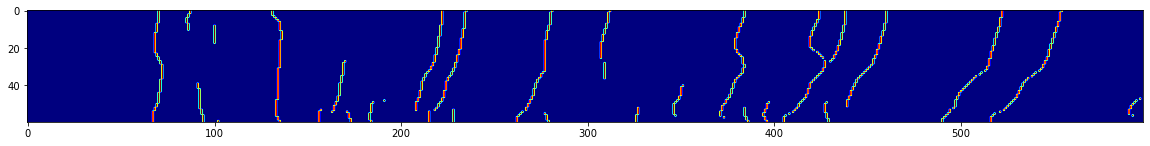

In [1353]:
plt.imshow(get_ridges(gf(
    bgsub, smooth
    )), cmap = 'jet')

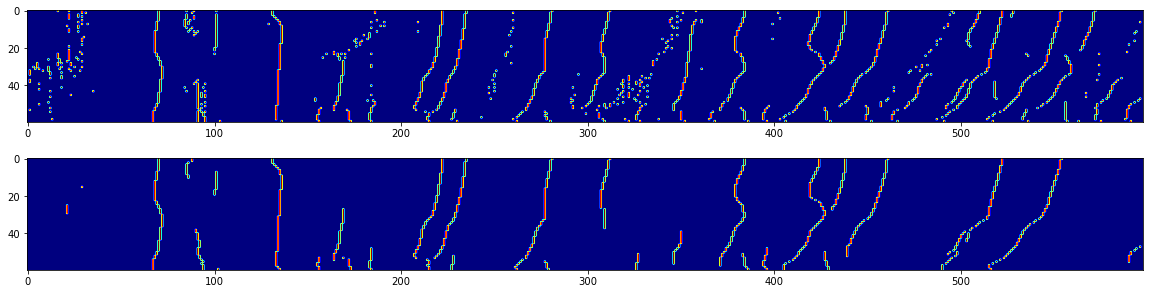

In [1355]:
plt.rcParams["figure.figsize"]=(20, 5)



bgsub = (smoothed - bg)
#bgsub[bgsub < 0] = 0

plt.subplot(2, 1, 1)
plt.imshow(get_ridges(patterns), cmap = 'jet')
plt.subplot(2, 1, 2)
plt.imshow(get_ridges(smoothed), cmap = 'jet')

In [424]:
#lines = cv2.HoughLines(edges,1,np.pi/45,70)
lines_img = np.zeros_like(img)

lines_arrs = [np.zeros_like(img) for i in range(len(lines_merged))]

def line_points(rho, theta):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    return x1, y1, x2, y2

for i, row in enumerate(lines_merged[:, None]):
    for rho,theta in row:
        x1, y1, x2, y2 = line_points(rho, theta)

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
        cv2.line(lines_img,(x1,y1),(x2,y2),(0,0,255),2)
        cv2.line(lines_arrs[i],(x1,y1),(x2,y2),(0,0,255),2)

In [1267]:
def get_line_coords(rho, theta, arr):
    """
    return x, y coord arrays
    """
    N, M = arr.shape
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = round(a * rho)
    y0 = round(b * rho)
    extend_x = N - x0
    extend_y = M - y0
    x = np.arange(N)
    y = -a * np.arange(-x0, extend_x) + y0
    return x, y



edges = get_ridges(orig)

1540.0

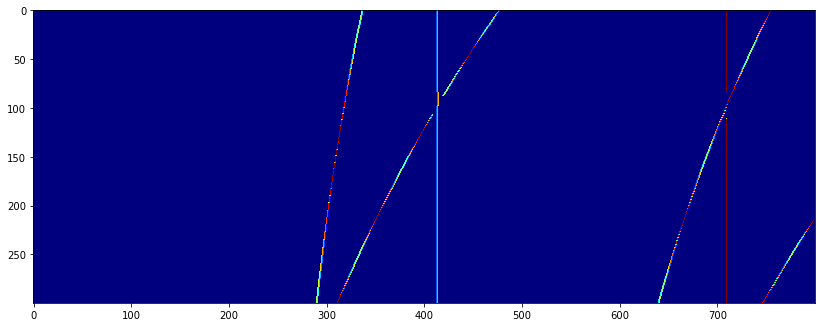

In [1114]:

plt.imshow(edges, cmap = 'jet')
edges.sum()

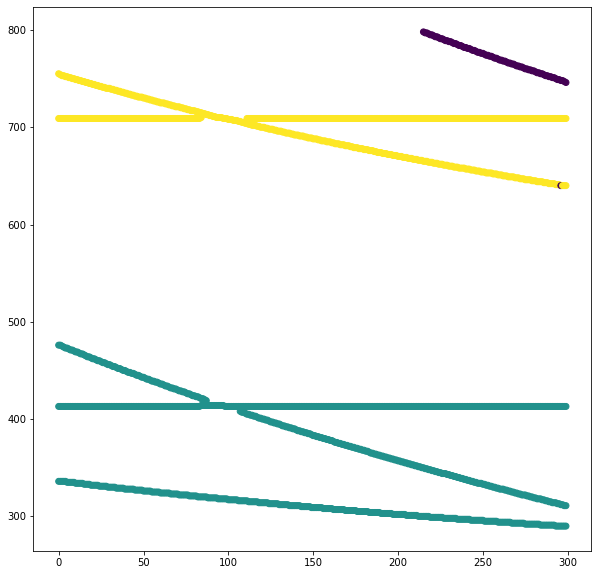

In [1098]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.1)#, cluster_method='dbscan', eps = None)
X = np.vstack(np.nonzero(tmp)).T

clust.fit(X)
plt.scatter(*(X.T), c = clust.labels_)

In [1006]:
%matplotlib inline

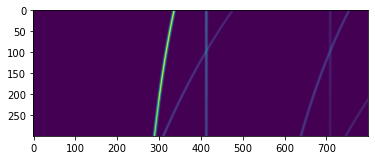

In [1007]:
plt.imshow(orig)

In [321]:
xpeak, ypeak = argrelextrema(orig, np.greater, axis = 1)

In [326]:
x, y = get_line_coords(lines_merged[-1][0], lines_merged[-1][1], orig)

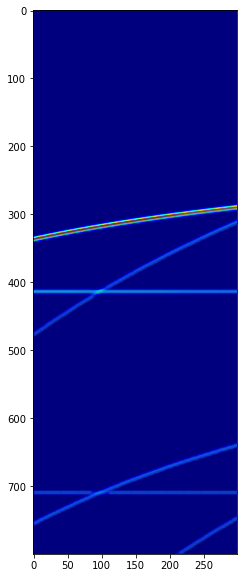

In [320]:
plt.imshow(orig.T, cmap = 'jet')
plt.scatter(*argrelextrema(orig, np.greater, axis = 1), alpha = .1, s = 10)

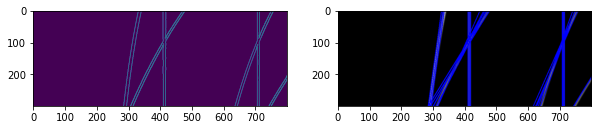

In [270]:
#plt.imshow(np.array(gray))
plt.subplot(1, 2, 1)
plt.imshow(np.array(edges))
plt.subplot(1, 2, 2)
plt.imshow(np.array(img))
#plt.imshow(lines_img)

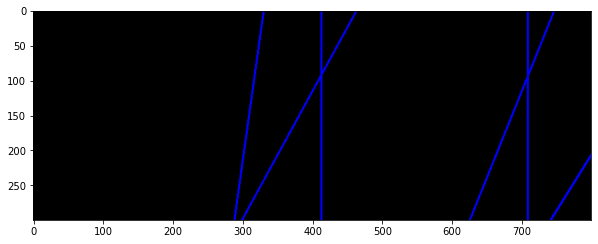

In [271]:
plt.imshow(np.array(lines_img))


In [767]:
from scipy.signal import convolve2d

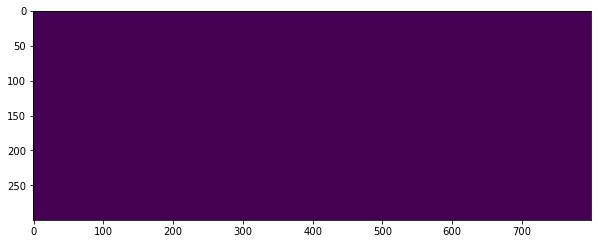

In [112]:
plt.imshow(lines_img.sum(axis = 2))

In [1196]:
def row_dp(row, i, refimage):
    return np.dot(refimage[i], row)

In [783]:
c2d = convolve2d(lines_img.sum(axis = 2), Ni_scan[0][:, None])

In [798]:
query = orig[150]
match_curve = np.array([np.dot(r, query) for r in lines_img.sum(axis = 2)])

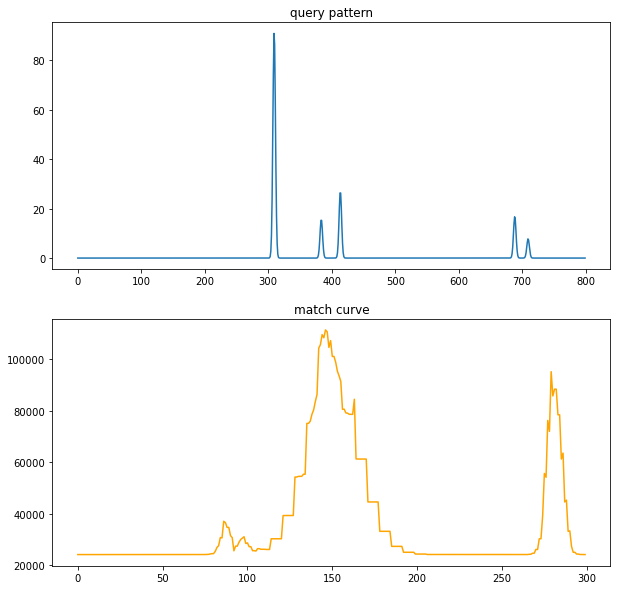

In [863]:
imatch = np.argmax(match_curve)
match = orig[imatch]
plt.subplot(2, 1, 1)
plt.title('query pattern')
plt.plot(query)

plt.subplot(2, 1, 2)
plt.title('match curve')
plt.plot(match_curve, c = 'orange')
# plt.plot(match)

In [818]:
def row_dp(row, i, refimage):
    return np.dot(refimage[i], row)
def feats_imatch(imatch):
    return np.array([row_dp(orig[imatch], imatch, lines_arrs[i].sum(axis = 2)) for i in range(len(lines_merged))])

line_feats = np.array([feats_imatch(i) for i in range(len(orig))])

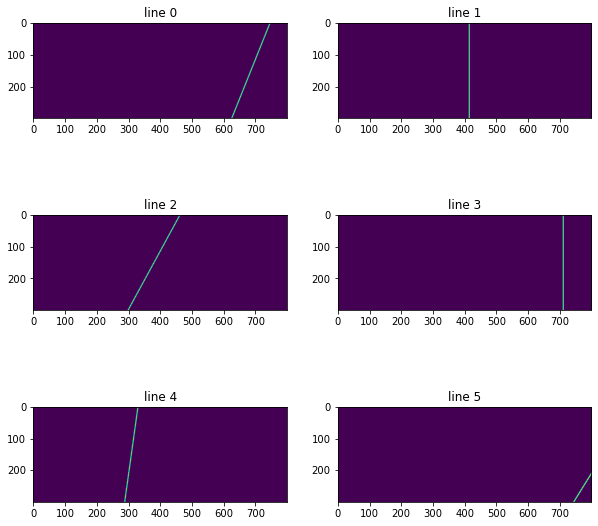

In [425]:
for i in range(len(lines_merged)):
    plt.subplot(3, 2, i + 1)
    plt.title('line {}'.format(i))
    plt.imshow(lines_arrs[i].sum(axis = 2))

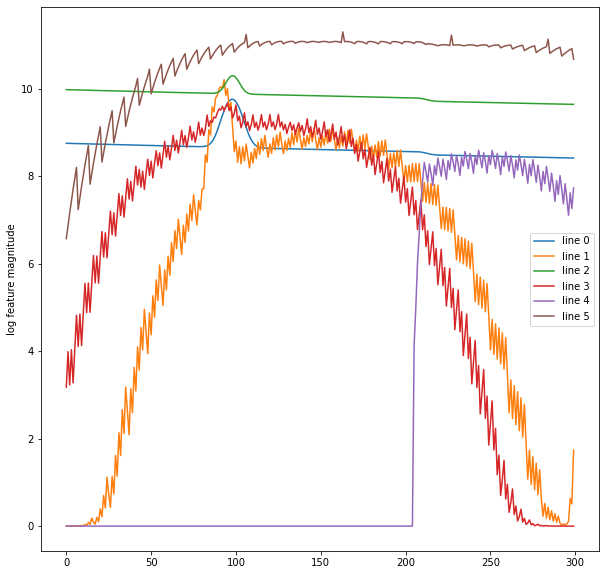

In [837]:
[plt.plot(np.log(1 + row), label = 'line {}'.format(i)) for (i, row) in enumerate(line_feats.T)]
plt.ylabel('log feature magnitude')
plt.legend()

In [765]:
cv2.filter2D(lines_img.sum(axis = 2), -1,  Ni_scan[10]).shape

(300, 800)

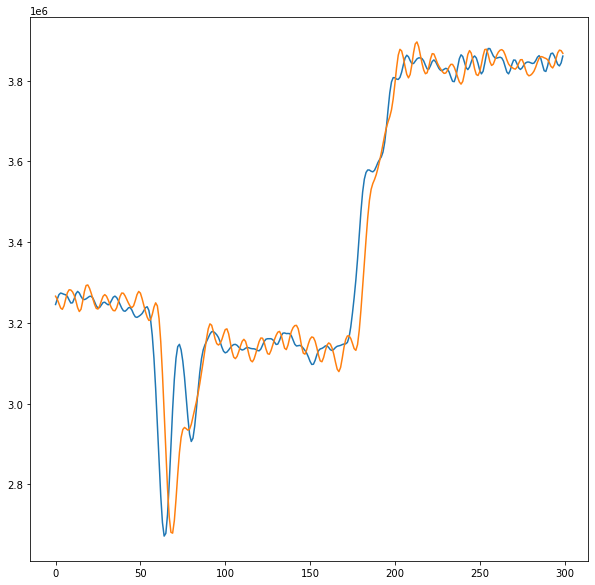

In [764]:
plt.plot(cv2.filter2D(lines_img.sum(axis = 2), -1,  Ni_scan[10]).sum(axis = 1))
plt.plot(cv2.filter2D(lines_img.sum(axis = 2), -1,  Ni_scan[20]).sum(axis = 1))

In [15]:
from importlib import reload
reload(xdu)
reload(grid_data)

<module 'xrdc.xrdutils' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/xrdutils.py'>

In [ ]:
# circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=200, param2=10, minRadius=500, maxRadius=10000)
# # Draw detected circles
# if circles is not None:
#     circles = np.uint16(np.around(circles))
#     for i in circles[0, :]:
#         # Draw outer circle
#         cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
#         # Draw inner circle
#         cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

# alg = cv2.GeneralizedHoughGuil()
# # Simple create template with 1 channel black images with size 5x5
# template = np.zeros((5,5))
# alg.setTemplate(template)

# import cv2
# alg = cv2.createGeneralizedHoughGuil()
# alg.setMinDist(40)
# alg.setLevels(40)

In [13]:
qq, ii = xdu.mk_pattern(i, q, .01, with_grid=True)

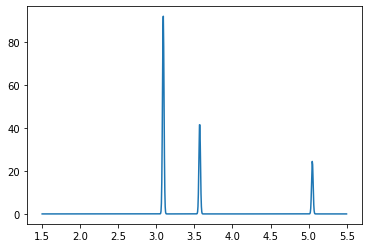

In [14]:
plt.plot(qq, ii)

## Cubic to tetragonal transition:

In [23]:
sigma = .01
q_cubic, i_cubic = distort_Ni(1)
cubic_patterns = np.vstack([xdu.mk_pattern(i_cubic, q_cubic, sigma, with_grid = False)
                           for _ in range(200)])

_, cubic_to_tetra_continuous = Ni_cubic_to_tetra(200, 1, 1.2, sigma = sigma)

In [24]:
from importlib import reload
reload(simulation)

<module 'xrdc.simulation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/simulation.py'>

In [25]:
q_tetra, i_tetra = distort_Ni(1.2)
cubic_to_tetra_twophase = simulation.transition(1, 1, (q, i), (q_tetra, i_tetra), 200, sigma = sigma,
                                                scale_type = 'scale')[::-1]

In [26]:
X = np.vstack((cubic_to_tetra_twophase, cubic_patterns, cubic_to_tetra_continuous))
#X = np.log(1 + np.vstack((cubic_to_tetra_twophase, cubic_patterns, cubic_to_tetra_continuous)))

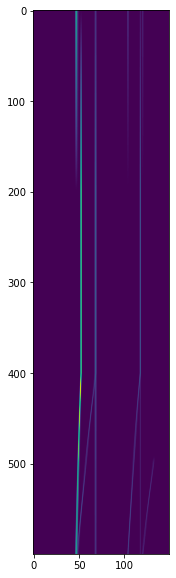

In [585]:
plt.imshow(Ni_X)

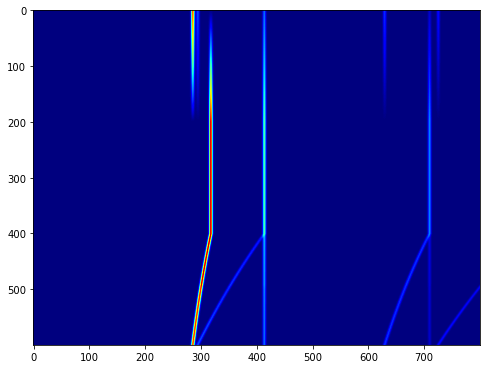

In [43]:
plt.imshow(X, cmap = 'jet')

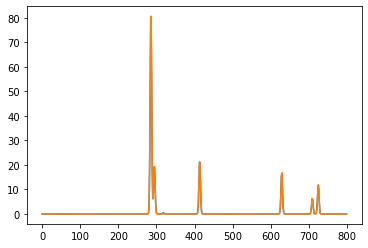

In [28]:
plt.plot(X[0])
plt.plot(X[-1])

In [307]:
Ni_XX, Ni_YY = simulation.sample_transition(X, n_classes = 30, per_class = 200, scale_min = .8, scale_max = 1.2,
                                            scale_type = 'scale')

scale type: scale
q jitter: None
peak height variation True


In [79]:
reload(simulation)

<module 'xrdc.simulation' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/simulation.py'>

In [436]:
Ni_X, Ni_Y = xdu.standardize_input(X, np.arange(len(X)) // 200)

In [229]:
Ni_XX.mean()

1.0

In [230]:
prefix="Ni_cubic_to_tetra"
xdu.write_train_test("data/{}/".format(prefix), Ni_XX, Ni_YY,
                 Ni_XX,\
                 Ni_YY // 10)

In [231]:
runout_Ni_transition =\
    train.run("siamese-constrastive_1d", "XRD", "data/{}/train/".format(prefix), "data/{}/test".format(prefix), name = prefix,
              n_classes = 30, epochs = 200)

  0%|          | 0/37600 [00:00<?, ?it/s, epoch=0, train_loss=0, val_loss=-1]

4
./data/XRD


100%|██████████| 37600/37600 [07:50<00:00, 79.84it/s, epoch=199, train_loss=0.0353, val_loss=0.0353] 


Saving artifacts to ./tmp/siamese-constrastive_1d-XRD-Ni_cubic_to_tetra-*


Legend:

- blue: tetragonal to cubic (discontinuous)
- orange: cubic
- green: cubic to tetragonal (continuous)

siamese-constrastive_1d-XRD-Ni_cubic_to_tetra-testing-set-embedding.png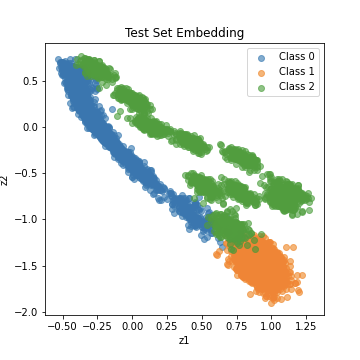

In [271]:
X.shape

(600, 800)

In [29]:
Ni_XX, Ni_YY = simulation.sample_transition(X, n_classes = 3, per_class = 400, scale_min = .8, scale_max = 1.2,
                                            scale_type = 'scale')

#Ni_XX, Ni_YY = xdu.standardize_input(np.log(1 + X), Ni_Y)

scale type: scale
q jitter: None
peak height variation True


In [30]:
Ni_transition_loader = xd.ndarr_to_dataloader(Ni_XX, Ni_YY)

In [241]:
reload(xd)

<module 'xrdc.datasets' from '/Users/ollie/anaconda3/lib/python3.7/site-packages/xrdc-1.0-py3.7.egg/xrdc/datasets.py'>

In [1023]:
plt.rcParams["figure.figsize"]=(10, 10)

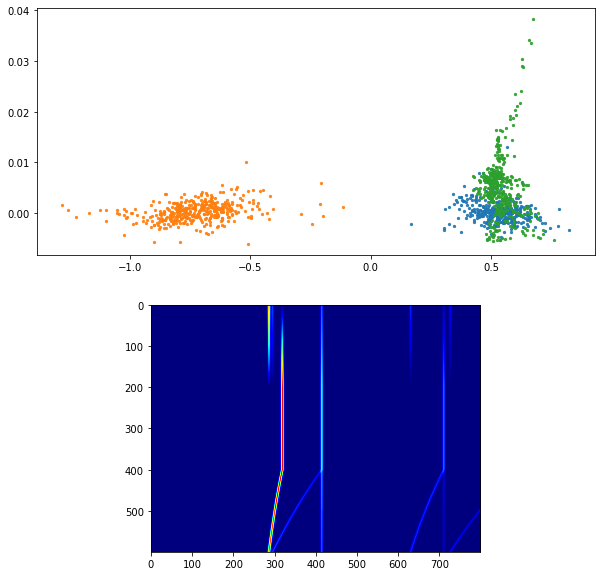

In [85]:
plt.subplot(2, 1, 1)

transition_X, transition_ytrue = utils.get_embedding(net, Ni_transition_loader)

#pca2, transition_Xpca = vis.do_pca(transition_X)
#transition_Xpca, ypred = xdu.gcluster(transition_X, N = 3)

transition_Xpca = pca.transform(transition_X)

#plt.scatter(*(transition_Xpca.T), c = ypred, s = 20, alpha = .3, cmap = 'jet')
for c in range(3):
    plt.scatter(*(((transition_Xpca)[(transition_ytrue == c).squeeze()]).T), s = 5, alpha = .9, cmap = 'jet')
#plt.scatter(*(transition_Xpca.T), c = transition_ytrue, s = 20, alpha = .5, cmap = 'jet')


#plt.scatter(*(Xpca.T), c = ytrue, s = 30, alpha = .5)
#plt.scatter(*(Xpca.T), s = 30, alpha = .5)

plt.subplot(2, 1, 2)
plt.imshow(X, cmap = 'jet')

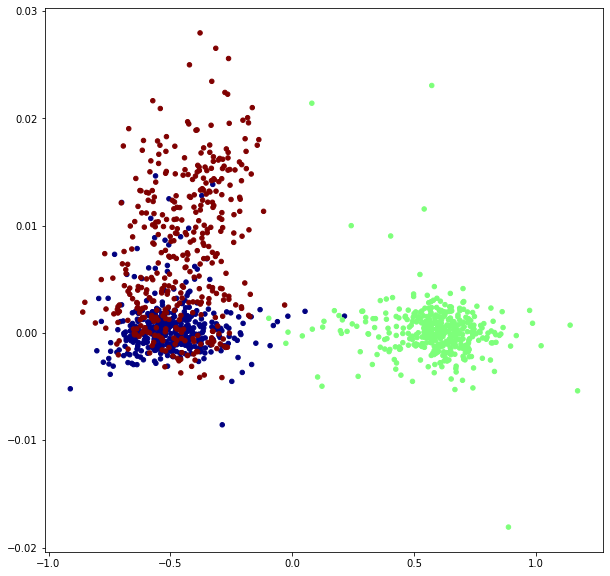

In [484]:
transition_X, transition_ytrue = utils.get_embedding(net, Ni_transition_loader)

#_, transition_Xpca = vis.do_pca(transition_X)

transition_Xpca = pca.transform(transition_X)
plt.scatter(*(transition_Xpca.T), c = transition_ytrue, s = 20, alpha = 1, cmap = 'jet')
#plt.scatter(*(Xpca.T), c = ytrue, s = 30, alpha = .5)
#plt.scatter(*(Xpca.T), s = 30, alpha = .5)